# What are n-grams?
N-grams are continuous sequences of words or symbols or tokens in a document. In technical terms, they can be defined as the neighbouring sequences of items in a document. They come into play when we deal with text data in NLP(Natural Language Processing) tasks.

# types of n-grams
1. Unigram where n = 1
2. Bigram where n = 2
3. Trigram  where n = 3
4. n-gram


# Step-by-step implementation of n-grams in Python
1. Explore the dataset
2. Feature extraction
3. Train-test split
4. Basic pre-processing
5. Code to generate N-grams
6. Creating unigrams
7. Creating bigrams
8. Creating trigrams

**SENTIMENT ANALYSIS FOR FINANCIAL NEWS FROM THE PERSPECTIVE OF A RETIAL INVESTOR**

**->3 categories:**


-positive

-negative

-neutral

DATASET:

https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news



In [22]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

plt.style.use(style='seaborn')
%matplotlib inline

In [23]:
df=pd.read_csv('all-data.csv',encoding = "ISO-8859-1")
df.head()

,Sentiment,News Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4846 non-null   object
 1   News Headline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [26]:
df.isna().sum()

Sentiment        0
News Headline    0
dtype: int64

In [27]:
df['Sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

**Feature extraction**

In [87]:
y=df['Sentiment'].values
y.shape
#y

(4846,)

In [38]:
x=df['News Headline'].values
x.shape


(4846,)

# Train-test split
In any machine learning, deep learning, or NLP(Natural Language Processing) task, splitting the data into train and test is indeed a highly crucial step. The train_test_split() method provided by sklearn is widely used for the same.

we have split the data this way:60% for train and the rest 40% for test. I had started with 20% for the test and kept on playing with the test_size parameter only to realize that the 60-40 ratio of split provides more useful and meaningful insights from the trigrams generated

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)

In [32]:
x_train.shape

(2907,)

In [33]:
y_train.shape

(2907,)

In [34]:
x_test.shape

(1939,)

In [35]:
y_test.shape

(1939,)

In [39]:
x_train

array(["Nordea Pankki Suomi Oyj 's ownership in Stonesoft Corporation has decreased below 1-20 .",
       "`` We will continue to make it easier for users to explore services on their handsets and will work towards bringing Internet to a wider range of devices including mid and low-end devices , '' said Kallasvuo .",
       "`` Lemminkainen Talo Oy 's Lahti office is a significant logistics and business premises constructor .",
       ..., "Raisio 's malting capacity was in full use in 2008 .",
       'An Android app will be coming soon .',
       'In the first quarter of 2010 , the mark-to-market result was a pretax profit of EUR 133 million versus a loss of EUR 32 million in the same period last year .'],
      dtype=object)

In [40]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})

df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

df_train.head()

,news,sentiment
0,Nordea Pankki Suomi Oyj 's ownership in Stones...,neutral
1,`` We will continue to make it easier for user...,neutral
2,`` Lemminkainen Talo Oy 's Lahti office is a s...,neutral
3,No other ev3 devices were involved in this act...,neutral
4,"Furthermore , Bunge will also sign a licensing...",positive


In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       2907 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


In [42]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

df_test.head()

,news,sentiment
0,"( ADP News ) - Feb 12 , 2009 - Finnish constru...",neutral
1,The company also said that the deployment of t...,neutral
2,"Kaido Kaare , general director for Atria Eesti...",neutral
3,Stora is due to release its fourth-quarter and...,neutral
4,Raw materials prices have surged in the past y...,positive


In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       1939 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 68.1+ KB


**Pre-processing**

In [107]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [123]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

#storing the puntuation free text in a new column called clean_msg
df_train['clean_msg']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['clean_msg']= df_test['news'].apply(lambda x:remove_punctuation(x))


In [124]:
df_train.head()
#df_train['news']
#punctuations are removed from news column in train dataset

,news,sentiment,clean_msg
0,Nordea Pankki Suomi Oyj s ownership in Stoneso...,neutral,Nordea Pankki Suomi Oyj s ownership in Stoneso...
1,We will continue to make it easier for users ...,neutral,We will continue to make it easier for users ...
2,Lemminkainen Talo Oy s Lahti office is a sign...,neutral,Lemminkainen Talo Oy s Lahti office is a sign...
3,No other ev3 devices were involved in this act...,neutral,No other ev3 devices were involved in this act...
4,Furthermore Bunge will also sign a licensing ...,positive,Furthermore Bunge will also sign a licensing ...


In [113]:
import nltk
from nltk.corpus import stopwords

In [114]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ku-
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [115]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
#print(stopwords.words('english'))

def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans
    


In [116]:
#sample!
generate_N_grams("The sun rises in the east",2)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

**Create unigrams**

In [117]:
from collections import defaultdict

In [118]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [129]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].clean_msg:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].clean_msg:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].clean_msg:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['Furthermore', '', 'Bunge', 'also', 'sign', 'licensing', 'agreement', 'Sunnuntai', 'Carlshamn', 'Mejeri', 'brands', '']
Sentence after removing stopwords: ['Meanwhile', '', 'Nokia', 'said', 'able', 'deliver', 'complete', 'range', 'services', 'deployment', 'operations', 'consulting', 'integration', 'managed', 'services', 'result', 'buyout', '']
Sentence after removing stopwords: ['The', 'fair', 'value', 'property', 'portfolio', 'doubled', 'result', 'Kapiteeli', 'acquisition', 'totalled', 'EUR', '26862', '12597', 'million', '']
Sentence after removing stopwords: ['The', 'company', 'aims', 'maintain', 'trend', 'profitability', 'current', 'year', '']
Sentence after removing stopwords: ['The', 'new', 'factory', 'working', 'model', 'reorganisations', 'would', 'decrease', 'Nokian', 'Tyres', '', 'costs', 'factory', 'EUR', '30', 'million', '', 'USD', '387', '', '']
Sentence after removing stopwords: ['The', 'bank', 'forecasts', 'Finland', 'GDP', 'grow', '2', 

Sentence after removing stopwords: ['ASPO', 'Plc', 'STOCK', 'EXCHANGE', 'ANNOUNCEMENT', 'May', '4', '', '2006', '1000', 'An', 'increase', 'share', 'capital', 'Aspo', 'Plc', 'totaling', 'EUR', '112560', 'registered', 'today', '']
Sentence after removing stopwords: ['', 'In', 'terms', 'profitability', 'earnings', '2007', 'best', 'year', 'history', '', '', 'Chief', 'Executive', 'VeliMatti', 'Mattila', 'said', '']
Sentence after removing stopwords: ['Diluted', 'earnings', 'per', 'share', '', 'EPS', '', 'rose', 'EUR', '105', 'EUR', '064', '']
Sentence after removing stopwords: ['15', 'December', '2010', '', 'FinnishGerman', 'telecoms', 'equipment', 'maker', 'Nokia', 'Siemens', 'Networks', 'said', 'today', 'contract', 'upgrade', 'radio', 'network', 'homebased', 'telecommunications', 'company', 'Elisa', 'Oyj', 'HEL', '', 'ELI1V', '']
Sentence after removing stopwords: ['The', 'company', '', 'makes', 'garden', 'tools', '', 'scissors', 'consumer', 'goods', '', 'said', 'earnings', 'boosted', '69

Sentence after removing stopwords: ['Cargotec', 'Corporation', '', 'Press', 'Release', '', 'April', '28', '', '2008', '200', 'pm', 'Finnish', 'time', 'Cargotec', 'MacGREGOR', 'business', 'area', 'providing', 'marine', 'cargo', 'handling', 'offshore', 'load', 'handling', 'solutions', 'received', 'significant', 'hatch', 'cover', 'orders', 'bulk', 'carriers', '']
Sentence after removing stopwords: ['The', 'company', 'make', 'marketing', 'sales', 'investments', 'initiated', '2009', 'even', 'efficient', '2010', '']
Sentence after removing stopwords: ['One', 'colleagues', 'summed', 'E7', 'quite', 'aptly', 'remarked', '', '', 'Fantastic', 'hardware', '']
Sentence after removing stopwords: ['', 'They', 'would', 'invest', 'physical', 'infrastructure', '', 'would', 'also', 'provide', 'knowhow', 'managing', 'developing', 'science', 'technology', 'parks', '', '', 'said', 'Sunrise', 'Valley', 'director', 'Andrius', 'Bagdonas', '']
Sentence after removing stopwords: ['Elcoteq', 'stock', 'orders', 's

Sentence after removing stopwords: ['Ruukki', 'signed', 'contract', 'Norwegian', 'company', 'Veidekke', 'Entreprenor', 'AS', '']
Sentence after removing stopwords: ['Cash', 'flow', 'operations', 'rose', 'EUR', '527', 'mn', 'EUR', '156', 'mn', '2007', '']
Sentence after removing stopwords: ['Uponor', 'improved', 'performance', 'spite', 'decrease', 'residential', 'construction', 'US', '']
Sentence after removing stopwords: ['The', 'executive', 'group', 'participate', 'adjustments', 'fixedterm', '5', '', 'salary', 'cut', '']
Sentence after removing stopwords: ['1', 'February', '2011', '', 'Finnish', 'textile', 'clothing', 'company', 'Marimekko', 'Oyj', 'HEL', '', 'MMO1V', 'said', 'today', 'preliminary', 'operating', 'profit', 'grew', 'EUR8', '2', '2010', 'EUR6', '3', '2009', '']
Sentence after removing stopwords: ['The', 'loyal', 'customers', 'found', 'Bank', 'land', '', 'index', '80', '']
Sentence after removing stopwords: ['ABB', 'Deutsche', 'Bank', 'upgraded', 'recommendation', 'SwissS

Sentence after removing stopwords: ['Industry', 'Investment', 'interested', 'Glaston', 'solar', 'energy', 'projects', '']
Sentence after removing stopwords: ['Finnish', 'software', 'developer', 'Done', 'Solutions', 'Oyj', 'said', 'net', 'profit', 'increased', '35', 'mln', 'euro', '', '', '46', 'mln', '', '2006', '23', 'mln', 'euro', '', '', '30', 'mln', '', '2005', '']
Sentence after removing stopwords: ['Finnish', 'financial', 'solutions', 'developer', 'Basware', 'Corporation', '', 'OMX', 'Helsinki', 'BAS1V', '', 'said', 'Tuesday', '', '23', 'September', '', 'deliver', 'complete', 'Invoice', 'Automation', 'solution', 'large', 'US', 'engineering', '', 'construction', 'technical', 'services', 'organization', '']
Sentence after removing stopwords: ['Other', 'carriers', 'handset', 'makers', 'spin', 'positive', 'event', 'raise', 'interest', 'higherend', 'phones', 'pricier', 'data', 'plans', '']
Sentence after removing stopwords: ['Iggesunds', 'Bruk', 'Sweden', 'one', 'advanced', '', 'fully

Sentence after removing stopwords: ['Operating', 'profit', 'ninemonth', 'period', 'increased', 'EUR13', '6', '', 'net', 'sales', 'increased', 'EUR394', '7', '', 'compared', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['The', 'company', 'process', 'building', 'new', 'fleet', 'placed', 'orders', '10', 'PMax', 'tankers', '65200', 'dwt', '']
Sentence after removing stopwords: ['Alma', 'Media', 'expects', 'net', 'sales', 'increase', 'forecast', 'previously', '']
Sentence after removing stopwords: ['Turnover', 'rose', 'EUR21m', 'EUR17m', '']
Sentence after removing stopwords: ['', 'I', 'extremely', 'delighted', 'project', 'continuation', 'cooperation', 'Viking', 'Line', '']
Sentence after removing stopwords: ['Validating', 'fgVoIP', 'client', 'Symbian', 'Signed', 'represents', 'significant', 'step', 'forward', 'accomplishing', 'goal', '']
Sentence after removing stopwords: ['', 'I', 'happy', 'outcome', '', '', 'Sneed', 'said', 'hearing', '']
Sentence after remov

Sentence after removing stopwords: ['Cargo', 'volume', 'increased', 'approximately', '5', '', '']
Sentence after removing stopwords: ['Markets', 'expecting', 'poor', 'performance', '', 'company', 'stock', '6', 'percent', '', 'x20ac', '2389', 'US', '3384', 'early', 'afternoon', 'trading', 'Helsinki', '']
Sentence after removing stopwords: ['The', 'parties', 'also', 'agreed', 'options', 'allow', 'UH', 'extensively', 'implement', 'later', 'also', 'functionalities', 'human', 'resources', 'management', '']
Sentence after removing stopwords: ['HELSINKI', '', 'AFX', '', '', 'Nokian', 'Tyres', 'reported', 'fourth', 'quarter', 'pretax', 'profit', '615', 'mln', 'eur', '', '486', 'mln', 'back', 'strong', 'sales', '']
Sentence after removing stopwords: ['The', 'refining', 'margin', 'year', '', '1339', '', 'bbl', '', 'compared', '', '1046', '', 'bbl', 'prior', 'year', '']
Sentence after removing stopwords: ['Lemcon', 'signed', 'investment', 'cooperation', 'agreement', 'Kaluga', 'regional', 'adminis

Sentence after removing stopwords: ['Due', 'rapid', 'expansion', '', 'market', 'share', 'Tallink', 'terms', 'passenger', 'carriage', 'Tallinna', 'Sadam', 'Port', 'Tallinn', 'totaled', '55', 'percent', 'November', '457', 'percent', 'November', '2005', '']
Sentence after removing stopwords: ['Both', 'operating', 'profit', 'net', 'sales', 'threemonth', 'period', 'increased', '', 'respectively', 'EUR16', '0', 'EUR139m', '', 'compared', 'corresponding', 'quarter', '2006', '']
Sentence after removing stopwords: ['The', 'buyer', 'aims', 'thus', 'reinforce', 'position', 'Denmark', '', 'Martela', 'Group', 'managing', 'director', 'Heikki', 'Martela', 'said', '']
Sentence after removing stopwords: ['He', 'also', 'mentions', 'improvement', 'service', 'follows', 'recent', 'expansion', 'Finnlines', 'service', 'Bilbao', 'via', 'Antwerp', 'Helsinki', 'Hull', 'via', 'Helsinki', 'St', 'Petersburg', '']
Sentence after removing stopwords: ['Commission', 'income', 'rose', '257', '', 'EUR', '161', 'mn', 'EU

Sentence after removing stopwords: ['NASDAQlisted', 'Yahoo', 'Inc', 'introduced', 'new', 'service', 'enables', 'Malaysians', 'take', 'favorite', 'Internet', 'content', 'services', 'mobile', 'phones', '']
Sentence after removing stopwords: ['Espoon', 'kaupunki', 'awarded', 'contracts', 'personal', 'care', 'products', '']
Sentence after removing stopwords: ['UPMKymmene', 'working', 'closely', 'shipping', 'agents', 'reduce', 'fuel', 'consumption', 'greenhouse', 'gas', 'emissions', '']
Sentence after removing stopwords: ['According', 'Karhinen', '', 'OPPohjola', 'exciting', 'enterprise', 'cooperation', 'bring', 'huge', 'opportunities', 'customers', 'company', '']
Sentence after removing stopwords: ['We', 'aim', 'ensure', 'Vacon', 'good', 'shape', 'capital', 'expenditure', 'starts', 'pick', '', '', 'comments', 'Vacon', 'Plc', 'President', 'CEO', 'Vesa', 'Laisi', '']
Sentence after removing stopwords: ['Ragutis', '', 'controlled', 'Finnish', 'brewery', 'Olvi', '', 'achieved', '57', 'percent'

Sentence after removing stopwords: ['', 'Neste', 'Oil', 'working', '20', 'research', 'communities', 'Europe', '', 'America', '', 'Africa', '', 'Asia', '', 'Australia', 'develop', 'introduce', 'new', 'raw', 'materials', '']
Sentence after removing stopwords: ['A', 'realignment', 'interests', 'sector', 'clearly', 'way', '']
Sentence after removing stopwords: ['fi', 'developing', 'cooperation', 'keyword', 'advertising', 'Microsoft', '']
Sentence after removing stopwords: ['Revenues', 'time', 'grew', '14', 'percent', '43', 'million', 'euros', '']
Sentence after removing stopwords: ['Sales', 'Finland', 'rose', '39', '', 'international', 'growth', '07', '', '']
Sentence after removing stopwords: ['The', 'new', 'policy', 'also', 'aimed', 'making', 'companies', 'profitable', 'competitive', '']
Sentence after removing stopwords: ['The', 'company', 'expects', 'net', 'sales', 'first', 'half', '2008', 'reach', 'previous', 'year', 'level', '']
Sentence after removing stopwords: ['Finnish', 'handlin

Sentence after removing stopwords: ['In', 'second', 'quarter', '2010', '', 'Raute', 'net', 'loss', 'narrowed', 'EUR', '123000', 'EUR', '15', 'million', 'period', '2009', '']
Sentence after removing stopwords: ['The', 'group', '12month', 'operating', 'profit', 'grew', '31', 'percent', '3378', 'million', 'euros', '']
Sentence after removing stopwords: ['', 'Very', 'recommendable', '', 'Nokian', 'Z', 'G2', 'according', '', 'ADAC', 'judgement', '', 'latest', 'summer', 'tyre', 'test', 'German', 'automobile', 'association', 'ADAC', '']
Sentence after removing stopwords: ['Net', 'income', 'life', 'insurance', 'doubled', 'EUR', '68', 'mn', 'EUR', '32', 'mn', '', 'net', 'income', 'nonlife', 'insurance', 'rose', 'EUR', '52', 'mn', 'EUR', '15', 'mn', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['Both', 'operating', 'profit', 'net', 'sales', '12month', 'period', 'increased', '', 'respectively', 'EUR20', '8', 'EUR177', '7', '', 'compared', 'financial', 'year', '2004', 

Sentence after removing stopwords: ['The', 'total', 'area', 'Gorelovo', 'plant', '22000', 'sq', 'Atria', 'invested', 'EURO', '70mn', 'plant', '', 'double', 'Atria', 'Russia', 'production', 'capacity', 'St', 'Petersburg', 'area', '']
Sentence after removing stopwords: ['Nevertheless', '', 'Fitch', 'notes', 'business', 'fundamentals', 'three', 'banks', 'currently', 'remain', 'sound', '']
Sentence after removing stopwords: ['In', 'addition', '', 'Cramo', 'Peab', 'signed', 'exclusive', 'fiveyear', 'rental', 'agreements', 'Finland', 'extended', 'existing', 'rental', 'agreements', 'Swedish', 'market', 'another', 'five', 'years', '']
Sentence after removing stopwords: ['ST', 'PETERSBURG', '', 'Oct', '14', '', 'PRIMETASS', '', '', 'Finnish', 'tire', 'producer', 'Nokian', 'Tyres', 'plans', 'invest', '50', 'million', 'euros', 'expansion', 'tire', 'plant', 'city', 'Vsevolozhsk', 'Russia', 'Leningrad', 'Region', '2011', '', 'company', 'President', 'Kim', 'Gran', 'told', 'reporters', 'Thursday', ''

Sentence after removing stopwords: ['In', 'third', 'quarter', '', 'net', 'sales', 'increased', '12', '', 'yearonyear', 'EUR', '1595', 'million', '', '6', '', 'comparable', 'currency', 'rates', 'growth', '']
Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Oct', '1', '', '2008', '', 'Finnish', 'consulting', 'engineering', 'company', 'Poyry', 'Oyj', '', 'OMX', '', 'POY1V', '', 'said', 'today', 'awarded', 'EUR', '52', 'million', '', 'USD', '74', '', 'extension', 'existing', 'consultancy', 'engineering', 'contract', 'Venezuel']
Sentence after removing stopwords: ['Outotec', 'said', 'new', 'orders', 'worth', '4929', 'mln', 'eur', 'quarter', '', 'compared', '2404', 'mln', 'eur', 'year', 'earlier', '']
Sentence after removing stopwords: ['2010', '16', 'July', '2010', '', 'Finnish', 'steel', 'maker', 'Rautaruukki', 'Oyj', 'HEL', '', 'RTRKS', '', 'Ruukki', '', 'said', 'today', 'turned', 'net', 'profit', 'EUR20m', 'second', 'quarter', '2010', 'net', 'loss', 'EUR94m', 'correspondin

Sentence after removing stopwords: ['Benefon', '', 'wireless', 'GPS', 'technology', 'company', '', 'supply', 'Karputer', 'TWIG', 'navigation', 'platform', '', 'GPS', 'satellite', 'navigation', 'voice', 'guidance', 'service', '']
Sentence after removing stopwords: ['In', 'fourth', 'quarter', '2008', '', 'net', 'sales', 'increased', '2', '', 'EUR', '10507', 'mn', 'EUR', '10270', 'mn', 'fourth', 'quarter', '2007', '']
Sentence after removing stopwords: ['Kai', 'Tulonen', '', 'Chief', 'Technology', 'Officer', '', 'SysOpen', 'Digia', 'says', '', '', 'We', 'using', 'Corporate', 'Phonebook', 'inside', 'SysOpen', 'Digia', 'extensively', 'since', 'last', 'fall', '', 'satisfied', 'results', '']
Sentence after removing stopwords: ['The', 'EPS', 'outlook', 'increased', '56', 'pct', '2007', '70', 'pct', '2008', '']
Sentence after removing stopwords: ['Cargo', 'volume', 'grew', '7', '', '']
Sentence after removing stopwords: ['The', 'agreement', 'expands', 'Tekla', 'Structures', '', 'scope', 'use', 

Sentence after removing stopwords: ['Efore', 'results', 'last', 'quarter', 'showed', 'even', 'faster', 'improvement', 'company', 'managed', 'better', 'source', 'components', '']
Sentence after removing stopwords: ['Kaupthing', 'forecasts', 'significant', 'price', 'increase', 'printing', 'paper', '2007', '']
Sentence after removing stopwords: ['Within', 'framework', 'partnership', '', 'Nokia', 'Siemens', 'Networks', 'signed', 'initial', 'framework', 'purchase', 'agreement', 'Sitronics', 'subsidiary', '', 'JSC', 'Mikron', '', 'largest', 'manufacturer', 'exporter', 'microelectronic', 'components', 'Russia', '']
Sentence after removing stopwords: ['The', 'company', 'intends', 'raise', 'production', 'capacity', '2006', '']
Sentence after removing stopwords: ['Componenta', 'increased', 'stake', 'Turkish', 'steel', 'company', 'Doktas', 'Dokumculuk', 'Ticaret', 'Sanayi', 'AS', '926', 'pct', 'stake', 'March', '2007', '']
Sentence after removing stopwords: ['EPS', 'quarter', 'came', '036', 'eur'

Sentence after removing stopwords: ['Aspocomp', 'large', 'factory', 'China', 'factory', 'building', 'project', 'India', 'halted', 'due', 'financing', 'problems', '']
Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Feb', '11', '', '2009', '', 'Finnish', 'wood', 'products', 'technology', 'supplier', 'Raute', 'Oyj', '', 'HEL', '', 'RUTAV', '', 'said', 'today', 'net', 'profit', 'decreased', 'EUR', '47', 'million', '', 'USD', '61', '', '2008', 'EUR', '66', 'million', '2007', '']
Sentence after removing stopwords: ['Sales', 'Finland', 'decreased', '20', '', '', 'international', 'sales', 'decreased', '93', '', 'terms', 'euros', '', '151', '', 'terms', 'local', 'currencies', '']
Sentence after removing stopwords: ['In', 'September', 'alone', '', 'market', 'declined', '102', 'percent', 'yearonyear', '1928', 'million', 'liters', '']
Sentence after removing stopwords: ['Scanfil', '', 'systems', 'supplier', 'contract', 'manufacturer', 'communications', 'sector', '', 'start', 'perso

Sentence after removing stopwords: ['Orion', 'net', 'profit', 'third', 'quarter', '2007', 'decreased', '365', 'mln', 'euro', '', '', '521', 'mln', '', '403', 'mln', 'euro', '', '', '575', 'mln', '', 'year', 'earlier', '']
Sentence after removing stopwords: ['Hobby', 'Hall', 'sales', 'decrease', '26', 'pct', 'due', 'implementing', 'new', 'information', 'system', 'involved', 'changing', 'principal', 'posting', 'sales', '']
Sentence after removing stopwords: ['Earnings', 'per', 'share', '', 'EPS', '', 'amounted', 'loss', 'EUR0', '05', '']
Sentence after removing stopwords: ['The', 'contracts', 'employees', '', '96', 'bluecollar', 'workers', '', 'ended', 'March', 'August', '2011', '']
Sentence after removing stopwords: ['At', 'moment', '', 'Valio', 'worried', '', 'ban', 'continues', 'long', '', 'may', 'become', 'quite', 'problem', '']
Sentence after removing stopwords: ['The', 'situation', 'coated', 'magazine', 'printing', 'paper', 'continue', 'weak', '']
Sentence after removing stopwords:

Sentence after removing stopwords: ['It', 'disappointment', 'see', 'plan', 'folded', '']
Sentence after removing stopwords: ['HELSINKI', 'Thomson', 'Financial', '', 'Shares', 'closed', 'little', 'changed', '', 'Cargotec', 'Huhtamaki', 'dropping', 'sharply', 'disappointing', 'secondquarter', 'reports', '']
Sentence after removing stopwords: ['Pretax', 'loss', 'totalled', 'EUR', '499', 'mn', '', 'compared', 'loss', 'EUR', '154', 'mn', 'corresponding', 'period', '2008', '']
Sentence after removing stopwords: ['Antti', 'Orkola', '', 'president', 'Kemira', 'GrowHow', 'Industrial', 'Solutions', 'unit', '', 'told', 'Thomson', 'Financial', 'News', 'company', 'put', 'opening', 'mine', 'prices', 'phosphate', '', 'quite', 'depressed', 'long', 'time', '', '', '']
Sentence after removing stopwords: ['According', 'Laavainen', '', 'Raisio', 'food', 'marketing', 'used', 'reactive', 'inconsistent', '']
Sentence after removing stopwords: ['In', '2009', '', 'Comptel', 'slipped', 'net', 'loss', 'EUR2', '1

Sentence after removing stopwords: ['Reported', 'operating', 'margin', 'negative', '59', '', '']
Sentence after removing stopwords: ['Operating', 'profit', 'decreased', 'EUR', '112', 'mn', 'EUR', '166', 'mn', '']
Sentence after removing stopwords: ['Lassila', '', 'Tikanoja', 'operating', 'profit', 'excluding', 'nonrecurring', 'imputed', 'items', 'second', 'quarter', 'EUR11', '3', '', 'EUR13', '8', 'year', 'ago', '']
Sentence after removing stopwords: ['The', 'recent', 'troubles', 'simply', 'make', 'NETeller', 'cheaper', '']
Sentence after removing stopwords: ['As', 'result', 'transactions', '', 'aggregate', 'holdings', 'Burrill', 'Life', 'Sciences', 'Capital', 'Fund', '', 'LP', 'decreased', '5', 'per', 'cent', 'total', 'number', 'shares', 'votes', 'Company', '']
Sentence after removing stopwords: ['Finnair', 'said', 'cancellation', 'flights', 'would', 'cause', 'daily', 'losses', '', 'x20ac', '25', 'million', 'US', '3', 'million', '']
Sentence after removing stopwords: ['The', 'Baltimor

Sentence after removing stopwords: ['Salcomp', 'Oyj', '', 'Finnish', 'maker', 'mobile', 'phone', 'chargers', '', 'Monday', 'posted', 'EUR1', '49', 'million', 'loss', 'second', 'quarter', 'compared', '170', 'million', 'profit', 'period', 'previous', 'year', '']
Sentence after removing stopwords: ['The', 'operating', 'loss', 'amounted', 'EUR', '08', 'mn', '', 'compared', 'profit', 'EUR', '39', 'mn', 'year', 'earlier', '']
Sentence after removing stopwords: ['The', 'company', 'confirmed', 'estimate', 'lower', 'revenue', 'whole', '2009', 'yearago', 'EUR93', '9', 'given', 'interim', 'report', '5', 'August', '2009', '']
Sentence after removing stopwords: ['Finnish', 'management', 'software', 'solutions', 'provider', 'Ixonos', 'Oyj', 'net', 'profit', 'decreased', '369000', 'euro', '', '', '575000', '', 'first', 'quarter', '2008', '669000', 'euro', '', '', '10', 'mln', '', 'period', '2007', '']
Sentence after removing stopwords: ['Consolidated', 'operating', 'profit', 'continuing', 'operations

Sentence after removing stopwords: ['However', '', 'suspect', 'stole', 'burgundy', 'Nissan', 'Altima', '']
Sentence after removing stopwords: ['Earnings', 'per', 'share', '', 'EPS', '', 'amounted', 'EUR1', '37', '', 'EUR2', '30', '']
Sentence after removing stopwords: ['SSH', 'COMMUNICATIONS', 'SECURITY', 'CORP', 'STOCK', 'EXCHANGE', 'RELEASE', 'OCTOBER', '14', '', '2008', 'AT', '245', 'PM', 'The', 'Company', 'updates', 'full', 'year', 'outlook', 'estimates', 'results', 'remain', 'loss', 'full', 'year', '']
Sentence after removing stopwords: ['Kone', 'shares', 'dropped', '41', 'percent', '', 'x20ac', '43', 'US', '5577', 'Helsinki', '']
Sentence after removing stopwords: ['The', 'tightened', 'competition', 'situation', 'production', 'automation', 'market', 'affected', 'net', 'sales', '2006', '', 'Cencorp', 'said', '']
Sentence after removing stopwords: ['When', 'information', 'released', '5', 'September', '2008', '', 'Nokia', 'American', 'Depositary', 'shares', 'fell', '8', '', '']
Sent

Sentence after removing stopwords: ['At', 'point', '2010', '', 'separate', 'company', 'names', '', 'Palmberg', '', 'Tekmanni', '', 'Lemcon', '', 'Forssan', 'Betoni', '', 'Suonenjoen', 'Betonituote', '', 'among', 'others', '', 'disappear', '']
Sentence after removing stopwords: ['The', 'company', 'expects', 'open', 'first', 'online', 'shop', 'US', 'summer', '2011', '']
Sentence after removing stopwords: ['Mreal', '', 'part', 'Finnish', 'paper', 'maker', 'Metsaliitto', 'Group', '', 'due', 'release', 'secondquarter', 'report', 'around', '1200', 'EET', '5', 'August', '2010', '']
Sentence after removing stopwords: ['The', 'Court', 'decision', 'also', 'promote', 'genuine', 'competition', 'services']
Sentence after removing stopwords: ['The', 'terms', 'conditions', 'Stock', 'Option', 'Scheme', '2008', 'available', 'Company', 'internet', 'pages', 'wwwsanomacom', '']
Sentence after removing stopwords: ['Also', '', 'sevenyear', 'historic', 'analysis', 'provided', 'markets', '']
Sentence after re

Sentence after removing stopwords: ['Quality', 'chargers', 'CHARGZ', 'brand', 'sold', 'selected', 'retail', 'stores', 'sales', 'locations', 'worldwide', '']
Sentence after removing stopwords: ['SHARE', 'REPURCHASE', '11012008', 'In', 'Helsinki', 'Stock', 'Exchange', 'On', 'behalf', 'Sampo', 'plc', 'Danske', 'Bank', 'AS', 'Helsinki', 'Branch']
Sentence after removing stopwords: ['The', 'transaction', 'announced', 'September', '29', 'Pohjola', 'Insurance', 'agreed', 'pay', 'EUR', '80', 'million', '', 'USD', '1063', '', 'cash', 'Pohjantahti', '']
Sentence after removing stopwords: ['In', '2007', 'Etteplan', 'reported', 'turnover', 'EUR125', '2']
Sentence after removing stopwords: ['Ahlstrom', 'share', 'quoted', 'NASDAQ', 'OMX', 'Helsinki', '']
Sentence after removing stopwords: ['4', '', 'Complete', 'name', 'shareholder', '', 'Otto', 'Henrik', 'Bernhard', 'Nyberg', '5', '', 'Further', 'information', '', 'The', 'amount', 'shares', 'transferred', 'corresponds', '568', '', 'total', 'number',

Sentence after removing stopwords: ['Veracel', 'preparing', 'appeal', 'issue', 'asked', 'court', 'clarification', 'judgement', '']
Sentence after removing stopwords: ['It', 'also', 'confirmed', 'earnings', 'guidance', 'whole', '2009', 'issued', 'report', 'whole', '2008', '']
Sentence after removing stopwords: ['Fiskars', 'undertaking', 'community', 'projects', 'throughout', 'UK', 'also', 'lookout', 'local', 'volunteers', 'interested', 'helping', 'selected', 'restoration', 'projects', '']
Sentence after removing stopwords: ['S', 'Group', 'loyal', 'customer', 'magazine', 'YhteishyvÆ', 'came', 'second', '1629000', 'readers', 'Sanoma', 'Corporation', 'daily', 'newspaper', 'Helsingin', 'Sanomat', 'third', '1097000', 'readers', '']
Sentence after removing stopwords: ['Ponsse', 'plans', 'create', 'network', 'based', 'strong', 'partnership', '', 'participates', 'production', 'larger', 'entities', 'presently', '']
Sentence after removing stopwords: ['Sanoma', 'continue', 'focus', 'investing', '

Sentence after removing stopwords: ['The', '2500passenger', 'ferry', 'dimensions', '185', 'length', 'overall', '', '170', 'length', 'perpendiculars', '', '2770', 'breadth', '655', 'design', 'draught', '']
Sentence after removing stopwords: ['The', 'parties', 'also', 'agreed', 'LÆnnen', 'Tehtaat', 'right', 'sell', 'remaining', 'shares', 'Suomen', 'Rehu', 'HankkijaMaatalous', '15', 'months', 'purchase', 'majority', 'holding', '', 'earliest', '']
Sentence after removing stopwords: ['Conference', 'Call', 'To', 'participate', 'via', 'conference', 'call', '', 'please', 'dial', '510', 'minutes', 'beginning', 'event', '', '44', '0', '20', '7162', '0025', 'Europe', '1', '334£323£6201', 'USA', '']
Sentence after removing stopwords: ['HELSINKI', '', 'AFX', '', '', 'Outokumpu', 'said', 'agreed', 'sell', 'Hitura', 'nickel', 'mine', 'Finland', 'Canadian', 'group', 'Belvedere', 'Resources', 'Ltd', '10', 'mln', 'eur', 'worth', 'Belvedere', 'shares', '']
Sentence after removing stopwords: ['The', 'orde

Sentence after removing stopwords: ['The', 'first', 'phase', 'completed', 'end', '2012', '']
Sentence after removing stopwords: ['News', 'Corp', 'MySpacecom', 'Web', 'site', 'display', 'submissions', 'expanded', 'Broadband', 'Emmy', 'Awards', 'part', 'effort', 'identify', 'aspiring', 'video', 'artists', '']
Sentence after removing stopwords: ['The', 'total', 'donation', 'amount', 'EUR', '1115000', '']
Sentence after removing stopwords: ['The', 'Kyroskoski', 'investment', 'completed', 'late', '2011', 'Ænekoski', 'investment', 'spring', '2012', '']
Sentence after removing stopwords: ['', 'Among', 'Finnish', 'shares', 'traded', 'US', '', 'Stora', 'Enso', 'closed', '033', 'pct', 'lower', '1211', 'eur', '', 'UPMKymmene', '028', 'pct', '1810', 'eur', '', 'Metso', '013', 'pct', '3106', 'eur', '']
Sentence after removing stopwords: ['Vacon', 'supply', 'drives', 'Ruselprom', 'power', 'range', '200', 'kW', '2', 'MW', '']
Sentence after removing stopwords: ['CORPORATE', 'IT', 'UPDATE', '', '', 'C

Sentence after removing stopwords: ['An', 'audio', 'webcast', 'available', 'live', 'archived', 'Cerner', 'Web', 'site', 'wwwcernercom', '']
Sentence after removing stopwords: ['Sales', 'local', 'currencies', 'decreased', '05', 'percent', 'number', 'subscribers', 'rose', '127', 'million', 'total', '1476', 'million', 'end', 'fourth', 'quarter', '', 'company', 'said', '']
Sentence after removing stopwords: ['The', 'contract', 'also', 'includes', 'cutting', 'edging', 'wagon', 'parts', 'Ruukki', 'steel', 'service', 'centres', 'Seinajoki', 'Raahe', '', 'southwestern', 'Finland', '', 'delivered', 'VR', 'welding', 'assembly', '']
Sentence after removing stopwords: ['Le', 'Lay', 'succeeds', 'Walter', 'Gnter', 'based', 'Finland', '']
Sentence after removing stopwords: ['In', 'volume', '', 'focus', 'already', 'outside', 'Finland', '', '60', '', 'group', 'products', 'made', 'Poland', 'Baltic', 'countries', '']
Sentence after removing stopwords: ['Finnish', 'consumers', 'prefer', 'buy', 'cheapest',

Sentence after removing stopwords: ['Under', 'agreement', 'Benefon', 'forthcoming', 'range', 'TWIG', 'integrated', 'GPS', 'navigation', 'mobile', 'phone', 'devices', 'use', 'jointly', 'developed', 'webbased', 'tracking', 'location', 'technology', '', 'consumer', 'commercial', 'applications', '']
Sentence after removing stopwords: ['Price', 'talk', 'midmarket', 'swaps', 'plus', '105', 'bps', 'area', 'leads', 'Barclays', '', 'BNPP', '', 'UBS', 'CBA', '']
Sentence after removing stopwords: ['The', 'contract', 'worth', 'EUR', '1', 'million', '']
Sentence after removing stopwords: ['Construction', 'expected', 'completed', 'summer', '2011', '']
Sentence after removing stopwords: ['', 'My', 'wife', 'looking', 'forward', 'getting', 'paycheck', '', '', 'quipped', 'recently', 'sixknot', 'current', 'swirled', 'around', 'anchored', 'heavily', 'sponsored', 'jet', 'sled', '']
Sentence after removing stopwords: ['In', '2008', '', 'AVC', 'Systemhaus', 'net', 'sales', 'EUR', '10', 'million', 'USD', '71

Sentence after removing stopwords: ['Helsinkibased', 'Componenta', 'bought', 'Turkish', 'listed', 'company', 'Doktas', 'October', '2006', '89', 'million', 'euros', '', 'making', 'largest', 'Finnish', 'investment', 'Turkey', 'date', '']
Sentence after removing stopwords: ['All', 'YIT', 'Capital', 'Markets', 'Day', 'materials', 'available', 'company', 'Internet', 'site', 'wwwyitgroupcominvestors', '1030', 'September', '26', '']
Sentence after removing stopwords: ['Nokia', 'inaugurated', 'manufacturing', 'plant', 'near', 'Chennai', '11', 'Mar', '2006', '']
Sentence after removing stopwords: ['The', 'company', 'said', 'focus', 'resources', 'clinical', 'research', '']
Sentence after removing stopwords: ['An', '', 'invention', '', 'released', 'Patent', 'Office', '', 'said', '', '', 'A', 'noncoherent', 'search', 'matrix', 'formed', 'said', 'correlation', 'function', 'matrix', '']
Sentence after removing stopwords: ['Raute', '', 'headquartered', 'Nastola', '', 'Finland', '', 'technology', 'com

Sentence after removing stopwords: ['Stora', 'Enso', 'Oyj', 'said', 'Friday', 'sell', 'North', 'American', 'unit', 'NewPage', '', 'deal', 'valued', 'euro1', '82', 'billion', 'US', '252', 'million', '']
Sentence after removing stopwords: ['That', 'address', 'also', 'happens', 'house', 'Italian', 'megamart', 'Eataly', '', 'meaning', '', 'Come', '', 'kids', '', 'going', 'Toy', 'Building', '', '']
Sentence after removing stopwords: ['The', 'contract', 'traded', 'alltime', 'high', '', '50200', 'ton', 'April', '24', '']
Sentence after removing stopwords: ['Cohen', '', 'Steers', '', 'Inc', '', '5', '534', '530', 'shares', 'representing', '4985', '', 'share', 'capital', 'voting', 'rights', '']
Sentence after removing stopwords: ['The', 'manager', 'critical', 'politicians', '', 'failure', 'differentiate', 'beleaguered', 'European', 'financial', 'institutions', 'Skandinavian', 'banks', '', '', 'sailed', 'crisis', 'without', 'issues', '', '']
Sentence after removing stopwords: ['The', 'firm', 'ge

Sentence after removing stopwords: ['The', 'company', 'share', 'quoted', 'NASDAQ', 'OMX', 'Helsinki', 'Rautaruukki', 'Oyj', '', 'RTRKS', '']
Sentence after removing stopwords: ['It', 'planned', 'set', 'A', 'class', 'business', 'center', 'two', 'top', 'storeys', 'complex', '']
Sentence after removing stopwords: ['Registration', 'required', '']
Sentence after removing stopwords: ['The', 'floor', 'area', 'Yliopistonrinne', 'project', '7900', 'sq', '85030', 'sq', 'ft', 'building', 'gross', 'area', 'total', '12800', 'sq', 'A', 'total', '251', '', 'facilities', 'let', '']
Sentence after removing stopwords: ['Financial', 'Statements', 'include', 'consolidated', 'financial', 'statements', 'Group', '', 'Board', 'Directors', '', 'Report', '', 'Auditors', '', 'Report', 'Corporate', 'Governance', 'Statement', '']
Sentence after removing stopwords: ['According', 'Olvi', '', 'company', 'already', 'negotiating', 'new', 'agreements', '']
Sentence after removing stopwords: ['A', 'downloadable', 'instru

Sentence after removing stopwords: ['The', 'Apple', 'Inc', 'iPhone', 'wo', 'nt', 'change', 'game', 'plan', 'Verizon', 'Communications', 'Inc', '', 'Chief', 'Executive', 'Ivan', 'Seidenberg', 'said', 'Wednesday', '']
Sentence after removing stopwords: ['Valga', 'Lihatoostus', 'markets', 'products', 'Maks', '', 'Moorits', 'trademark', '']
Sentence after removing stopwords: ['Grounds', 'notification', '', 'Tiimari', 'Plc', '12302010', 'issued', 'Capital', 'Convertible', 'Loan', 'allocation', 'decision', 'Board', '01312011', '']
Sentence after removing stopwords: ['The', 'company', 'operates', 'power', 'plants', 'Tyumen', 'Chelyabinsk', 'regions', 'KhantyMansi', 'Autonomous', 'District', '']
Sentence after removing stopwords: ['Nokia', 'also', 'negotiating', 'product', 'portfolio', 'new', 'company', '']
Sentence after removing stopwords: ['With', 'US', 'Federal', 'Government', 'putting', 'stake', 'ground', '', 'vendors', '', 'customers', '', 'focused', 'meeting', 'deadline', '']
Sentence a

Sentence after removing stopwords: ['Operating', 'profit', '12month', 'period', 'decreased', 'EUR9', '6', 'net', 'sales', 'increased', 'EUR69', '0', '', 'compared', '2005', '']
Sentence after removing stopwords: ['The', 'organization', 'member', 'Russian', 'auto', 'sector', 'union', 'MPRA', 'become', 'active', 'since', 'Tikkurila', 'acquired', 'Russian', 'paint', 'company', 'Kraski', 'Teks', '2006', '']
Sentence after removing stopwords: ['You', 'hear', 'latest', 'insights', 'updates', 'Citycon', 'strategy', 'well', 'latest', 'news', 'business', 'units', '']
Sentence after removing stopwords: ['Juhani', 'JÆrvi', '', 'Corporate', 'Executive', 'Vice', 'President', 'Kesko', '', 'says', 'Russian', 'food', 'retail', 'sector', 'fragmented', '']
Sentence after removing stopwords: ['The', 'annual', 'value', 'contracts', 'estimated', 'USD', '2mn', 'next', 'three', 'years', '']
Sentence after removing stopwords: ['It', 'holds', '38', 'percent', 'Outokumpu', 'shares', 'voting', 'rights', '', '200

Sentence after removing stopwords: ['Currently', 'Alfred', 'A', 'Palmberg', 'putting', 'finishing', 'touches', 'one', 'Finland', 'biggest', 'ever', 'replumbing', 'bathroom', 'refurbishment', 'projects', 'also', 'district', 'Vuosaari', '']
Sentence after removing stopwords: ['When', 'new', 'types', 'network', 'elements', 'added', 'network', '', 'conversion', 'file', 'updated', 'adding', 'information', 'required', 'converting', 'message', 'format', 'new', 'network', 'element', 'type', 'format', 'understood', 'management', 'system', '']
Sentence after removing stopwords: ['Neste', 'Oil', 'Corporation', 'Refining', 'Operation', 'Asset', 'Summary', 'Report', 'Summary', 'Neste', 'Oil', 'Corporation', 'Refining', 'Operation', 'Assets', 'Summary', 'Report', 'essential', 'source', 'company', 'data', 'information', '']
Sentence after removing stopwords: ['This', 'amount', 'included', 'pensionable', 'salary', '']
Sentence after removing stopwords: ['Completion', 'transaction', 'subject', 'final',

Sentence after removing stopwords: ['The', 'record', 'date', 'dividend', 'distribution', 'March', '14', '', '2008', '']
Sentence after removing stopwords: ['Affecto', 'provide', 'new', 'EFI', 'Data', 'Warehouse', 'reporting', 'solution', '', 'behavioural', 'scoring', 'system', 'supporting', 'operational', 'decision', 'processes', 'Data', 'Migration', 'old', 'legacy', 'systems', 'new', 'EFI', 'system', '']
Sentence after removing stopwords: ['hu', 'offer', 'discount', '25', '', '50', '', 'selected', 'books', '']
Sentence after removing stopwords: ['The', 'incident', 'happened', '230', 'pm', 'Avenue', '192', 'Road', '196', '']
Sentence after removing stopwords: ['The', 'company', 'net', 'sales', '2009', 'totalled', 'MEUR', '3078', 'operating', 'margin', '135', 'per', 'cent', '']
Sentence after removing stopwords: ['The', 'bank', 'VTB24', 'provides', 'mortgage', 'loans', 'buy', 'apartments', 'complex', '1113', '', 'per', 'annum', 'rubles', '']
Sentence after removing stopwords: ['Finland'

Sentence after removing stopwords: ['The', 'total', 'value', 'two', 'contracts', 'EUR', '21', 'million', '']
Sentence after removing stopwords: ['FSecure', 'reported', '', '', 'The', 'first', 'half', '2008', 'seen', 'growing', 'number', 'targeted', 'malware', 'attacks', 'individuals', '', 'companies', '', 'organizations', '']
Sentence after removing stopwords: ['HKScan', 'one', 'leading', 'food', 'companies', 'northern', 'Europe', 'homemarkets', 'Finland', '', 'Sweden', '', 'Baltic', 'countries', 'Poland', '']
Sentence after removing stopwords: ['The', 'presentation', 'material', 'viewed', 'company', 'website', 'English', 'conference', '']
Sentence after removing stopwords: ['', 'The', 'bond', 'gathered', 'subscriptions', '400', 'investors', 'issued', 'amount', 'considered', 'substantial', 'taking', 'account', 'main', 'target', 'group', '', 'retail', 'investors', '', '', 'Citycon', 'CFO', 'Eero', 'Sihvonen', 'said', '']
Sentence after removing stopwords: ['Jeder', 'BetaTester', 'erhÆlt

Sentence after removing stopwords: ['Technopolis', 'approximately', '130', 'customer', 'companies', 'Jyvaskyla', '']
Sentence after removing stopwords: ['The', 'venture', 'recently', 'agreed', 'buy', 'Motorola', 'wireless', 'networks', 'business', '', '12', 'billion', 'deploy', 'LightSquared', 'national', '4G', 'network', '']
Sentence after removing stopwords: ['Russia', 'Video', 'International', 'Group', 'holds', 'controlling', 'stake', 'Russian', 'Media', 'Ventures', '']
Sentence after removing stopwords: ['The', 'report', 'profiles', '158', 'companies', 'including', 'many', 'key', 'niche', 'players', 'including', 'major', 'Nonwovens', 'manufacturers', 'Ahlstrom', 'Corporation', '', 'Asahi', 'Kasei', 'Corporation', '', 'Buckeye', 'Technologies', '', 'Inc', '', 'EI', '']
Sentence after removing stopwords: ['These', 'sections', 'put', 'place', 'form', 'loadbearing', 'steel', 'structure', 'bridge', '', '', 'says', 'Sami', 'Eronen', '', 'Senior', 'Vice', 'President', '', 'Infrastructure'

Sentence after removing stopwords: ['City24', 'users', 'search', 'homes', 'properties', 'areas', 'City24', 'active', '', 'even', 'outside', 'country', '']
Sentence after removing stopwords: ['TVO', 'twounit', '1740', 'MW', 'Olkiluoto', 'plant', 'generated', '142', 'TWh', 'operating', 'ratio', 'across', 'reactors', '935', '', '', 'company', 'described', '', 'high', 'international', 'standards', '', '']
Sentence after removing stopwords: ['The', 'unit', 'planned', 'operational', 'second', 'half', '2007', 'full', 'stream', '2008', '']
Sentence after removing stopwords: ['The', 'Point', 'Village', '', 'designed', 'Scott', 'Tallon', 'Walker', '', 'include', 'shopping', 'center', '', 'office', 'premises', '', 'hotel', 'cinema', '']
Sentence after removing stopwords: ['The', 'copying', '', 'republication', 'redistribution', 'AFX', 'News', 'Content', '', 'including', 'framing', 'similar', 'means', '', 'expressly', 'prohibited', 'without', 'prior', 'written', 'consent', 'AFX', 'News', '']
Sente

Sentence after removing stopwords: ['The', 'second', 'company', 'acquired', 'Sweden', 'Reftele', 'Maskinservice', 'AB', '', 'whose', 'business', 'mainly', 'field', 'services', 'spare', 'parts', 'manufacturing', '', '10', 'employees', '12', 'mln', 'eur', 'sales', 'year', '']
Sentence after removing stopwords: ['Ms', 'Laakso', 'responsible', 'HKScan', 'HR', 'functions', 'development', 'Group', '', 'smarket', 'areas', '']
Sentence after removing stopwords: ['The', 'decision', 'reflects', 'underutilisation', 'line', '', 'produces', 'nonwovens', 'used', 'medical', 'wipes', 'applications', 'well', 'automotive', 'industry', '']
Sentence after removing stopwords: ['Of', '', 'EUR', '388', 'mn', 'net', 'interest', 'income', '']
Sentence after removing stopwords: ['The', 'inaugural', 'speech', 'given', 'Hannu', 'Kyrolainen', '', 'Finland', 'Ambassador', 'Czech', 'Republic', '']
Sentence after removing stopwords: ['Argentine', 'agricultural', 'export', 'company', 'Calafate', 'tapped', 'compatriot'

Sentence after removing stopwords: ['Sullivan', 'said', 'boards', '', 'really', 'involve', 'lot', 'work', '', 'people', 'get', 'paid', 'time', '', '']
Sentence after removing stopwords: ['FSecure', 'Online', 'Backup', 'automatically', 'protects', 'content', 'stored', 'computer', 'smartphone', 'making', 'copy', 'content', 'online', 'location', '']
Sentence after removing stopwords: ['The', 'company', 'pay', 'dividend', 'EUR', '050', 'per', 'share', '', 'total', 'EUR', '14mn', '']
Sentence after removing stopwords: ['Products', 'include', 'Consumer', 'Electronics', 'devices', 'mobile', 'phones', 'accessories', '', 'settop', 'boxes', '', 'flat', 'panel', 'TVs', 'well', 'System', 'Solutions', 'products', 'infrastructure', 'systems', '', 'modules', 'industrial', 'segment', 'products', '']
Sentence after removing stopwords: ['It', 'owns', '80565', 'shares', 'Amer', 'Sports', 'Corporation', '', 'equaling', '011', '', 'company', 'share', 'capital', 'voting', 'rights', '']
Sentence after removi

Sentence after removing stopwords: ['And', 'exactly', 'happened', 'recent', 'weekday', 'East', 'Haven', 'baker', 'brought', 'remind', 'residents', 'Easter', 'tradition', 'making', 'wheat', 'rice', 'pies', '']
Sentence after removing stopwords: ['The', 'change', 'holdings', 'accordance', 'Chapter', '2', '', 'Section', '9', 'Finnish', 'Securities', 'Markets', 'Act', 'described', '']
Sentence after removing stopwords: ['The', 'changes', 'readership', 'significant', '']
Sentence after removing stopwords: ['The', 'estimated', 'value', 'contract', 'EUR12', '4', 'Vaisala', '', 'headquartered', 'Helsinki', 'Finland', '', 'develops', 'manufactures', 'electronic', 'measurement', 'systems', 'meteorology', '', 'environmental', 'sciences', '', 'traffic', 'industry', '']
Sentence after removing stopwords: ['Finnish', 'printed', 'circuit', 'boards', '', 'PCBs', '', 'maker', 'Aspocomp', 'Group', 'Oyj', 'said', 'December', '4', '', '2006', 'named', 'Henry', 'Gilchrist', 'senior', 'vice', 'president', '

Sentence after removing stopwords: ['The', 'company', 'continued', 'development', 'fully', 'human', 'antibody', 'VAP1', 'antibody', 'program', '']
Sentence after removing stopwords: ['Patrick', 'Jeambar', 'also', 'continue', 'responsible', 'Innovation', 'Health', '', 'safety', 'environment', 'HSEA', 'functions', 'Ahlstrom', 'Corporation', '']
Sentence after removing stopwords: ['', 'I', 'trying', 'deal', 'slavery', 'different', 'perspective', 'balance', 'story', '', '', 'says', 'DeRamus', '', 'formerly', 'writer', 'Detroit', 'Free', 'Press', 'Detroit', 'News', '']
Sentence after removing stopwords: ['He', 'Chartered', 'Accountant', 'British', 'Columbia', 'Alberta', 'well', 'Certified', 'Public', 'Accountant', 'Washington', 'State', '']
Sentence after removing stopwords: ['Timo', 'Penttila', 'appointed', 'new', 'manager', 'responsible', 'asset', 'management', 'Nordea', 'institutional', 'customers', 'Finland', '']
Sentence after removing stopwords: ['The', 'company', 'release', '2010', '

Sentence after removing stopwords: ['The', 'deal', 'significant', 'effect', 'acquiring', 'company', 'equity', 'ratio', '']
Sentence after removing stopwords: ['It', 'makes', 'wide', 'range', 'mobile', 'devices', 'services', 'software', 'enable', 'people', 'experience', 'music', '', 'navigation', '', 'video', '', 'television', '', 'imaging', '', 'games', 'business', 'mobility', '']
Sentence after removing stopwords: ['Presentation', 'materials', 'posted', 'company', 'website', '', 'wwwseahawkdrillingcom', '', 'Investor', 'Relations', '', 'section', '', '', 'Webcast', '', 'Presentations', '', 'tab', '']
Sentence after removing stopwords: ['The', 'company', 'continuous', 'need', 'alloys', 'nickel', '', 'ferrochrome', '', 'molybdenum', 'manganese', 'production', '', 'said', 'Talvivaara', '']
Sentence after removing stopwords: ['This', 'implementation', 'upgrade', 'existing', 'system', '', 'enabling', 'voicemail', 'video', 'mail', 'housed', 'platform', '']
Sentence after removing stopwords:

Sentence after removing stopwords: ['Finnish', 'plastic', 'pipe', 'maker', 'Uponor', 'selling', 'Irish', 'UK', 'infrastructure', 'businesses', 'private', 'equity', 'company', '3i', '']
Sentence after removing stopwords: ['Jukka', 'Hienonen', '', 'current', 'Finnair', 'CEO', '', 'step', 'end', 'January', '2010', '']
Sentence after removing stopwords: ['The', 'closing', 'transaction', 'scheduled', 'take', 'place', 'January', '10', '', '2008', '']
Sentence after removing stopwords: ['In', 'Finland', '', 'Hamina', 'Cargo', 'Terminal', '', 'Finnish', 'Nurminen', 'Logistics', '', 'purchased', 'warehouse', 'ground', 'lease', 'rights', 'Port', 'Hamina', '']
Sentence after removing stopwords: ['Thanks', 'development', 'system', 'enables', 'trace', 'origin', 'palm', 'oil', 'uses', '', 'knows', 'exactly', 'palm', 'oil', 'produced', '']
Sentence after removing stopwords: ['The', 'building', 'owner', 'developer', '', 'Sun', 'Hung', 'Kai', 'Properties', 'Group', '', 'one', 'largest', 'property', 'co

Sentence after removing stopwords: ['Kirsi', 'Rantanen', 'previously', 'development', 'director', 'HK', 'Ruokatalo', 'poultry', 'business', '']
Sentence after removing stopwords: ['On', 'following', 'workday', 'customers', 'check', 'home', 'computers', 'purchases', 'divided', 'different', 'ingredient', 'groups', '', 'much', 'energy', 'various', 'products', 'contain', 'nutritional', 'content', 'purchases', '']
Sentence after removing stopwords: ['Finnish', 'forestry', 'company', 'UPMKymmene', 'waste', 'management', 'company', 'Lassila', '', 'Tikanoja', 'said', 'Jan', '30', 'planning', 'produce', 'ethanol', 'energy', 'commercial', 'industrial', 'waste', '']
Sentence after removing stopwords: ['', 'Korean', 'consumers', 'techsavvy', 'leading', 'pack', 'terms', 'design', '', '', 'Gill', 'Hyunchang', '', 'president', 'Motorola', 'Korea', 'Inc', '', 'told', 'Dow', 'Jones', 'Newswires', 'interview', '']
Sentence after removing stopwords: ['New', 'Chairman', 'Board', 'Directors', '', 'Mr', 'Ch

Sentence after removing stopwords: ['The', 'total', 'value', 'project', 'valued', 'SEK', '30bn', '', 'EUR', '283', 'bn', 'USD', '381', 'bn', '', '']
Sentence after removing stopwords: ['The', 'Division', 'also', 'includes', 'joint', 'sales', '', 'marketing', 'controlling', 'functions', 'units', '']
Sentence after removing stopwords: ['Founded', '1923', '', 'Finnair', 'one', 'world', 'oldest', 'airlines', 'flies', '60', 'destinations', 'fleet', '63', 'aircraft', '', 'employing', '9500', 'people', '']
Sentence after removing stopwords: ['Swiss', 'bank', 'Credit', 'Suisse', 'International', 'act', 'investor', 'locomotive', 'manufacturing', 'plant', '', 'Astana', 'administration', 'said', '']
Sentence after removing stopwords: ['Global', 'life', 'science', 'industry', 'strictly', 'regulated', 'international', 'national', 'authorities', '']
Sentence after removing stopwords: ['Operating', 'loss', 'landed', 'EUR39m', 'including', 'oneoffs', 'EUR27m', 'excluding', 'oneoffs', '']
Sentence afte

Sentence after removing stopwords: ['It', 'first', 'application', 'market', 'invoice', 'purchase', 'requisition', 'approval', 'mobile', 'device', '']
Sentence after removing stopwords: ['Customers', 'include', 'hotels', 'restaurants', 'well', 'wholesalers', 'retailers', '']
Sentence after removing stopwords: ['The', 'expansion', 'finalized', 'autumn', '2009', '']
Sentence after removing stopwords: ['ND', '', 'Not', 'disclosed', '']
Sentence after removing stopwords: ['Cargotec', 'sales', 'totalled', 'EUR', '34', 'billion', '2008', 'employs', 'approximately', '11000', 'people', '']
Sentence after removing stopwords: ['We', 'sound', 'experience', 'project', 'deliveries', 'large', 'multipurpose', 'complexes', 'sports', 'arenas', '', '', 'says', 'Sami', 'Eronen', '', 'SVP', '', 'Infrastructure', 'Northern', 'Europe', '', 'Ruukki', 'Construction', '']
Sentence after removing stopwords: ['As', 'previously', 'announced', '', 'GeoSentric', 'Oyj', 'entered', 'financing', 'agreements', 'lead', '

Sentence after removing stopwords: ['The', 'NTSB', 'said', 'investigators', 'set', 'conduct', 'sight', 'distance', 'tests', 'July', '18', '', 'using', 'trains', 'similar', 'involved', 'accident', '']
Sentence after removing stopwords: ['Finnish', 'logistics', 'information', 'solutions', 'provider', 'Done', 'Solutions', 'Corporation', '', 'OMX', 'Helsinki', '', 'DSO1V', '', 'reported', 'Wednesday', '', '29', 'October', '', 'operating', 'profit', 'EUR3', '6', 'net', 'sales', 'EUR35', '1', 'period', 'JanuarySeptember', '2008', '']
Sentence after removing stopwords: ['Rimvesta', 'controlled', 'Estonianowned', 'real', 'estate', 'development', 'company', 'ELL', 'Nekilnojamas', 'Turtas', '', 'member', 'Merko', '', 'largest', 'construction', 'group', 'Baltic', 'countries', '']
Sentence after removing stopwords: ['At', 'CapMan', 'Haavisto', 'responsible', 'Group', 'Finances', 'Accounting', 'IT', '']
Sentence after removing stopwords: ['Mr', 'Ashley', '', 'deputy', 'executive', 'chairman', 'Spor

Sentence after removing stopwords: ['The', 'divested', 'stake', 'represented', '27', 'shares', 'Okmetic', 'capital', '']
Sentence after removing stopwords: ['The', 'talks', 'concerned', '160', 'people', 'Finland', 'initial', 'estimate', '35', 'redundancies', '', 'Fiskars', 'said', '']
Sentence after removing stopwords: ['Gunneflo', 'responsible', 'OriolaKD', 'Pharmaceutical', 'Trade', 'business', 'Sweden', '']
Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'Nov', '5', '', 'Risto', 'Kontturi', 'Rajamaki', '', 'Finland', '', 'Jari', 'Ylinen', 'Hyvinkaa', '', 'Finland', '', 'developed', 'automated', 'transportation', 'system', 'usercontrolled', 'transport', 'selection', '']
Sentence after removing stopwords: ['In', 'Switzerland', '', 'Teleste', 'established', 'supplier', 'products', 'long', 'time', 'primary', 'customers', 'include', 'cable', 'fibertothehome', '', 'FTTH', '', 'operators', '']
Sentence after removing stopwords: ['The', 'fixed', 'acquisition', 'price', 'amou

Sentence after removing stopwords: ['Latvia', 'Stockmann', 'shopping', 'mall', 'subsidiary', 'Finland', 'Stockmann', 'Plc', '']
Sentence after removing stopwords: ['According', 'Finnish', 'FIM', 'Bank', '', 'Alpro', 'price', 'would', 'around', 'EUR', '100mn150mn', '']
Sentence after removing stopwords: ['Net', 'profit', 'period', '2006', '', '', 'x20ac', '', '172', 'million', '']
Sentence after removing stopwords: ['business', 'sectors', 'building', 'construction', '', 'infrastructure', 'construction', 'technical', 'building', 'services', '']
Sentence after removing stopwords: ['Auburn', 'sales', '2007', 'CAD', '41', 'million', '', 'approximately', 'EUR', '27', 'million', '', '', 'company', 'employs', '150', 'people', '']
Sentence after removing stopwords: ['OriolaKD', '', 'headquartered', 'Espoo', '', 'Finland', '', 'leading', 'distributor', 'pharmaceutical', 'healthcare', 'products', '1300', 'employees', 'Nordic', 'Baltic', 'countries', '']
Sentence after removing stopwords: ['The', 

Sentence after removing stopwords: ['Jun', '14', '', '2009', '', 'AOL', 'Weblogs', 'delivered', 'Newstex', '', '', 'Looks', 'like', 'E71', 'upstaged', 'Nokia', '', 'NYSE', '', 'NOK', '', 'premier', 'businessclass', 'smartphone', '', 'someone', 'Espoo', 'hit', 'corporate', 'YouTube', 'account', 'promo', 'video', 'E72', '']
Sentence after removing stopwords: ['The', 'transaction', 'included', 'also', 'transfer', 'lease', 'agreement', 'concerning', 'manufacturing', 'premises', 'employment', 'agreements', 'related', 'operations', '']
Sentence after removing stopwords: ['Aspo', 'also', 'investigated', 'sales', 'opportunities', 'Kaukomarkkinat', 'electronics', 'business', '']
Sentence after removing stopwords: ['Finnish', 'food', 'industry', 'company', 'LÆnnen', 'Tehtaat', 'planning', 'changes', 'fish', 'product', 'business', '']
Sentence after removing stopwords: ['Neither', 'companies', 'use', 'genetically', 'engineered', 'soy', 'moment', '']
Sentence after removing stopwords: ['With', 'se

Sentence after removing stopwords: ['The', 'board', 'directors', 'also', 'proposed', 'dividend', 'EUR0', '20', 'per', 'outstanding', 'share', 'paid', '']
Sentence after removing stopwords: ['Member', 'HK', 'Ruokatalo', 'Group', 'Finland', '', 'Scan', '', 'launching', 'joint', 'venture', 'slaughterhouse', 'Team', 'Ugglarp', 'Skne', '', 'southern', 'Sweden', '']
Sentence after removing stopwords: ['The', 'deal', 'includes', 'option', 'Cramo', 'buy', 'minority', 'stake', '2011', '']
Sentence after removing stopwords: ['The', 'share', 'capital', 'Alma', 'Media', 'Corporation', 'business', 'ID', '19447574is', 'EUR', '4503151380', 'divided', '75052523', 'shares', '']
Sentence after removing stopwords: ['Information', 'system', 'supplier', 'Sentera', '', '2451', 'pct', '', 'next', 'heavily', 'traded', 'share', 'SysOpen', 'Digia', '', 'software', 'house', '', 'acquired', '774', 'pct', 'company', 'morning', '33', 'mln', 'eur', '']
Sentence after removing stopwords: ['This', 'company', 'first', 

Sentence after removing stopwords: ['Technopolis', 'said', 'protocol', 'signed', 'technopark', 'would', 'built', 'site', 'covering', 'six', 'hectares', 'Neudorf', 'special', 'economic', 'zone', 'planned', 'invest', '200', 'million', 'euros', 'project', '2009', 'inclusive', '']
Sentence after removing stopwords: ['Net', 'sales', '2010', 'EUR', '20', 'billion', '', 'international', 'operations', 'accounted', 'roughly', 'quarter', '']
Sentence after removing stopwords: ['As', 'consequence', 'merger', 'number', 'administration', 'personnel', 'factories', 'reduced', 'six', '']
Sentence after removing stopwords: ['Finnish', 'beverage', 'company', 'Olvi', 'introducing', 'new', 'long', 'drink', 'Olvi', 'Kultalonkero', '', '', 'golden', 'long', 'drink', '', '', 'market', 'Finland', 'spring', '2009', '']
Sentence after removing stopwords: ['LONDON', 'AFX', '', 'UK', 'European', 'brokers', '', 'recommendations', 'issued', 'today', '', 'collated', 'AFX', 'News', 'range', 'market', 'sources', '']
S

Sentence after removing stopwords: ['One', 'headboxes', 'equipped', 'modern', 'consistency', 'control', 'system', 'ensure', 'cross', 'machine', 'profile', 'plasterboard', '']
Sentence after removing stopwords: ['The', 'corrected', 'chapter', 'entirety', '']
Sentence after removing stopwords: ['Nordstjernan', 'used', 'option', 'buy', 'another', '224', '', 'stake', 'Salcomp', 'shares', 'votes', '']
Sentence after removing stopwords: ['', 'Christine', 'Idzelis', 'EQT', 'Partners', 'sheds', 'Salcomp', 'Swedish', 'financial', 'investor', 'EQT', 'Partners', 'selling', 'majority', 'stake', 'mobile', 'phone', 'charger', 'manufacturer', 'Salcomp', 'Oyj', 'Nordic', 'investment', 'company', 'Nordstjernan', 'AB', '']
Sentence after removing stopwords: ['The', 'company', 'said', 'production', 'volumes', 'far', 'indicate', 'circuit', 'capable', 'targeted', 'output', 'rate', '60000', 'tonnes', 'per', 'day', '', '22', 'million', 'tonnes', 'year', '']
Sentence after removing stopwords: ['Of', 'shares',

Sentence after removing stopwords: ['Aldata', 'Solution', 'Oyj', 'Bertrand', 'Sciard', 'President', 'CEO', 'Further', 'information', '', 'Aldata', 'Solution', 'Oyj', '', 'Bertrand', 'Sciard', '', 'President', 'CEO', '', 'tel', '33', '1', '46', '48', '28', '00', 'Aldata', '100', '', 'RetailWholesale', 'At', 'Aldata', '100', '', 'business', 'dedicated', 'retail', 'wholesale', 'business', 'improvement', '']
Sentence after removing stopwords: ['Metso', 'provide', 'recovery', 'boiler', 'capacity', '6800', 'tonnes', 'dry', 'solids', 'per', 'day', 'evaporation', 'plant', 'six', 'thermal', 'stages', 'capacity', '1600', 'tonnes', 'per', 'hour', '']
Sentence after removing stopwords: ['The', 'ship', 'unloader', 'totally', 'enclosed', 'along', 'entire', 'conveying', 'line', 'storage', 'facilities', '']
Sentence after removing stopwords: ['Calls', 'switchboard', 'directory', 'services', 'decreased', 'significantly', 'since', 'employees', 'uptodate', 'contact', 'information', 'colleagues', 'custome

In [130]:
positiveValues
#output is a dictionary-list of words in news column and the count of each of these words in train dataset where sentiment=positive

defaultdict(int,
            {'Furthermore': 9,
             '': 6678,
             'Bunge': 6,
             'also': 129,
             'sign': 3,
             'licensing': 6,
             'agreement': 102,
             'Sunnuntai': 3,
             'Carlshamn': 3,
             'Mejeri': 3,
             'brands': 9,
             'Meanwhile': 9,
             'Nokia': 66,
             'said': 429,
             'able': 21,
             'deliver': 24,
             'complete': 12,
             'range': 9,
             'services': 96,
             'deployment': 9,
             'operations': 96,
             'consulting': 12,
             'integration': 6,
             'managed': 6,
             'result': 54,
             'buyout': 6,
             'The': 486,
             'fair': 9,
             'value': 24,
             'property': 9,
             'portfolio': 15,
             'doubled': 12,
             'Kapiteeli': 3,
             'acquisition': 42,
             'totalled': 27,
             

In [131]:
positiveValues.items()
#o/p is a dictionary with the word in news column as key and its count within the train dataset as its corresponding value

dict_items([('Furthermore', 9), ('', 6678), ('Bunge', 6), ('also', 129), ('sign', 3), ('licensing', 6), ('agreement', 102), ('Sunnuntai', 3), ('Carlshamn', 3), ('Mejeri', 3), ('brands', 9), ('Meanwhile', 9), ('Nokia', 66), ('said', 429), ('able', 21), ('deliver', 24), ('complete', 12), ('range', 9), ('services', 96), ('deployment', 9), ('operations', 96), ('consulting', 12), ('integration', 6), ('managed', 6), ('result', 54), ('buyout', 6), ('The', 486), ('fair', 9), ('value', 24), ('property', 9), ('portfolio', 15), ('doubled', 12), ('Kapiteeli', 3), ('acquisition', 42), ('totalled', 27), ('EUR', 717), ('26862', 3), ('12597', 3), ('million', 303), ('company', 399), ('aims', 24), ('maintain', 3), ('trend', 9), ('profitability', 18), ('current', 30), ('year', 246), ('new', 117), ('factory', 9), ('working', 24), ('model', 3), ('reorganisations', 3), ('would', 39), ('decrease', 9), ('Nokian', 21), ('Tyres', 15), ('costs', 30), ('30', 39), ('USD', 60), ('387', 3), ('bank', 18), ('forecasts

In [144]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [145]:
df_positive = df_positive.drop(df_positive.index[0])

,0,1
1,EUR,717
2,The,486
3,mn,435
4,said,429
5,company,399
...,...,...
3881,LemminkÆinen,3
3882,accounting,3
3883,malting,3
3884,marktomarket,3


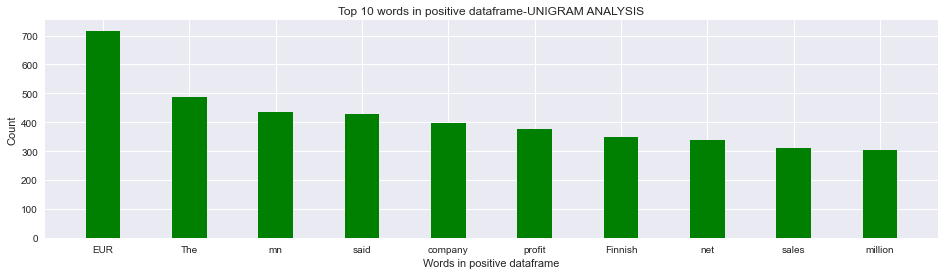

In [152]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]


plt.figure(1,figsize=(16,4))

plt.bar(pd1,pd2, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")

plt.savefig("positive-unigram.png")
plt.show()



In [147]:
df_positive.head(10)
#df_positive

,0,1
1,EUR,717
2,The,486
3,mn,435
4,said,429
5,company,399
6,profit,375
7,Finnish,348
8,net,339
9,sales,312
10,million,303


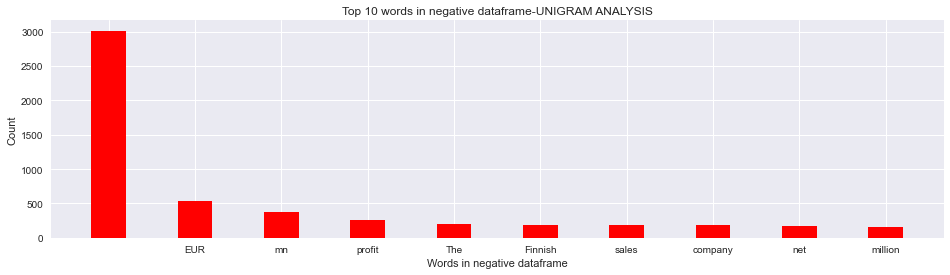

In [153]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1,ned2, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")

plt.savefig("negative-unigram.png")
plt.show()

In [66]:
df_negative.head(10)

,0,1
0,.,710
1,",",610
2,EUR,360
3,mn,252
4,profit,174
5,(,134
6,),134
7,The,134
8,'s,126
9,%,124


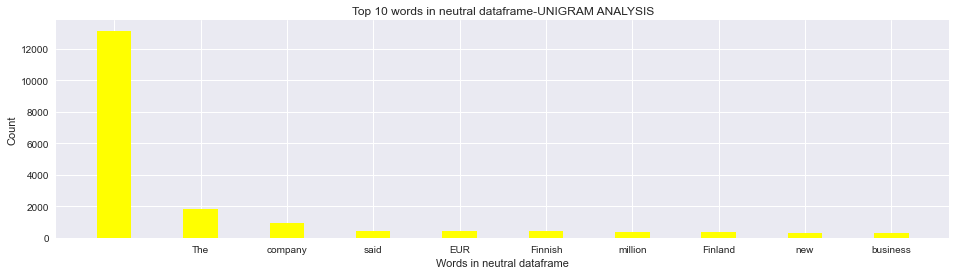

In [154]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")

plt.savefig("neutral-unigram.png")
plt.show()

In [166]:
df_neutral.head(10)

,0,1
0,,4221
1,The,580
2,company,278
3,said,139
4,EUR,128
5,Finnish,120
6,million,119
7,Finland,112
8,business,96
9,sales,94


**Creating bigrams**

In [155]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [68]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['Furthermore', ',', 'Bunge', 'also', 'sign', 'licensing', 'agreement', 'Sunnuntai', 'Carlshamn', 'Mejeri', 'brands', '.']
Sentence after removing stopwords: ['Meanwhile', ',', 'Nokia', 'said', 'able', 'deliver', 'complete', 'range', 'services', 'deployment', 'operations', 'consulting', 'integration', 'managed', 'services', 'result', 'buyout', '.']
Sentence after removing stopwords: ['The', 'fair', 'value', 'property', 'portfolio', 'doubled', 'result', 'Kapiteeli', 'acquisition', 'totalled', 'EUR', '2,686.2', '1,259.7', 'million', '.']
Sentence after removing stopwords: ['The', 'company', 'aims', 'maintain', 'trend', 'profitability', 'current', 'year', '.']
Sentence after removing stopwords: ['The', 'new', 'factory', 'working', 'model', 'reorganisations', 'would', 'decrease', 'Nokian', 'Tyres', "'", 'costs', 'factory', 'EUR', '30', 'million', '(', 'USD', '38.7', ')', '.']
Sentence after removing stopwords: ['The', 'bank', 'forecasts', 'Finland', "'s",

Sentence after removing stopwords: ['To', 'prove', 'efficiency', 'China', 'Mobile', 'system', ',', 'Rod', 'Baber', ',', 'English', 'climber', ',', 'climbed', 'Mount', 'Everest', 'summit', 'successfully', 'made', 'calls', '.']
Sentence after removing stopwords: ['Finnish', 'Aldata', 'Solution', 'signed', 'contract', 'supply', 'G.O.L.D.', 'system', 'two', 'French', 'retail', 'chains', '.']
Sentence after removing stopwords: ['Under', 'memorandum', 'understanding', 'MoU', 'parties', 'collaborate', 'preparing', 'implementing', 'joint', 'projects', 'fields', 'combined', 'power', 'heat', 'generation', ',', 'environmental', 'protection', 'energy', 'efficient', 'technologies', '.']
Sentence after removing stopwords: ['EuroChem', 'Head', 'Corporate', 'Finance', 'Alexander', 'Gavrilov', 'said', ':', '``', 'I', 'pleased', 'confirmed', 'EuroChem', 'able', 'attract', 'long-term', 'funds', 'attractive', 'rates', '.']
Sentence after removing stopwords: ['ASPO', 'Plc', 'STOCK', 'EXCHANGE', 'ANNOUNCEME

Sentence after removing stopwords: ['Brazilian', 'non-profit', 'interbank', 'Camara', 'Interbancaria', 'de', 'Pagamentos', 'CIP', 'acquired', 'solutions', 'US', 'business', 'integration', 'solutions', 'provider', 'Sterling', 'Commerce', ',', 'latter', 'company', 'said', 'statement', '.']
Sentence after removing stopwords: ['Cargotec', 'Corporation', ',', 'Press', 'Release', ',', 'April', '28', ',', '2008', '2.00', 'p.m.', 'Finnish', 'time', 'Cargotec', "'s", 'MacGREGOR', 'business', 'area', 'providing', 'marine', 'cargo', 'handling', 'offshore', 'load', 'handling', 'solutions', 'received', 'significant', 'hatch', 'cover', 'orders', 'bulk', 'carriers', '.']
Sentence after removing stopwords: ['The', 'company', 'make', 'marketing', 'sales', 'investments', 'initiated', '2009', 'even', 'efficient', '2010', '.']
Sentence after removing stopwords: ['One', 'colleagues', 'summed', 'E7', 'quite', 'aptly', 'remarked', ':', '``', 'Fantastic', 'hardware', '.']
Sentence after removing stopwords: ['

Sentence after removing stopwords: ['The', 'negotiations', 'carried', 'constructive', 'manner', ',', 'parties', 'tried', 'find', 'solution', 'situation', '.']
Sentence after removing stopwords: ['Selects', 'Third', 'Party', 'Logistics', 'Leader', 'Transplace', 'Best-in-Class', 'Technology', ',', 'Procurement', 'Capabilities', ';', 'Leading', 'Specialty', 'Packaging', 'Manufacturer', 'Employs', 'Complete', '3PL', 'Solution', 'Supply', 'Chain', 'Visibility', 'Transportation', 'Efficiency', 'Increase', 'Service', 'Levels', 'On-Time', 'Deliveries']
Sentence after removing stopwords: ['Ruukki', 'signed', 'contract', 'Norwegian', 'company', 'Veidekke', 'Entreprenor', 'AS', '.']
Sentence after removing stopwords: ['Cash', 'flow', 'operations', 'rose', 'EUR', '52.7', 'mn', 'EUR', '15.6', 'mn', '2007', '.']
Sentence after removing stopwords: ['Uponor', 'improved', 'performance', 'spite', 'decrease', 'residential', 'construction', 'US', '.']
Sentence after removing stopwords: ['The', 'executive'

Sentence after removing stopwords: ['The', 'economic', 'occupancy', 'rate', 'Sponda', "'s", 'property', 'portfolio', 'rose', '91.2', '%', '88.8', '%', '2006', '.']
Sentence after removing stopwords: ['credit', '20', 'November', '2009', '-', 'Finnish', 'glass', 'technology', 'company', 'Glaston', 'Oyj', 'Abp', '(', 'HEL', ':', 'GLA1V', ')', 'said', 'today', 'concluded', 'EUR74m', 'revolving', 'credit', 'facility', 'agreement', 'core', 'banks', '.']
Sentence after removing stopwords: ['Marimekko', 'today', '(', '20', 'November', ')', 'signed', 'license', 'agreement', 'Swedish', 'chain', ',', 'whereby', 'Marimekko', 'license', 'popular', 'patterns', '1950s', ',', '1960s', '1970s', 'H&M', '.']
Sentence after removing stopwords: ['EBITDA', 'year', '2009', 'improved', 'EUR484m', ',', 'compared', 'EUR472m', '2008', '.']
Sentence after removing stopwords: ['Operating', 'profit', 'EUR', '9.8', 'mn', ',', 'compared', 'loss', 'EUR', '12.7', 'mn', 'corresponding', 'period', '2009', '.']
Sentence a

Sentence after removing stopwords: ['Via', 'move', ',', 'company', 'aims', 'annual', 'savings', 'EUR', '3', 'million', 'USD', '4.3', ',', 'main', 'part', 'expected', 'realized', 'year', '.']
Sentence after removing stopwords: ['Finnish', 'silicon', 'wafer', 'technology', 'company', 'Okmetic', 'Oyj', '(', 'OMX', 'Helsinki', ':', 'OKM1V', ')', 'reported', 'Thursday', '(', '7', 'August', ')', 'operating', 'profit', 'EUR5', '.3', 'period', 'January-June', '2008', ',', 'EUR3', '.3', 'corresponding', 'period', '2007', '.']
Sentence after removing stopwords: ['In', 'recent', 'months', ',', 'Capman', 'taken', 'significant', 'steps', 'simplify', 'operations', ',', 'CEO', 'Lennart', 'Simonsen', 'said', '.']
Sentence after removing stopwords: ['Return', 'equity', 'stood', '18.3', '%', 'compared', '15.4', '%', 'third', 'quarter', '2005', '.']
Sentence after removing stopwords: ['Managing', 'Director', 'Kari', 'Inkinen', 'says', 'Sponda', "'s", 'leasing', 'operations', 'developed', 'highly', 'favou

Sentence after removing stopwords: ['With', 'extension', 'new', 'contract', 'eight', 'engines', ',', 'plant', 'produce', '100', 'MW', ',', 'said', '.']
Sentence after removing stopwords: ['Finnish', 'industrial', 'investor', 'Panostaja', 'Oyj', 'OMX', 'Helsinki', ':', 'PNAAS', 'OMX', 'Helsinki', ':', 'PNABS', 'said', 'Friday', '11', 'July', 'signed', 'deal', 'acquire', 'entire', 'share', 'capital', 'Kospa', 'Oy', ',', 'manufacturer', 'waste', 'disposal', 'equipment', '.']
Sentence after removing stopwords: ['After', 'transaction', ',', 'Alma', 'Media', 'raised', 'stake', 'Talentum', '30.65', '%', 'shares', '31.12', '%', 'voting', 'rights', '.']
Sentence after removing stopwords: ['The', 'Group', "'s", 'cash', 'flow', 'operations', 'positive', '.']
Sentence after removing stopwords: ['Finnish', 'retailer', 'Stockmann', 'approval', 'board', 'Swedish', 'rival', 'Lindex', 'public', 'tender', 'offer', 'aim', 'expanding', 'companies', "'", 'presence', 'Russia', 'CEE', 'countries', ',', 'Stoc

Sentence after removing stopwords: ['The', 'company', 'reports', 'loss', 'period', 'EUR', '0.4', 'mn', 'compared', 'loss', 'EUR', '1.9', 'mn', 'corresponding', 'period', '2005', '.']
Sentence after removing stopwords: ['26', 'January', '2011', '-', 'Finnish', 'metal', 'products', 'company', 'Componenta', 'Oyj', '(', 'HEL', ':', 'CTH1V', ')', 'said', 'yesterday', 'net', 'loss', 'narrowed', 'EUR500', ',000', 'last', 'quarter', '2010', 'EUR5', '.3', 'period', 'year', 'earlier', '.']
Sentence after removing stopwords: ['Acquisitions', 'made', 'businesses', 'well', 'integrated', '.']
Sentence after removing stopwords: ['Diluted', 'earnings', 'per', 'share', '(', 'EPS', ')', 'rose', 'EUR', '3.68', 'EUR', '0.50', '.']
Sentence after removing stopwords: ['The', 'Ministry', 'Water', 'Tanzania', 'awarded', 'Poyry', 'water', 'sanitation', 'engineering', 'assignment', 'rehabilitation', 'extension', 'water', 'supply', 'sanitation', 'infrastructure', 'Bukoba', 'Musoma', ',', 'situated', 'Lake', 'Vic

Sentence after removing stopwords: ['The', 'aim', 'convert', 'plants', 'flexible', 'manufacturers', 'new', 'technologically', 'demanding', 'products', '.']
Sentence after removing stopwords: ['It', 'delivers', 'different', 'user', 'experience', 'enables', 'us', 'widen', 'market', 'address', '.', "''"]
Sentence after removing stopwords: ['The', 'energy-efficient', 'data', 'center', 'built', 'combining', 'effective', 'energy', 'solution', 'state-of-the-art', 'technology', '.']
Sentence after removing stopwords: ['HELSINKI', '(', 'AFX', ')', '-', 'Metso', 'said', 'upgrade', 'one', 'UPM-Kymmene', "'s", 'four', 'paper', 'machines', 'latter', "'s", 'mill', 'Jaemsaenkoski', 'new', 'coating', 'color', 'supply', 'system', ',', 'machine', 'process', 'controls', 'quality', 'measurements', '.']
Sentence after removing stopwords: ['Last', 'week', ',', 'Finnish', 'metals', 'technology', 'group', 'announced', 'plans', 'sell', '80', 'percent', 'technology', 'unit', 'company', "'s", 'strategic', 'goal'

Sentence after removing stopwords: ['Mobile', 'phone', 'sales', 'rose', '25', '%', '5.87', 'billion', 'euros', ',', 'enterprise', 'solution', 'sales', 'dropped', '39', '%', '186', 'million', 'euros', '.']
Sentence after removing stopwords: ['In', 'third', 'quarter', ',', 'net', 'sales', 'increased', '12', '%', 'year-on-year', 'EUR159', '.5', ',', '6', '%', 'comparable', 'currency', 'rates', 'growth', '.']
Sentence after removing stopwords: ['Operating', 'profit', 'rose', 'EUR', '4.7', 'mn', 'EUR', '4.6', 'mn', '.']
Sentence after removing stopwords: ['Precedex', 'approved', 'IV', 'sedation', 'initially', 'intubated', 'mechanically', 'ventilated', 'patients', 'intensive', 'care', '.']
Sentence after removing stopwords: ['For', 'full', '2010', 'company', 'expects', 'net', 'sales', 'operating', 'result', 'improve', 'previous', 'year', ',', 'saying', 'positive', 'operating', 'result', 'amount', 'depend', 'order', 'intake', 'end', 'summer', '.']
Sentence after removing stopwords: ['com', ',

Sentence after removing stopwords: ['CEO', 'company', 'Tarmo', 'Noop', 'said', 'growth', 'sale', 'premium', 'beers', 'biggest', '.']
Sentence after removing stopwords: ['Operating', 'profit', 'improved', '44.0', '%', 'ER', '4.7', 'mn', 'EUR', '3.3', 'mn', '2004', '.']
Sentence after removing stopwords: ['(', 'ADP', 'News', ')', '-', 'Nov', '5', ',', '2008', '-', 'Finnish', 'electronic', 'measurement', 'products', 'solutions', 'maker', 'Vaisala', 'Oyj', '(', 'OMX', ':', 'VAIAS', ')', 'said', 'today', 'net', 'profit', 'rose', 'EUR', '18', 'million', '(', 'USD', '23.1', ')', 'first', 'nine', 'months', '2008', 'EUR', '1']
Sentence after removing stopwords: ['Meanwhile', ',', 'Electrowatt-Ekono', 'Philippines', ',', 'Inc.', 'also', 'awarded', 'three-year', 'operation', 'maintenance', '(', 'O&M', ')', 'contract', 'FR', 'Cement', 'Corporation', '.']
Sentence after removing stopwords: ['The', 'new', 'office', ',', 'located', 'Shenzhen', ',', 'strengthen', 'Vaisala', "'s", 'already', '10-year',

Sentence after removing stopwords: ['``', 'After', 'long', ',', 'unprofitable', 'period', 'Food', 'Division', 'posted', 'profitable', 'result', ',', 'speaks', 'healthier', 'cost', 'structure', 'new', 'approach', 'business', 'operations', ',', "''", 'Rihko', 'said', '.']
Sentence after removing stopwords: ['The', 'main', 'strength', 'cooperation', 'project', 'lies', 'merging', 'know-how', 'two', 'large', 'companies', '.']
Sentence after removing stopwords: ['Operating', 'profit', 'Asian', 'plants', 'grew', 'markedly', '.']
Sentence after removing stopwords: ['Affecto', 'expects', 'net', 'sales', 'whole', '2010', 'increase', '2009', 'level', 'reached', 'EUR', '103', 'million', '.']
Sentence after removing stopwords: ['The', 'stock', 'rose', 'third', 'day', 'Tuesday', 'bringing', 'three-day', 'rise', 'GBX10', '.50', '1.8', '%', '.']
Sentence after removing stopwords: ['EPS', 'quarter', 'EUR0', '.00', ',', 'compared', 'EUR0', '.01', 'third', 'quarter', '2008', ',', 'representing', 'Group',

Sentence after removing stopwords: ['ST.', 'PETERSBURG', ',', 'Oct', '14', '(', 'PRIME-TASS', ')', '--', 'Finnish', 'tire', 'producer', 'Nokian', 'Tyres', 'plans', 'invest', '50', 'million', 'euros', 'expansion', 'tire', 'plant', 'city', 'Vsevolozhsk', 'Russia', "'s", 'Leningrad', 'Region', '2011', ',', 'company', "'s", 'President', 'Kim', 'Gran', 'told', 'reporters', 'Thursday', '.']
Sentence after removing stopwords: ['However', ',', 'net', 'sales', '2010', 'seen', 'grown', 'EUR598', '.3', 'EUR582', '.3', '2009', '.']
Sentence after removing stopwords: ['The', 'annual', 'Thesis', 'contest', 'aimed', 'enhance', 'thesis', 'quality', 'strengthen', 'thesis', 'culture', 'polytechnics', '.']
Sentence after removing stopwords: ['``', 'We', "'ve", 'feeling', 'quite', 'positive', 'region', 'whole', '.']
Sentence after removing stopwords: ['Previously', ',', 'company', 'anticipated', 'operating', 'profit', 'improve', 'period', '.']
Sentence after removing stopwords: ['According', 'PKC', ',', '

Sentence after removing stopwords: ['A', 'portion', ',', '$', '12.5', 'million', ',', 'recorded', 'part', 'winnings', 'prior', 'patent', 'dispute', 'Finnish', 'phone', 'maker', 'Nokia', 'Oyj', '.']
Sentence after removing stopwords: ['Net', 'sales', 'totaled', 'EUR', '93.6', 'mn', ',', 'EUR', '93.2', 'mn', 'corresponding', 'period', '2005', '.']
Sentence after removing stopwords: ['Finnish', 'fibers', 'plastic', 'products', 'maker', 'Suominen', 'Corporation', 'said', 'net', 'loss', 'continuing', 'operations', 'narrowed', '1.8', 'mln', 'euro', '(', '$', '2.3', 'mln', ')', '2006', '3.7', 'mln', 'euro', '(', '$', '4.8', 'mln', ')', '2005', '.']
Sentence after removing stopwords: ['``', 'Our', 'customer', 'satisfied', 'Basware', 'Invoice', 'Automation', 'solution', 'extends', 'implementation', 'new', 'geographies', '.']
Sentence after removing stopwords: ['10', 'February', '2011', '-', 'Finnish', 'media', 'company', 'Sanoma', 'Oyj', 'HEL', ':', 'SAA1V', 'said', 'yesterday', '2010', 'net', 

Sentence after removing stopwords: ['According', 'company', ',', 'operating', 'profit', ',', 'excluding', 'non-recurring', 'items', ',', 'fourth', 'quarter', '2009', 'significantly', 'better', 'expected', ',', 'also', 'better', 'figures', 'fourth', 'quarter', '2008', '.']
Sentence after removing stopwords: ['Metsaliitto', ',', 'however', ',', 'narrowed', 'net', 'loss', 'second', 'quarter', '2007', '5.0', 'mln', 'euro', '$', '6.9', 'mln', '61', 'mln', 'euro', '$', '83.7', 'mln', 'year', 'ago', '.']
Sentence after removing stopwords: ['As', 'result', ',', 'company', 'currently', 'anticipates', 'net', 'sales', 'increase', 'operating', 'result', 'positive', '.']
Sentence after removing stopwords: ['UPM-Kymmene', 'one', 'world', "'s", 'leading', 'printing', 'paper', 'producers', 'production', '15', 'countries', 'sales', 'network', 'covering', '170', 'companies', '.']
Sentence after removing stopwords: ['3', 'January', '2011', '-', 'Finnish', 'flag', 'carrier', 'Finnair', 'Oyj', '(', 'HEL', 

Sentence after removing stopwords: ['It', 'combine', 'renew', 'contents', 'functionality', 'current', 'systems', 'funding', 'online', 'service', 'well', 'maintenance', '.']
Sentence after removing stopwords: ['January', '11', ',', '2010', 'EPHC', 'board', 'directors', 'approved', 'increase', 'quarterly', 'dividend', '$', '0.03', '$', '0.05', 'per', 'share', '.']
Sentence after removing stopwords: ['CEO', 'Erkki', 'J+Ærvinen', 'happy', 'company', "'s", 'performance', '2010', '.']
Sentence after removing stopwords: ['Finnish', 'Suominen', 'Corporation', 'specialises', 'wet', 'wipes', ',', 'nonwovens', ',', 'flexible', 'packaging', 'reports', 'net', 'sales', 'EUR', '44.1', 'mn', 'second', 'quarter', '2010', ',', 'EUR', '43.3', 'mn', 'second', 'quarter', '2009', '.']
Sentence after removing stopwords: ['The', 'offer', 'represents', 'premium', '24', '%', 'stock', "'s", 'closing', 'price', 'Friday', '.']
Sentence after removing stopwords: ['Clothing', 'retail', 'chain', 'Sepp+Æl+Æ', "'s", 's

Sentence after removing stopwords: ['The', 'Group', 'also', 'strong', 'global', 'position', 'fishing', 'categories', '.']
Sentence after removing stopwords: ['Sponda', 'Plc', 'Stock', 'Exchange', 'Release', '5', 'December', '2006', '15.45', 'EUR', '1.5', 'BILLION', 'SYNDICATED', 'CREDIT', 'FACILITY', 'FOR', 'SPONDA', 'Sponda', 'signed', 'agreement', 'one-year', 'syndicated', 'credit', 'facility', 'total', 'EUR', '1.5', 'billion', '.']
Sentence after removing stopwords: ['The', 'borrower', 'happy', 'roadshow', 'paid', 'hit', 'ratio', 'high', '.']
Sentence after removing stopwords: ['-', 'BEIJING', 'XFN-ASIA', '-', 'Hong', 'Kong-listed', 'Standard', 'Chartered', 'Bank', 'said', 'signed', 'China', 'mobile', 'phone', 'dealer', 'financing', 'agreement', 'Nokia', ',', 'making', 'first', 'foreign', 'bank', 'offer', 'financing', 'country', "'s", 'small', 'medium', 'enterprise', '-LR']
Sentence after removing stopwords: ['This', 'first', 'time', 'Finnair', 'awarded', 'agreement', 'UK', 'governm

Sentence after removing stopwords: ['Consolidated', 'pretax', 'profit', 'decreased', '69.2', '%', 'EUR', '41.0', 'mn', 'EUR', '133.1', 'mn', '2007', '.']
Sentence after removing stopwords: ['Layoffs', 'also', 'take', 'place', 'Suomussalmi', 'Kuhmo', 'plants', 'autumn', 'result', 'codetermination', 'negotiations', 'held', '.']
Sentence after removing stopwords: ['The', 'steelmaker', 'said', 'drop', 'profit', 'explained', 'continuing', 'economic', 'uncertainty', ',', 'mixed', 'current', 'drought', 'bank', 'lending', ',', 'resulting', 'decline', 'demand', 'products', 'customers', 'find', 'increasingly', 'difficult', 'fund', 'operations', '.']
Sentence after removing stopwords: ['SRV', 'lowered', 'net', 'sales', 'estimate', 'whole', '2008', 'due', 'uncertainties', 'housing', 'sales', '.']
Sentence after removing stopwords: ['He', 'said', 'losing', 'five', 'families', 'month', 'economy', 'many', 'make', 'alternative', 'arrangements', 'save', 'money', '.']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['The', 'contracts', 'employees', ',', '96', 'blue-collar', 'workers', ',', 'ended', 'March', 'August', '2011', '.']
Sentence after removing stopwords: ['At', 'moment', ',', 'Valio', 'worried', ',', 'ban', 'continues', 'long', ',', 'may', 'become', 'quite', 'problem', '.']
Sentence after removing stopwords: ['The', 'situation', 'coated', 'magazine', 'printing', 'paper', 'continue', 'weak', '.']
Sentence after removing stopwords: ['Finnish', 'plumbing', 'heating', 'systems', 'supplier', 'Uponor', "'s", 'net', 'sales', 'continuing', 'business', 'operations', 'decreased', 'EUR', '249.1', 'mn', 'July-September', '2008', ',', 'compared', 'EUR', '262.1', 'mn', 'third', 'quarter', '2007', '.']
Sentence after removing stopwords: ['Commission', 'income', 'fell', 'EUR', '4.6', 'mn', 'EUR', '5.1', 'mn', 'corresponding', 'period', '2007', '.']
Sentence after removing stopwords: ['ADPnews', '-', 'Jul', '17', ',', '2009', '-', 'Finland-based', 'steel', 'maker', 'Ra

Sentence after removing stopwords: ['The', 'maritime', 'administration', 'said', 'ships', 'ignored', 'warnings', 'icy', 'conditions', '.']
Sentence after removing stopwords: ['Cuts', 'equivalent', 'costs', '35-45', 'employees', 'target', ',', 'company', 'said', '.']
Sentence after removing stopwords: ['Net', 'sales', 'dropped', '6', '%', 'year-on-year', 'EUR', '11.9', 'million', '.']
Sentence after removing stopwords: ['Earnings', 'per', 'share', '(', 'EPS', ')', 'amounted', 'loss', 'EUR0', '.38', '.']
Sentence after removing stopwords: ['Finnish', 'soapstone', 'processing', 'fireplaces', 'maker', 'Tulikivi', 'Oyj', 'said', 'February', '26', ',', '2007', 'would', 'cut', 'less', '20', 'jobs', 'fireplace', 'sales', 'organization', ',', 'production', 'facilities', 'subsidiary', 'Kermansavi', 'Oy', '.']
Sentence after removing stopwords: ['A', 'survey', 'conducted', 'Taloustutkimus', 'Sampo', 'Life', 'shows', 'companies', 'badly', 'prepared', 'losing', 'key', 'staff', 'members', '.']
Sente

Sentence after removing stopwords: ['Many', 'commercial', 'vessels', 'got', 'stuck', 'narrow', 'Bay', 'Bothnia', ',', 'ice', 'thicker', ',', 'around', 'Aaland', 'islands', '.']
Sentence after removing stopwords: ['Frost', 'sold', 'shares', '$', '19', 'million', '$', '6.06-7', '.12', 'per', 'share', ',', 'compared', 'Friday', "'s", 'high', '$', '11.33', 'low', '$', '10.14', '.']
Sentence after removing stopwords: ['Applying', 'summer', 'work', 'seen', 'laborious', 'stressful', '.']
Sentence after removing stopwords: ['The', 'airline', 'estimated', 'cancellation', 'flights', 'due', 'closure', 'European', 'airspace', ',', 'process', 'recommencing', 'traffic', ',', 'caused', 'company', 'loss', 'EUR20m', ',', 'including', 'costs', 'stranded', 'passengers', "'", 'accommodation', '.']
Sentence after removing stopwords: ['The', 'number', 'permanent', 'reductions', 'clerical', 'workers', '22', 'employees', ',', '19', 'Finland', '.']
Sentence after removing stopwords: ['Finnish', 'financial', 's

Sentence after removing stopwords: ['Consolidated', 'operating', 'profit', 'continuing', 'operations', 'decreased', '62.3', '%', 'EUR', '51.2', 'mn', 'EUR', '135.7', 'mn', '2007', '.']
Sentence after removing stopwords: ['A', 'total', '16.5', 'mn', 'passenger', 'ship', 'journeys', 'took', 'place', 'northern', 'Baltic', 'Sea', '2007', ',', 'slightly', '16.5', 'mn', '2006', '.']
Sentence after removing stopwords: ['Operating', 'profit', '12-month', 'period', 'decreased', 'EUR17', '.9', 'net', 'sales', 'increased', 'EUR58', '.3', ',', 'compared', '2007', '.']
Sentence after removing stopwords: ['The', 'majority', 'company', "'s", 'personnel', 'Finland', 'temporarily', 'laid', 'one', 'six', 'weeks', 'period', 'February', 'June', '2009', 'period', '.']
Sentence after removing stopwords: ['Sales', 'Tiimari', 'business', 'went', '8', '%', 'EUR', '11.8', 'million', ',', 'Gallerix', 'stores', 'saw', '29', '%', 'growth', 'EUR', '2', 'million', '.']
Sentence after removing stopwords: ['Finnish', 

Sentence after removing stopwords: ['The', 'number', 'bodily', 'injury', 'cases', 'quadrupled', '2000-2006', '.']
Sentence after removing stopwords: ['However', ',', 'suspect', 'stole', 'burgundy', 'Nissan', 'Altima', '.']
Sentence after removing stopwords: ['Earnings', 'per', 'share', '(', 'EPS', ')', 'amounted', 'EUR1', '.37', ',', 'EUR2', '.30', '.']
Sentence after removing stopwords: ['SSH', 'COMMUNICATIONS', 'SECURITY', 'CORP', 'STOCK', 'EXCHANGE', 'RELEASE', 'OCTOBER', '14', ',', '2008', 'AT', '2:45', 'PM', 'The', 'Company', 'updates', 'full', 'year', 'outlook', 'estimates', 'results', 'remain', 'loss', 'full', 'year', '.']
Sentence after removing stopwords: ['Kone', 'shares', 'dropped', '4.1', 'percent', '', 'x20ac', '43', 'US$', '55.77', 'Helsinki', '.']
Sentence after removing stopwords: ['The', 'tightened', 'competition', 'situation', 'production', 'automation', 'market', 'affected', 'net', 'sales', '2006', ',', 'Cencorp', 'said', '.']
Sentence after removing stopwords: ['Whe

Sentence after removing stopwords: ['Rapala', 'VMC', 'Corporation', 'STOCK', 'EXCHANGE', 'RELEASE', 'October', '10', ',', '2008', '11.45', 'Kaupthing', 'Bank', 'Oyj', '(', '``', 'Kapthing', "''", ')', 'informed', 'Rapala', 'VMC', 'Corporation', '(', '``', 'Rapala', "''", ')', 'interrupted', 'liquidity', 'providing', 'Rapala', "'s", 'share', 'time', '.']
Sentence after removing stopwords: ['``', 'The', 'considerably', 'weaker', 'U.S.', 'dollar', 'British', 'pound', 'impact', 'sales', 'average', 'prices', 'euros', ',', "''", 'UPM', 'said', '.']
Sentence after removing stopwords: ['Finnish', 'developer', 'manufacturer', 'mobile', 'phone', 'chargers', 'Salcomp', 'Plc', 'OMX', 'Helsinki', ':', 'SAL1V', 'Wednesday', '19', 'November', 'lowered', 'full-year', 'net', 'sales', 'estimate', '.']
Sentence after removing stopwords: ['More', '14,000', 'customers', 'left', 'powerless', '.']
Sentence after removing stopwords: ['Nordea', 'Pankki', 'Suomi', 'Oyj', "'s", 'ownership', 'Stonesoft', 'Corpora

Sentence after removing stopwords: ['``', 'We', 'become', 'convinced', 'quickly', ',', "''", 'told', 'Finnish', 'business', 'reporters', '.']
Sentence after removing stopwords: ['It', 'expects', 'revenue', '$', '8.4', 'billion', '$', '8.7', 'billion', ',', 'compared', 'analyst', 'estimates', '$', '8.67', 'billion', '.']
Sentence after removing stopwords: ['The', 'value', 'deal', 'disclosed', '.']
Sentence after removing stopwords: ['Less', 'ten', 'people', 'face', 'pension', 'agreements', '.']
Sentence after removing stopwords: ['The', 'share', 'sale', ',', 'foreign', 'Finnish', 'investors', ',', 'expected', 'raise', 'euro300', 'million', '(', 'US$', '380', 'million', ')', '.']
Sentence after removing stopwords: ['The', 'pine', 'oil', 'project', 'related', 'upgrade', 'chemical', 'recovery', 'plant', 'UPM', 'pulp', 'mill', 'Kymi', ',', 'southern', 'Finland', '.']
Sentence after removing stopwords: ['According', 'latest', 'information', ',', 'Benefon', 'launch', 'Twig', 'device', '20', '

Sentence after removing stopwords: ['ALEXANDRIA', ',', 'Va.', ',', 'Oct.', '6', '--', 'United', 'States', 'Patent', 'no.', '7,804,288', ',', 'issued', 'Sept.', '28', ',', 'assigned', 'Vacon', 'Oyj', '(', 'Vaasa', ',', 'Finland', ')', '.']
Sentence after removing stopwords: ['Paychex', '100', 'offices', 'serving', 'approximately', '554,000', 'payroll', 'clients', 'nationwide', 'May', '31', ',', '2009', '.']
Sentence after removing stopwords: ['The', 'company', 'said', 'shareholders', 'able', 'vote', 'agreement', 'EGM', 'scheduled', 'later', 'month', '.']
Sentence after removing stopwords: ['-', 'So', ',', 'sales', 'growth', 'cars', 'considerably', 'influence', 'tires', 'market', "''", '.']
Sentence after removing stopwords: ['The', 'company', 'hoped', 'new', 'plant', 'would', 'stream', 'end', '2008', '.']
Sentence after removing stopwords: ['A', 'total', '750,330', 'new', 'Citycon', 'shares', 'nominal', 'value', 'EUR', '1.35', 'per', 'share', 'subscribed', 'December', 'exercising', 'A-B

Sentence after removing stopwords: ['Conference', 'Call', 'To', 'participate', 'via', 'conference', 'call', ',', 'please', 'dial', '5-10', 'minutes', 'beginning', 'event', ':', '+44', '0', '20', '7162', '0025', 'Europe', '+1', '334-£323-£6201', 'USA', '.']
Sentence after removing stopwords: ['HELSINKI', '(', 'AFX', ')', '-', 'Outokumpu', 'said', 'agreed', 'sell', 'Hitura', 'nickel', 'mine', 'Finland', 'Canadian', 'group', 'Belvedere', 'Resources', 'Ltd', '10', 'mln', 'eur', 'worth', 'Belvedere', 'shares', '.']
Sentence after removing stopwords: ['The', 'order', 'comprises', 'production', 'lines', 'plywood', 'mill', ',', 'company', 'said', 'statement', 'received', 'Lesprom', 'Network', '.']
Sentence after removing stopwords: ['The', 'Whitehall', 'Street', 'Real', 'Estate', 'Funds', 'invest', 'real', 'estate', 'real', 'estate', 'related', 'assets', ',', 'principally', 'acquisition', 'real', 'estate', 'companies', ',', 'real', 'property', 'mortgage', 'loans', '.']
Sentence after removing 

Sentence after removing stopwords: ['The', 'Kyroskoski', 'investment', 'completed', 'late', '2011', '+_+Ænekoski', 'investment', 'spring', '2012', '.']
Sentence after removing stopwords: ['-', 'Among', 'Finnish', 'shares', 'traded', 'US', ',', 'Stora', 'Enso', 'closed', '0.33', 'pct', 'lower', '12.11', 'eur', ',', 'UPM-Kymmene', '0.28', 'pct', '18.10', 'eur', ',', 'Metso', '0.13', 'pct', '31.06', 'eur', '.']
Sentence after removing stopwords: ['Vacon', 'supply', 'drives', 'Ruselprom', 'power', 'range', '200', 'kW', '2', 'MW', '.']
Sentence after removing stopwords: ['CORPORATE', 'IT', 'UPDATE', '-', '(', 'C', ')', '1995-2009', 'M2', 'COMMUNICATIONS', 'LTD', 'Finnish', 'technology', 'group', 'Teleste', 'Corporation', '(', 'OMX', 'Helsinki', ':', 'TLT1V', ')', 'reported', 'Wednesday', '(', '4', 'February', ')', 'operating', 'profit', 'EUR5', '.6', 'net', 'sales', 'EUR108', '.7', 'year', '2008', '.']
Sentence after removing stopwords: ['The', 'online', 'ice', 'chart', 'shows', 'ice', 'are

Sentence after removing stopwords: ['Finland', "'s", 'Technopolis', 'planning', 'bring', 'first', 'section', 'technopark', 'stream', 'St.', 'Petersburg', 'end', '2008', ',', 'Kari', 'Mikkonen', ',', 'vice', 'president', 'Technopolis', ',', 'told', 'reporters', 'Helsinki', '.']
Sentence after removing stopwords: ['Temporary', 'layoffs', 'units', 'already', 'started', '.']
Sentence after removing stopwords: ['The', 'inventors', 'Bylander', 'Johan', ',', 'Ponten', 'Fredrik', 'Lundberg', 'Jorgen', '.']
Sentence after removing stopwords: ['In', 'stead', 'based', 'soft', 'drink', ',', 'usual', ',', 'Teho', 'energy', 'drink', 'made', 'fresh', 'water', '.']
Sentence after removing stopwords: ['On', '20', 'March', '2006', ',', 'Stora', 'Enso', 'refused', 'comment', 'news', 'way', '.']
Sentence after removing stopwords: ['A', 'maximum', '666,104', 'new', 'shares', 'subscribed', 'exercising', 'B', 'options', '2004', 'stock', 'option', 'plan', '.']
Sentence after removing stopwords: ['Look', 'vint

Sentence after removing stopwords: ['Electronic', 'versions', 'require', '24-48', 'hours', 'copy', 'customized', 'client', 'digital', 'controls', 'custom', 'watermarks', '.']
Sentence after removing stopwords: ['The', 'sellers', 'founders', 'company', '.']
Sentence after removing stopwords: ['treatment', 'products', 'Usa', ',', 'Canada', ',', 'Mexico', ',', 'Australia', 'Brazil', 'Today', ',', 'Global', 'Research', '&', 'Data', 'Services', 'going', 'publish', 'several', 'market', 'analyses', 'markets', 'water', 'treatment', 'products', 'selected', 'countries', '.']
Sentence after removing stopwords: ['With', 'sales', '$', '12.7', 'billion', 'last', 'twelve', 'months', 'ending', 'October', ',', '2010', '9,200', 'stores', '35', 'states', ',', 'Dollar', 'General', 'nation', "'s", 'largest', 'small', 'box', 'discount', 'retailer', '.']
Sentence after removing stopwords: ['The', 'total', 'floor', 'area', 'plant', 'expansion', '29,000', 'square', 'metres', '.']
Sentence after removing stopwo

Sentence after removing stopwords: ['The', 'inventor', 'issued', 'U.S.', 'Patent', 'No.', '.']
Sentence after removing stopwords: ['Mr.', 'Doring', 'Eaton', 'since', '1989', 'acted', 'Business', 'Unit', 'Manager', 'Eaton', "'s", 'Power', 'Controls', 'Business', 'Unit', 'since', 'January', '2007', '.']
Sentence after removing stopwords: ['The', 'report', 'profiles', '614', 'companies', 'including', 'many', 'key', 'niche', 'players', 'worldwide', 'Black', '&', 'Decker', 'Corporation', ',', 'Fiskars', 'Corporation', ',', 'Fiskars', 'Brands', ',', 'Inc.', ',', 'Husqvarna', 'Outdoor', 'Products', 'Inc.', ',', 'K+S', 'Group', ',', 'Ryobi', 'Technologies', ',', 'Inc.', ',', 'The', 'Scotts', 'Miracle-Gro', 'Company', ',', 'Van', 'Group', ',', 'Inc.', '.']
Sentence after removing stopwords: ['This', 'could', 'us', 'time', ',', "''", 'said', '.']
Sentence after removing stopwords: ['Mr.', 'Mikko', 'Saavalainen', ',', 'head', 'Comptel', "'s", 'Global', 'Sales', 'concludes', ':', '``', 'Gibtelecom

Sentence after removing stopwords: ['The', 'report', 'emailed', 'within', '2', 'business', 'days', 'order', '.']
Sentence after removing stopwords: ['In', 'addition', ',', 'contract', 'includes', 'modification', 'effluent', 'treatment', 'plant', 'Follum', '.']
Sentence after removing stopwords: ['The', 'total', 'project', 'duration', 'three', 'years', 'valued', 'EUR11', '.5', 'm.']
Sentence after removing stopwords: ['The', 'figure', 'include', 'food', 'exports', 'Finland', '.']
Sentence after removing stopwords: ['The', 'new', 'name', 'Sanoma', 'Division', 'Sanoma', 'News', '.']
Sentence after removing stopwords: ['Under', 'plan', ',', 'CSES', 'worked', 'together', 'Public', 'Policy', 'Management', 'Institute', '(', 'PPMI', ')', 'partners', ',', 'buildings', 'total', 'area', '10,000', 'square', 'meters', 'built', 'territory', 'first', 'phase', '.']
Sentence after removing stopwords: ['So', 'far', 'company', 'awarded', '$', '350,000', 'worth', 'tools', 'materials', '.']
Sentence after 

Sentence after removing stopwords: ['However', ',', 'March', '2009', ',', 'government', 'St.', 'Petersburg', 'passed', 'front', 'part', 'building', 'area', '1,900', 'square', 'metres', 'land', 'plot', 'hotel', 'worth', 'USD', '10-15mn', 'company', 'Delta', '.']
Sentence after removing stopwords: ['Of', 'shares', '14,747,084', 'held', 'Company', 'number', 'outstanding', 'shares', 'voting', 'rights', 'attached', 'shares', 'amounts', 'thus', '161,256,847', '.']
Sentence after removing stopwords: ['The', 'cosmetics', 'collection', 'includes', 'eye', 'shadow', ',', 'face', 'powder', ',', 'lip', 'gloss', ',', 'mascara', 'accessories', '.']
Sentence after removing stopwords: ['As', 'result', 'transaction', ',', 'Sanoma', 'Budapest', 'acquired', 'stake', 'online', 'store', 'Egeszsegbolt', '.']
Sentence after removing stopwords: ['Finnish', 'L&T', 'Recoil', ',', 'company', 'specialising', 'used', 'oil', 'regeneration', ',', 'building', 'facility', 'Hamina', 'Finland', '2008', '.']
Sentence afte

Sentence after removing stopwords: ['Finnish', 'construction', 'machinery', 'equipment', 'rental', 'group', 'Cramo', 'Oyj', 'said', 'March', '21', ',', '2007', 'Swedish', 'sector', 'subsidiary', 'Cramo', 'AB', 'sell', 'Dutch', 'subsidiary', 'Cramo', 'Nederland', 'B.V.', '(', 'CNL', ')', 'Dutch', 'rental', 'scaffolding', 'company', 'Jaston', 'Groep', 'B.V.', 'undisclosed', 'sum', '.']
Sentence after removing stopwords: ['Absolut', 'Bank', 'exploring', 'possibility', 'borrowing', '.']
Sentence after removing stopwords: ['The', 'maximum', 'amount', 'capital', 'loan', 'EUR30m', 'minimum', 'subscription', '--', 'EUR10', ',000', '.']
Sentence after removing stopwords: ['Our', 'in-depth', 'expertise', 'extends', 'fields', 'energy', ',', 'industry', ',', 'urban', '&', 'mobility', 'water', '&', 'environment', '.']
Sentence after removing stopwords: ['Vacon', 'aims', 'establish', 'presence', 'solar', 'energy', 'business', 'various', 'parts', 'world', 'towards', 'end', '2010', ',', 'said', 'Olli'

Sentence after removing stopwords: ['Aspocomp', 'intends', 'set', 'plant', 'manufacture', 'printed', 'circuit', 'boards', 'investment', 'Rs310', 'crore', '.']
Sentence after removing stopwords: ['Simultaneously', 'merger', 'plan', 'another', 'merger', 'plan', 'signed', ',', 'according', 'Suomen', 'Projektivuokraus', 'Oy', ',', 'subsidiary', 'VTM-Rakennuskonevuokraamo', 'Oy', ',', 'would', 'merged', 'VTM-Rakennuskonevuokraamo', 'Oy', '.']
Sentence after removing stopwords: ['Elite', 'Residence', 'Tower', ',', 'new', 'development', 'Tameer', ',', 'located', 'heart', 'Dubai', 'Marina', '.']
Sentence after removing stopwords: ['Margin', 'call', 'Zanadvorov', 'given', 'chance', 'make', 'purchase', 'credit', 'Deutsche', 'Bank', 'USD', '560', 'million', '.']
Sentence after removing stopwords: ['According', 'Finnish', 'financial', 'services', 'group', 'Sampo', "'s", 'CEO', ',', 'Bj+¦rn', 'Wahlroos', ',', 'Danish', 'Danske', 'Bank', "'s", 'acquisition', 'Sampo', 'Bank', 'EUR', '4bn', 'largest',

Sentence after removing stopwords: ['L&T', 'operative', 'Finland', ',', 'Sweden', ',', 'Latvia', ',', 'Russia', 'Norway', '.']
Sentence after removing stopwords: ['Finnish', 'Rautaruukki', "'s", 'engineering', 'division', 'Ruukki', 'Engineering', 're-organise', 'operations', 'Mo', 'Rana', 'plant', 'Norway', '.']
Sentence after removing stopwords: ['561,470', 'new', 'shares', '2003', 'option', 'rights', 'plan', 'Packaging', 'company', 'Huhtamaki', 'Oyj', 'reported', 'Monday', 'total', '561,470', 'new', 'shares', 'company', 'issued', 'based', 'share', 'subscriptions', '2003', 'option', 'rights', 'plan', '.']
Sentence after removing stopwords: ['The', 'event', 'also', 'viewed', 'live', 'webcast', 'www.cargotec.com', '.']
Sentence after removing stopwords: ['With', 'Basware', 'Connectivity', 'services', ',', 'companies', 'gain', 'visibility', 'audit', 'trail', 'traced', 'order', 'goods', 'delivery', 'invoice', '.']
Sentence after removing stopwords: ['For', '2009', ',', 'net', 'profit', 'E

Sentence after removing stopwords: ['Her', 'last', 'position', 'Nokia', 'Siemens', 'Networks', 'head', 'Business', 'Human', 'Resources', 'NSN', 'global', 'IT', '.']
Sentence after removing stopwords: ['Following', 'demerger', ',', 'vice', 'president', 'group', "'s", 'pharmaceutical', 'trade', 'Finland', ',', 'Jukka', 'Niemi', ',', 'appointed', 'managing', 'director', 'Oriola', 'addition', 'current', 'responsibilities', '.']
Sentence after removing stopwords: ['The', 'company', 'exported', 'twenty', 'European', 'countries', 'well', 'Africa', '.']
Sentence after removing stopwords: ['According', ',', 'construction', 'work', 'start', 'spring', '2007', ',', 'facility', 'commissioned', 'spring', '2008', '.']
Sentence after removing stopwords: ['The', 'share', 'subscription', 'period', 'C', 'options', 'commence', '1', 'September', '2008', 'expire', '31', 'March', '2011', '.']
Sentence after removing stopwords: ['These', 'include', 'software', 'development', 'internet', 'mobile', 'telephone',

Sentence after removing stopwords: ['The', 'purchase', 'price', 'disclosed', '.']
Sentence after removing stopwords: ['The', 'flagship', 'open', 'fall', 'Manhattan', "'s", 'Flatiron', 'District', '``', 'Toy', 'Building', ',', "''", '200', 'Fifth', 'Avenue', '.']
Sentence after removing stopwords: ['For', '2009', ',', 'net', 'profit', 'EUR3m', 'company', 'paid', 'dividend', 'EUR1', '.30', 'apiece', '.']
Sentence after removing stopwords: ['The', 'shares', 'subscribed', 'eligible', 'trade', 'following', 'day', 'registration', '.']
Sentence after removing stopwords: ['Boomeranger', 'Boats', 'Oy', 'specialises', 'boat', 'building', 'designs', ',', 'manufactures', 'sells', 'customised', 'Rigid', 'Inflatable', 'Boats', 'RIB', 'primarily', 'Baltic', 'Sea', 'market', '.']
Sentence after removing stopwords: ['After', 'transaction', ',', 'Herttaassa', "'s", 'holding', 'Alma', 'Media', 'fallen', 'flagging', 'limit', '5', '%', '.']
Sentence after removing stopwords: ['Ahlstrom', ',', 'headquartere

Sentence after removing stopwords: ['It', 'profitable', 'make', 'pulp', ',', 'paper', ',', 'sawn', 'goods', 'areas', 'combination', 'factors', 'good', '.']
Sentence after removing stopwords: ['``', 'We', ',', 'relevant', 'authority', 'approvals', ',', 'make', 'mandatory', 'bid', 'required', 'Finnish', 'Securities', 'Markets', 'Act', '.']
Sentence after removing stopwords: ['Earnings', 'per', 'share', 'EUR', '-0.04', '-0.06', '.']
Sentence after removing stopwords: ['-', 'Tikkurila', 'inspires', 'color', 'life', '.']
Sentence after removing stopwords: ['The', 'value', 'orders', 'EUR', '25mn', '.']
Sentence after removing stopwords: ['One', 'price', 'category', 'calls', 'preferred', 'operator', "'s", 'network', ',', 'another', 'calls', 'operators', "'", 'networks', '.']
Sentence after removing stopwords: ['Arto', 'Ryymin', ',', 'born', '1964', ',', 'replace', 'Juhani', 'Kaisanlahti', 'worked', 'acting', 'EVP', ',', 'Healthcare', '&', 'Welfare', 'since', 'August', '2007', '.']
Sentence af

Sentence after removing stopwords: ['Cargotec', "'s", 'business', 'areas', 'also', 'include', 'container', 'handling', 'solutions', 'business', 'area', 'Kalmar', 'marine', 'cargo', 'handling', 'offshore', 'load', 'handling', 'solutions', 'business', 'area', 'MacGREGOR', '.']
Sentence after removing stopwords: ['``', 'People', 'enjoy', 'mobile', 'games', 'often', 'customers', 'enjoy', 'experimenting', 'new', 'mobile', 'services', 'content', '.']
Sentence after removing stopwords: ['City24', 'users', 'search', 'homes', 'properties', 'areas', 'City24', 'active', ',', 'even', 'outside', 'country', '.']
Sentence after removing stopwords: ['TVO', "'s", 'two-unit', '1,740', 'MW', 'Olkiluoto', 'plant', 'generated', '14.2', 'TWh', 'operating', 'ratio', 'across', 'reactors', '93.5', '%', ',', 'company', 'described', '``', 'high', 'international', 'standards', "''", '.']
Sentence after removing stopwords: ['The', 'unit', 'planned', 'operational', 'second', 'half', '2007', 'full', 'stream', '2008'

Sentence after removing stopwords: ['As', 'part', 'plan', ',', 'Board', 'Directors', 'decided', 'transfer', 'maximum', '330,000', 'shares', 'held', 'company', 'share', 'issue', 'payment', 'directed', 'Aspo', 'Management', 'Oy', ',', 'holding', 'company', 'acquired', 'management', '.']
Sentence after removing stopwords: ['In', 'December', ',', 'Amer', 'announced', 'dismissal', 'CEO', 'Roger', 'Talermo', ',', 'headed', 'company', 'since', '2006', '.']
Sentence after removing stopwords: ['The', 'study', 'evaluated', 'safety', ',', 'tolerability', 'pharmacokinetics', 'repeated', 'doses', 'intravenously', 'administered', 'antibody', '26', 'patients', 'active', 'plaque', 'psoriasis', '.']
Sentence after removing stopwords: ['This', 'includes', 'EUR', '39.5', 'mn', 'change', 'fair', 'value', 'investment', 'properties', '.']
Sentence after removing stopwords: ['Construction', 'work', 'Helsinki', 'Music', 'Centre', 'start', 'autumn', ',', 'total', 'cost', 'project', 'estimated', '140', 'million

Sentence after removing stopwords: ['The', 'order', 'consists', 'capacity', 'expansion', ',', 'maintenance', 'services', 'new', 'charging', 'functionality', ',', 'company', 'said', '.']
Sentence after removing stopwords: ['The', 'corresponding', 'increase', 'share', 'capital', ',', 'EUR422', ',754', ',', 'entered', 'Trade', 'Register', 'today', '.']
Sentence after removing stopwords: ['The', 'deal', 'process', 'cranes', 'Russian', 'steel', 'mill', 'PNTZ', 'Pervorouralsky', 'order', 'placed', 'Turkish', 'construction', 'company', 'Gama', 'Endustri', 'Tesisleri', 'Imalat', 'Montaj', 'AS', '.']
Sentence after removing stopwords: ['Aldata', 'said', 'still', 'number', 'operational', 'aspects', 'defined', 'Microsoft', 'details', 'product', 'market', 'initiatives', 'resulting', 'agreement', 'available', 'later', 'date', '.']
Sentence after removing stopwords: ['Other', 'shareholder', 'entitlements', 'became', 'effective', 'today', '.']
Sentence after removing stopwords: ['MILAN', '(', 'AFX', 

Sentence after removing stopwords: ['Anttila', "'s", 'online', 'department', 'store', '-', 'NetAnttila', '-', 'established', 'position', 'best-known', ',', 'visited', 'shopped', 'online', 'store', 'Finland', '', '.']
Sentence after removing stopwords: ['CF2', 'Pty', 'Ltd', 'became', 'substantial', 'holder', 'Renison', 'Consolidated', 'Mines', 'NL', 'January', '25', '150', 'million', 'shares', '(', '7.9', 'pc', ')', '.']
Sentence after removing stopwords: ['The', 'Tecnomen', 'Convergent', 'Charging', 'solution', 'includes', 'functionality', 'prepaid', 'post-paid', 'billing', ',', 'charging', 'rating', 'voice', 'calls', ',', 'video', 'calls', ',', 'raw', 'data', 'traffic', 'type', 'content', 'services', 'mobile', 'fixed', 'networks', '.']
Sentence after removing stopwords: ['The', '10,000-odd', 'square', 'metre', 'plot', 'Stockmann', 'bought', 'Nevsky', 'Center', 'shopping', 'center', 'located', 'Nevsky', 'Prospect', ',', 'St', 'Petersburg', "'s", 'high', 'street', ',', 'next', 'Vosstani

Sentence after removing stopwords: ['Mr.', 'McDonald', 'started', 'evening', 'set', ',', 'featuring', 'hits', 'solo', 'career', 'Doobie', 'Brothers', 'years', 'selection', 'R&B', 'cover', 'songs', 'met', 'mixed', 'results', '.']
Sentence after removing stopwords: ['LIGHTS', 'OUT', 'Before', 'curfew', ',', 'curl', 'latest', 'bestseller', 'treat', 'eyes', 'perfect', 'reading', 'light', 'Luceplan', '.']
Sentence after removing stopwords: ['A', 'comprehensive', 'range', 'cut-to-length', 'slitting', 'services', 'allow', 'Ruukki', 'particular', 'serve', 'light', 'engineering', 'customers', 'relocate', 'production', 'St.', 'Petersburg', 'area', '.']
Sentence after removing stopwords: ['Another', 'noticeable', 'thing', 'search', 'Tata', 'Airtel', 'brands', 'mostly', 'related', '`', 'broadband', 'connections', "'", '.']
Sentence after removing stopwords: ['The', 'business', 'divested', 'generates', 'consolidated', 'net', 'sales', 'EUR', '60', 'million', 'annually', 'currently', '640', 'employee

Sentence after removing stopwords: ['The', 'company', 'wide', 'selection', 'metal', 'products', 'services', '.']
Sentence after removing stopwords: ['It', 'comes', 'complete', 'LCD', 'touch', 'screen', 'system', 'selection', 'chosen', 'function', 'prices', 'start', 'around', 'pounds', '4,805', 'mark', '.']
Sentence after removing stopwords: ['Aspo', 'serves', 'demanding', 'business-to-business', 'customers', '.']
Sentence after removing stopwords: ['Finnish', 'Bank', '+_land', 'launch', 'long-term', 'pension', 'savings', 'account', 'beginning', 'June', '2010', '.']
Sentence after removing stopwords: ['In', 'addition', 'reduction', 'nine', 'persons', 'made', 'pension', 'arrangements', ',', 'company', 'added', '.']
Sentence after removing stopwords: ['Of', 'course', ',', "'ll", 'direct', 'access', 'Nokia', "'s", 'Ovi', 'store', ',', "'ll", 'lots', 'fun', 'downloading', 'favorite', 'media', '.']
Sentence after removing stopwords: ['Incap', 'Contract', 'Manufacturing', 'Services', 'Pvt', '

Sentence after removing stopwords: ['The', 'aim', 'CEO', "'s", 'Q&A', 'sessions', 'give', 'clarity', 'information', ',', 'made', 'public', 'already', 'earlier', '.']
Sentence after removing stopwords: ['As', ',', 'space', 'blond', 'wood', 'floors', '(', 'unlike', 'rest', 'store', ')', 'notably', 'Scandinavian', 'vibe', '.']
Sentence after removing stopwords: ['The', 'project', 'also', 'implies', 'underground', 'parking', 'lot', '56', 'vehicles', '.']
Sentence after removing stopwords: ['In', '2010', ',', 'Marimekko', 'Group', 'net', 'sales', 'EUR', '73,297', 'thousand', '(', 'EUR', '72,473', 'thousand', ')', 'operating', 'profit', 'EUR', '8,169', 'thousand', '(', 'EUR', '6,291', 'thousand', ')', '.']
Sentence after removing stopwords: ['Coffee', 'served', 'starting', '14:30', 'EET', 'well', 'event', '.']
Sentence after removing stopwords: ['The', 'Group', "'s", 'consolidated', 'net', 'sales', '2008', 'totaled', '3.4', 'billion', 'euros', 'employs', 'approximately', '13,000', 'persons',

Sentence after removing stopwords: ['Bluewin', 'Security', 'available', 'monthly', 'subscription', '.']
Sentence after removing stopwords: ['Construction', 'scheduled', 'start', 'April-June', '2007', 'completed', 'early', '2008', '.']
Sentence after removing stopwords: ['Subscribers', 'China', 'Unicom', ',', 'nation', "'s", 'second', 'largest', 'mobile', 'phone', 'operator', 'China', 'Mobile', ',', 'expected', 'release', 'pictures', ',', 'videos', 'blog', 'Internet', 'via', 'mobile', 'phones', 'March', '2008', '.']
Sentence after removing stopwords: ['Motorola', 'accounted', '11.5', 'percent', 'South', 'Korean', 'handset', 'market', 'end', 'April', ',', 'Samsung', 'held', '55', 'percent', 'LG', 'Electronics', '19', 'percent', ',', 'according', 'Korea-based', 'ATLAS', 'Research', 'Group', '.']
Sentence after removing stopwords: ['The', 'compnay', 'also', 'said', 'would', 'lower', 'price', 'development', 'projects', 'one', 'third', 'compared', 'last', 'November', '.']
Sentence after remo

Sentence after removing stopwords: ['The', 'business', 'development', 'initiatives', 'North', 'America', 'headed', 'Lynn', 'Shanahan', '.']
Sentence after removing stopwords: ['These', 'six', 'agreements', 'company', "'s", 'first', 'customer', 'acquisitions', 'India', 'since', 'taking', 'TVS', 'Electronics', "'", 'contract', 'manufacturing', 'facility', 'Jun', '2007', '.']
Sentence after removing stopwords: ['Remote', 'Phone', 'Management', 'demonstrates', 'SysOpen', 'Digia', "'s", 'unique', 'end-to-end', 'offering', 'operators', ',', 'handset', 'manufacturers', 'enterprise', 'customers', '.']
Sentence after removing stopwords: ['In', 'providing', 'managed', 'services', ',', 'Nokia', 'takes', 'responsibility', 'building', ',', 'operating', 'transferring', 'well', 'optimising', 'Indosat', '3G', 'network', '.']
Sentence after removing stopwords: ['Upon', 'completion', 'transactions', ',', 'Metso', "'s", 'stake', 'amount', '60', '%', '.']
Sentence after removing stopwords: ['Sanoma', 'ann

Sentence after removing stopwords: ['Its', 'product', 'portfolio', 'comprises', 'harvesters', ',', 'forwarders', ',', 'harvester', 'heads', ',', 'well', 'cranes', 'loaders', '.']
Sentence after removing stopwords: ['The', 'veneer', 'plywood', 'industry', 'Sweden', 'quite', 'small', 'despite', 'raw', 'material', 'resources', '.']
Sentence after removing stopwords: ['Product', 'deliveries', 'interrupted', ',', 'refiner', 'said', ',', 'giving', 'financial', 'details', '.']
Sentence after removing stopwords: ['Salcomp', 'Manufacturing', 'Oy', 'pay', 'EUR', '35', 'million', 'cash', 'Salcomp', 'connection', 'implementation', 'sale', 'transfer', 'Business', '.']
Sentence after removing stopwords: ['The', 'maximum', 'grade', 'veneer', 'yield', 'calculated', ',', 'based', 'dimensions', 'grades', 'veneer', 'products', ',', 'well', 'iterating', 'places', 'peeling', 'axes', 'simulating', 'peeling', 'process', '.']
Sentence after removing stopwords: ['The', 'plant', 'expected', 'start', 'production

Sentence after removing stopwords: ['It', "'s", 'even', 'little', 'bit', 'higher', 'Yara', "'s", 'multiples', ',', "'", 'analyst', 'Helsinki', 'said', '.']
Sentence after removing stopwords: ['FinancialWire', '(', 'tm', ')', ',', 'cooperation', 'Investrend', 'Broadcast', 'Syndicate', ',', 'also', 'provides', 'complete', ',', 'daily', 'conference', 'call', 'webcast', 'schedules', 'service', 'shareholders', 'investors', 'via', 'FirstAlert', '(', 'tm', ')', 'Networks', 'oeFirstAlert', '(', 'tm', ')', 'Daily', '.']
Sentence after removing stopwords: ['(', 'ADPnews', ')', '-', 'Dec', '30', ',', '2009', '-', 'Finnish', 'investment', 'group', 'Neomarkka', 'Oyj', '(', 'HEL', ':', 'NEMBV', ')', 'said', 'today', 'furlough', 'employee', 'unit', 'Reka', 'Cables', 'Ltd', 'less', '90', 'days', ',', 'starting', 'January', '2010', '.']
Sentence after removing stopwords: ['The', 'deal', 'includes', 'entire', 'personnel', 'PlanMill', 'Oy', ',', 'transfer', 'new', 'company', 'so-called', 'old', 'employee

Sentence after removing stopwords: ['The', 'interesting', 'export', 'markets', 'Russia', ',', 'Baltic', 'countries', 'Scandinavia', '.']
Sentence after removing stopwords: ['In', '2009', ',', 'Lee', '&', 'Man', 'combined', 'annual', 'production', 'capacity', 'close', '4.5', 'million', 'tonnes', 'paper', '300,000', 'tonnes', 'pulp', '.']
Sentence after removing stopwords: ['Metso', 'Foundries', 'Jyvaskyla', 'Oy', 'discontinue', 'production', 'line', '30', 'September', '2008', '.']
Sentence after removing stopwords: ['A', '2001', 'agreement', 'expired', 'earlier', 'month', '.']
Sentence after removing stopwords: ['The', 'offer', '30', 'million', 'shares', 'aimed', 'raise', '', 'x20ac', '500', 'million', 'US$', '640', 'million', ',', 'expected', 'completed', 'Oct.', '9', ',', 'Outokumpu', 'said', '.']
Sentence after removing stopwords: ['``', 'As', 'defences', 'mature', ',', 'attackers', 'develop', 'Trojans', 'equipped', 'content', 'filters', 'detect', 'online', 'banking', 'activity', 'ca

Sentence after removing stopwords: ['Under', 'agreement', ',', 'Japrotek', 'deliver', 'nine', 'storage', 'tanks', 'volume', 'range', '1,000', 'cu', '3,000', 'cu', 'included', 'agitators', '.']
Sentence after removing stopwords: ['Mr.', 'Koistinen', 'joins', 'Nokia', 'Siemens', 'Networks', 'held', 'various', 'senior', 'sales', 'management', 'business', 'development', 'positions', 'since', '1997', '.']
Sentence after removing stopwords: ['Some', '250', 'people', ',', '200', 'workers', ',', 'retiring', 'Raahe', 'Works', '2008', '2011', '.']
Sentence after removing stopwords: ['Radiation', 'today', 'full', 'service', 'house', 'expert', 'radiation', 'nuclear', 'safety', 'issues', '.']
Sentence after removing stopwords: ['Symphony', 'Services', 'provides', 'development', 'services', 'Aldata', 'GOLD', '.']
Sentence after removing stopwords: ['The', 'Oulu', 'plant', 'employs', 'approximately', '120', 'people', '.']
Sentence after removing stopwords: ['Honkarakenne', 'also', 'decided', 'yesterd

Sentence after removing stopwords: ['The', 'transaction', 'included', 'also', 'transfer', 'lease', 'agreement', 'concerning', 'manufacturing', 'premises', 'employment', 'agreements', 'related', 'operations', '.']
Sentence after removing stopwords: ['Aspo', 'also', 'investigated', 'sales', 'opportunities', 'Kaukomarkkinat', "'s", 'electronics', 'business', '.']
Sentence after removing stopwords: ['Finnish', 'food', 'industry', 'company', 'L+Ænnen', 'Tehtaat', 'planning', 'changes', 'fish', 'product', 'business', '.']
Sentence after removing stopwords: ['Neither', 'companies', 'use', 'genetically', 'engineered', 'soy', 'moment', '.']
Sentence after removing stopwords: ['With', 'second', 'phase', 'new', 'Innova', 'building', ',', 'Tecnopolis', 'presence', 'Jyvaskyla', 'increase', 'total', 'approximately', '62,000', 'floor', 'square', 'meters', '.']
Sentence after removing stopwords: ['City', 'CU', 'Welcomes', 'DART', 'Members', 'DALLAS-City', 'CU', 'welcomes', 'members', 'DART', 'FCU', 'm

Sentence after removing stopwords: ['Member', 'HK', 'Ruokatalo', 'Group', 'Finland', ',', 'Scan', ',', 'launching', 'joint', 'venture', 'slaughterhouse', 'Team', 'Ugglarp', 'Sk+_ne', ',', 'southern', 'Sweden', '.']
Sentence after removing stopwords: ['The', 'deal', 'includes', 'option', 'Cramo', 'buy', 'minority', 'stake', '2011', '.']
Sentence after removing stopwords: ['The', 'share', 'capital', 'Alma', 'Media', 'Corporation', '(business', 'ID', '1944757-4)is', 'EUR', '45,031,513.80', 'divided', '75,052,523', 'shares', '.']
Sentence after removing stopwords: ['Information', 'system', 'supplier', 'Sentera', '--', '24.51', 'pct', '--', 'next', 'heavily', 'traded', 'share', 'SysOpen', 'Digia', ',', 'software', 'house', ',', 'acquired', '77.4', 'pct', 'company', 'morning', '33', 'mln', 'eur', '.']
Sentence after removing stopwords: ['This', 'company', "'s", 'first', 'contract', 'abroad', '.']
Sentence after removing stopwords: ['In', 'financial', 'statement', 'first', 'quarter', '2010', 

Sentence after removing stopwords: ['Technopolis', 'said', 'protocol', 'signed', 'techno-park', 'would', 'built', 'site', 'covering', 'six', 'hectares', 'Neudorf', 'special', 'economic', 'zone', 'planned', 'invest', '200', 'million', 'euros', 'project', '2009', 'inclusive', '.']
Sentence after removing stopwords: ['Net', 'sales', '2010', 'EUR', '2.0', 'billion', ',', 'international', 'operations', 'accounted', 'roughly', 'quarter', '.']
Sentence after removing stopwords: ['As', 'consequence', 'merger', 'number', 'administration', 'personnel', 'factories', 'reduced', 'six', '.']
Sentence after removing stopwords: ['Finnish', 'beverage', 'company', 'Olvi', 'introducing', 'new', 'long', 'drink', 'Olvi', 'Kultalonkero', '(', '``', 'golden', 'long', 'drink', "''", ')', 'market', 'Finland', 'spring', '2009', '.']
Sentence after removing stopwords: ['LONDON', 'AFX', '-', 'UK', 'European', 'brokers', "'", 'recommendations', 'issued', 'today', ',', 'collated', 'AFX', 'News', 'range', 'market', 

Sentence after removing stopwords: ['In', 'November', ',', 'Finnish', 'government', 'decreased', 'ownership', 'company', '31.1', 'percent', '38', 'percent', '.']
Sentence after removing stopwords: ['In', '2006', 'company', "'s", 'net', 'sales', 'amounted', 'approximately', 'EUR259m', '8,000', 'employees', '.']
Sentence after removing stopwords: ['One', 'headboxes', 'equipped', 'modern', 'consistency', 'control', 'system', 'ensure', 'cross', 'machine', 'profile', 'plasterboard', '.']
Sentence after removing stopwords: ['The', 'corrected', 'chapter', 'entirety', '.']
Sentence after removing stopwords: ['Nordstjernan', 'used', 'option', 'buy', 'another', '22.4', '%', 'stake', 'Salcomp', "'s", 'shares', 'votes', '.']
Sentence after removing stopwords: ['--', 'Christine', 'Idzelis', 'EQT', 'Partners', 'sheds', 'Salcomp', 'Swedish', 'financial', 'investor', 'EQT', 'Partners', 'selling', 'majority', 'stake', 'mobile', 'phone', 'charger', 'manufacturer', 'Salcomp', 'Oyj', 'Nordic', 'investment

Sentence after removing stopwords: ['L&T', 'also', 'acquired', '50', 'pct', 'stake', 'local', 'sector', 'company', 'Salvor', 'Oy', 'beginning', 'September', '2007', '.']
Sentence after removing stopwords: ['Aldata', 'Solution', 'Oyj', 'Bertrand', 'Sciard', 'President', 'CEO', 'Further', 'information', ':', 'Aldata', 'Solution', 'Oyj', ',', 'Bertrand', 'Sciard', ',', 'President', 'CEO', ',', 'tel.', '+33', '1', '46', '48', '28', '00', 'Aldata', '100', '%', 'Retail-Wholesale', 'At', 'Aldata', '100', '%', 'business', 'dedicated', 'retail', 'wholesale', 'business', 'improvement', '.']
Sentence after removing stopwords: ['Metso', 'provide', 'recovery', 'boiler', 'capacity', '6,800', 'tonnes', 'dry', 'solids', 'per', 'day', 'evaporation', 'plant', 'six', 'thermal', 'stages', 'capacity', '1,600', 'tonnes', 'per', 'hour', '.']
Sentence after removing stopwords: ['The', 'ship', 'unloader', 'totally', 'enclosed', 'along', 'entire', 'conveying', 'line', 'storage', 'facilities', '.']
Sentence afte

In [69]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

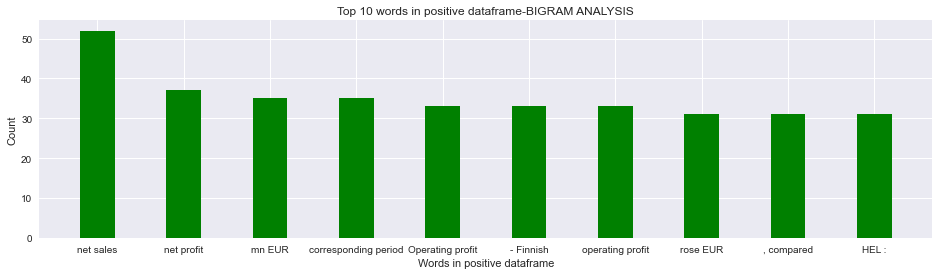

In [156]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()



In [71]:
df_positive2.head(10)

,0,1
0,net sales,52
1,net profit,37
2,mn EUR,35
3,corresponding period,35
4,Operating profit,33
5,- Finnish,33
6,operating profit,33
7,rose EUR,31
8,", compared",31
9,HEL :,31


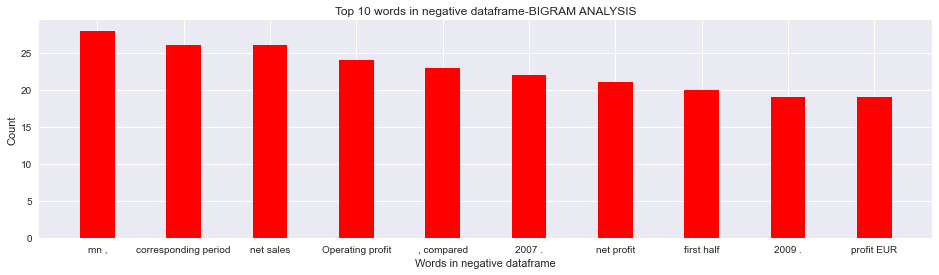

In [157]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")

plt.savefig("negative-bigram.png")
plt.show()

In [73]:
df_negative2.head(10)

,0,1
0,"mn ,",28
1,corresponding period,26
2,net sales,26
3,Operating profit,24
4,", compared",23
5,2007 .,22
6,net profit,21
7,first half,20
8,2009 .,19
9,profit EUR,19


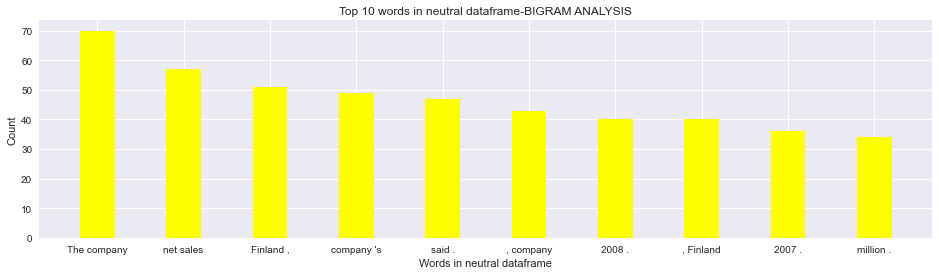

In [158]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")

plt.savefig("neutral-bigram.png")
plt.show()

In [175]:
df_neutral2.head(10)

,0,1
0,,175
1,The company,66
2,Finland,59
3,net sales,53
4,said,48
5,2008,46
6,million,44
7,2009,43
8,2007,41
9,company,40


**Creating trigrams**

In [159]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [160]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1

Sentence after removing stopwords: ['Furthermore', '', 'Bunge', 'also', 'sign', 'licensing', 'agreement', 'Sunnuntai', 'Carlshamn', 'Mejeri', 'brands', '']
Sentence after removing stopwords: ['Meanwhile', '', 'Nokia', 'said', 'able', 'deliver', 'complete', 'range', 'services', 'deployment', 'operations', 'consulting', 'integration', 'managed', 'services', 'result', 'buyout', '']
Sentence after removing stopwords: ['The', 'fair', 'value', 'property', 'portfolio', 'doubled', 'result', 'Kapiteeli', 'acquisition', 'totalled', 'EUR', '26862', '12597', 'million', '']
Sentence after removing stopwords: ['The', 'company', 'aims', 'maintain', 'trend', 'profitability', 'current', 'year', '']
Sentence after removing stopwords: ['The', 'new', 'factory', 'working', 'model', 'reorganisations', 'would', 'decrease', 'Nokian', 'Tyres', '', 'costs', 'factory', 'EUR', '30', 'million', '', 'USD', '387', '', '']
Sentence after removing stopwords: ['The', 'bank', 'forecasts', 'Finland', 'GDP', 'grow', '2', 

Sentence after removing stopwords: ['To', 'prove', 'efficiency', 'China', 'Mobile', 'system', '', 'Rod', 'Baber', '', 'English', 'climber', '', 'climbed', 'Mount', 'Everest', 'summit', 'successfully', 'made', 'calls', '']
Sentence after removing stopwords: ['Finnish', 'Aldata', 'Solution', 'signed', 'contract', 'supply', 'GOLD', 'system', 'two', 'French', 'retail', 'chains', '']
Sentence after removing stopwords: ['Under', 'memorandum', 'understanding', 'MoU', 'parties', 'collaborate', 'preparing', 'implementing', 'joint', 'projects', 'fields', 'combined', 'power', 'heat', 'generation', '', 'environmental', 'protection', 'energy', 'efficient', 'technologies', '']
Sentence after removing stopwords: ['EuroChem', 'Head', 'Corporate', 'Finance', 'Alexander', 'Gavrilov', 'said', '', '', 'I', 'pleased', 'confirmed', 'EuroChem', 'able', 'attract', 'longterm', 'funds', 'attractive', 'rates', '']
Sentence after removing stopwords: ['ASPO', 'Plc', 'STOCK', 'EXCHANGE', 'ANNOUNCEMENT', 'May', '4',

Sentence after removing stopwords: ['Department', 'store', 'sales', 'improved', '14', '', 'EUR', '10706', 'mn', '']
Sentence after removing stopwords: ['In', '2007', '', 'Marimekko', 'also', 'opened', 'concept', 'stores', 'Yokohama', 'Nagoya', '', 'central', 'Japan', '', 'Silver', 'Spring', 'metropolitan', 'Washington', 'DC', '', 'USA', '', 'Graz', '', 'central', 'Austria', '', 'Aalborg', '', 'northern', 'Denmark', '']
Sentence after removing stopwords: ['The', 'last', 'quarter', 'best', 'quarter', '2009', 'net', 'sales', '', 'operating', 'margin', 'rose', '122', '', '']
Sentence after removing stopwords: ['As', 'domestic', 'business', '', 'BestIn', 'already', 'close', 'Finnish', 'dog', 'owners', '']
Sentence after removing stopwords: ['Brazilian', 'nonprofit', 'interbank', 'Camara', 'Interbancaria', 'de', 'Pagamentos', 'CIP', 'acquired', 'solutions', 'US', 'business', 'integration', 'solutions', 'provider', 'Sterling', 'Commerce', '', 'latter', 'company', 'said', 'statement', '']
Sent

Sentence after removing stopwords: ['', 'UPMKymmene', 'upgraded', '', 'inline', '', '', 'underperform', '', 'Goldman', 'Sachs', '']
Sentence after removing stopwords: ['The', 'completion', 'recycling', 'plant', 'important', 'link', 'chain', 'creating', 'waste', 'management', 'system', 'Dubna', 'region', 'meets', 'EU', 'standards', '']
Sentence after removing stopwords: ['In', 'China', '', 'Finnish', 'Kone', 'provides', 'elevators', '', 'escalators', '', 'solutions', 'modernisation', 'maintenance', 'build', '342', 'escalators', 'installed', 'highspeed', 'railway', 'section', 'Beijing', 'Shanghai', '15', 'years', '', 'time', '']
Sentence after removing stopwords: ['The', 'Commission', 'applauded', 'applying', 'factbased', 'datadriven', 'approach', 'providing', 'clarity', 'future', 'petitions', '']
Sentence after removing stopwords: ['Danske', 'Bank', 'AS', 'DANSKE', 'DC', 'jumped', '37', 'percent', '1334', 'kroner', '', 'rebounding', 'yesterday', '35', 'percent', 'slide', '']
Sentence af

Sentence after removing stopwords: ['Tieto', 'offers', 'Aktia', 'good', 'foundation', 'required', 'support', 'services', 'implementing', 'update', 'project', '', '', 'says', 'Juha', 'Volotinen', '', 'responsible', 'Aktia', 'web', 'services', '']
Sentence after removing stopwords: ['The', 'Vaisala', 'Group', 'successful', 'international', 'technology', 'company', 'develops', '', 'manufactures', 'markets', 'electronic', 'measurement', 'systems', 'products', '']
Sentence after removing stopwords: ['With', 'acquisition', '', 'company', 'expand', 'offering', 'North', '', 'Central', 'South', 'America', '', 'said', '']
Sentence after removing stopwords: ['TELECOMWORLDWIRE7', 'April', '2006TJ', 'Group', 'Plc', 'sells', 'stake', 'Morning', 'Digital', 'Design', 'Oy', 'Finnish', 'IT', 'company', 'TJ', 'Group', 'Plc', 'said', 'Friday', '7', 'April', 'signed', 'agreement', 'selling', 'shares', 'Morning', 'Digital', 'Design', 'Oy', 'Edita', 'Oyj', '']
Sentence after removing stopwords: ['Renzo', 'Pi

Sentence after removing stopwords: ['', 'I', 'happy', 'outcome', '', '', 'Sneed', 'said', 'hearing', '']
Sentence after removing stopwords: ['The', 'move', 'aimed', 'boosting', 'sales', '', 'costefficiency', 'market', 'share', 'Finland', '']
Sentence after removing stopwords: ['', 'Demand', 'sports', 'equipment', 'good', '2005', '']
Sentence after removing stopwords: ['Finnish', 'KCI', 'Konecranes', 'raised', 'net', 'sales', 'growth', 'estimate', '2006', '25', '', '35', '', '']
Sentence after removing stopwords: ['MADISON', '', 'Wis', '', 'Feb', '6', '', 'PRNewswire', '', '', 'Fiskars', 'announces', 'United', 'States', 'Patent', 'Trademark', 'Office', 'granted', 'trademark', 'registration', 'color', 'orange', 'iconic', 'scissor', 'handles', '']
Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Oct', '29', '', '2008', '', 'Finnish', 'lifting', 'equipment', 'maker', 'Konecranes', 'Oyj', '', 'OMX', '', 'KCR1V', '', 'said', 'today', 'net', 'profit', 'rose', 'EUR', '1166', 'mi

Sentence after removing stopwords: ['The', 'transactions', 'would', 'increase', 'earnings', 'per', 'share', 'first', 'quarter', 'EUR0', '28', '']
Sentence after removing stopwords: ['Q1', '10', '19', 'April', '2010', '', 'Finnish', 'forest', 'machinery', 'equipment', 'maker', 'Ponsse', 'Oyj', 'HEL', '', 'PON1V', 'said', 'today', 'expects', 'swing', 'net', 'profit', 'EUR6', '3', 'first', 'quarter', '2010', '', 'EUR9', '6', 'loss', 'year', 'earlier', '']
Sentence after removing stopwords: ['Operating', 'loss', 'EUR', '179mn', '', 'compared', 'loss', 'EUR', '188mn', 'second', 'quarter', '2009', '']
Sentence after removing stopwords: ['HK', 'Ruokatalo', 'accounts', '50', '', 'poultry', 'sales', 'Finland', '', 'profitability', 'good', 'level', '']
Sentence after removing stopwords: ['Compared', 'FTSE', '100', 'index', '', 'rose', '283', 'points', '05', '', 'day', '', 'relative', 'price', 'change', '23', '', '']
Sentence after removing stopwords: ['Cargo', 'volume', 'increased', 'approximate

Sentence after removing stopwords: ['These', 'companies', 'able', 'keep', 'market', 'positions', '']
Sentence after removing stopwords: ['OUTOTEC', 'OYJ', 'PRESS', 'RELEASE', '', 'FEBRUARY', '19', '', '2008', 'AT', '1100', 'AM', 'Outotec', 'two', 'large', 'minerals', 'processing', 'technology', 'orders', 'Mirabela', 'Mineracao', 'Brasil', 'Ltda', '', 'Brazil', 'Cumerio', 'Med', 'JSCo', '', 'Bulgaria', '']
Sentence after removing stopwords: ['For', 'Q2', '2010', '', 'consolidated', 'earnings', 'tax', 'totaled', 'EUR4', '5', '', 'compared', 'EUR3', '9', '', 'net', 'profit', 'EUR3', '2', '', 'compared', 'EUR2', '9', 'previous', 'year', '']
Sentence after removing stopwords: ['This', 'location', 'makes', 'mall', 'convenient', 'place', 'shop', 'consumers', 'three', 'large', 'residential', 'areas', 'nearby', '', 'Jaroszowka', '', 'Wysockiego', 'Zgody', '']
Sentence after removing stopwords: ['According', 'CEO', 'Kai', 'Telanne', '', 'company', 'newspapers', 'achieved', 'best', 'financial', '

Sentence after removing stopwords: ['Revenue', 'grew', '12', 'percent', '', '', 'x20ac', '', '36', 'billion', '', 'US', '45', 'billion', '', '']
Sentence after removing stopwords: ['Finnish', 'department', 'store', 'chain', 'Stockmann', 'Oyj', 'Abp', 'net', 'profit', 'rose', '398', 'mln', 'euro', '', '', '568', 'mln', '', 'first', 'nine', 'months', '2007', '374', 'mln', 'euro', '', '', '534', 'mln', '', 'period', '2006', '']
Sentence after removing stopwords: ['', 'It', 'gives', 'us', 'sense', 'pride', 'exposure', '', '', 'said', 'Bruce', 'Hansen', '', 'SVH', 'sales', 'representative', 'Wolverine', '']
Sentence after removing stopwords: ['The', 'company', 'expects', 'net', 'sales', 'significantly', 'increase', '2009', '']
Sentence after removing stopwords: ['Kone', 'factory', 'located', 'Ayanambakkam', '', 'suburb', 'west', 'Chennai', '', 'fully', 'integrated', 'facility', 'gives', 'capability', 'address', 'costs', '']
Sentence after removing stopwords: ['However', '', 'proportion', 'p

Sentence after removing stopwords: ['The', 'respondents', 'praised', 'Finnair', 'reliability', '', 'Finnishness', '', 'understanding', 'target', 'group', '']
Sentence after removing stopwords: ['Both', 'net', 'sales', 'operating', 'profit', 'record', 'high', 'company', 'history', '']
Sentence after removing stopwords: ['When', 'situation', 'normalises', '', 'company', 'able', 'increase', 'amount', 'residential', 'units', 'sale', 'St', 'Petersburg', 'Moscow', '', 'particular', '']
Sentence after removing stopwords: ['Juha', 'Jordan', '', 'chief', 'engineer', 'Glaston', '', 'said', 'one', 'reasons', 'choosing', 'Vacon', 'global', 'AC', 'drives', 'supplier', 'service', 'support', 'centres', 'countries', 'Glaston', 'operates', '']
Sentence after removing stopwords: ['Besides', 'increased', 'share', 'meat', 'various', 'sausages', 'offering', 'number', 'new', 'tastes', 'grill', 'products', 'shish', 'kebabs', 'segment', '', '', 'Paavel', 'said', '']
Sentence after removing stopwords: ['Finnis

Sentence after removing stopwords: ['The', 'chain', 'posted', 'sales', '298', 'million', 'euros', 'full', '2005', '', 'rise', '195', 'percent', '', 'yearonyear', '']
Sentence after removing stopwords: ['Aspocomp', 'repaid', 'interest', 'bearing', 'liability', 'Standard', 'Chartered', 'Bank', 'use', 'rest', 'consideration', 'partially', 'repay', 'interest', 'bearing', 'liabilities', 'Finland', 'improve', 'liquidity', '']
Sentence after removing stopwords: ['Nokia', '', 'strong', 'track', 'record', 'lowerend', 'handset', 'market', '', 'said', 'July', 'touchscreen', 'offering', 'would', 'come', 'year', 'cheaper', 'rival', 'models', 'order', 'tap', 'highervolume', 'market', '']
Sentence after removing stopwords: ['EBIT', 'totalled', 'EUR', '144', 'mn', '', 'compared', 'loss', 'EUR', '03', 'mn', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['Finnish', 'automation', 'solutions', 'developer', 'Cencorp', 'Corporation', '', 'OMX', 'Helsinki', '', 'CNC1V', '', 'said'

Sentence after removing stopwords: ['The', 'service', 'FESCO', 'telling', 'example', 'strengthening', 'relationship', 'logistics', 'companies', 'operators', 'international', 'level', '']
Sentence after removing stopwords: ['Operating', 'profit', 'improved', 'EUR', '203', 'mn', 'EUR', '114', 'mn', '']
Sentence after removing stopwords: ['By', 'combining', 'existing', 'solutions', 'single', 'platform', '', 'Comptel', 'said', 'reduced', 'cost', 'deployment', '']
Sentence after removing stopwords: ['Kesko', 'pursues', 'strategy', 'healthy', '', 'focused', 'growth', 'concentrating', 'sales', 'services', 'consumercustomers', '']
Sentence after removing stopwords: ['In', 'second', 'quarter', '2010', '', 'group', 'net', 'profit', 'rose', 'EUR', '31', 'million', 'EUR', '25', 'million', 'AprilJune', '2009', '']
Sentence after removing stopwords: ['EBIT', 'excluding', 'nonrecurring', 'items', 'estimated', 'increase', '2009', '']
Sentence after removing stopwords: ['HELSINKI', 'Thomson', 'Financia

Sentence after removing stopwords: ['ADP', 'News', '', 'Nov', '6', '', '2008', '', 'Finnish', 'retail', 'software', 'developer', 'Aldata', 'Solution', 'Oyj', 'OMX', '', 'ALD1V', 'said', 'today', 'swung', 'net', 'profit', 'EUR', '21', 'million', 'USD', '27', 'first', 'nine', 'months', '2008', 'versus', 'net', 'loss', 'EU']
Sentence after removing stopwords: ['Net', 'profit', '355', 'mln', 'compared', '298', 'mln', '']
Sentence after removing stopwords: ['Mformation', 'Nokia', 'noted', 'established', 'interoperability', 'agreements', 'cover', 'commercially', 'proven', '', 'standardsbased', 'management', 'mobile', 'devices', '', 'well', 'mobile', 'device', 'security', 'mobile', 'application', 'management', '']
Sentence after removing stopwords: ['Kalmar', 'awarded', 'new', '5year', 'contract', 'supply', 'Rough', 'Terrain', 'Container', 'Handler', 'RTCH', '']
Sentence after removing stopwords: ['London', 'leading', 'shares', 'today', 'jumped', 'almost', '100', 'points', '', '17', '', '', '

Sentence after removing stopwords: ['Talvivaara', 'also', 'maintains', 'assumption', 'turning', 'cash', 'flow', 'positive', 'year', 'end', '']
Sentence after removing stopwords: ['Finnish', 'office', 'supplies', 'computer', 'accessories', 'dealer', 'BelttonGroup', 'Plc', 'said', 'net', 'profit', 'rose', '13', 'mln', 'euro', '', '', '17', 'mln', '', '2006', '113', 'mln', 'euro', '', '', '15', 'mln', '', '2005', '']
Sentence after removing stopwords: ['Operating', 'profit', 'ninemonth', 'period', 'increased', 'EUR3', '1', 'net', 'sales', 'increased', 'EUR61', '5', '', 'compared', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords: ['', 'We', 'delighted', 'announce', 'support', 'Intel', 'based', 'handheld', 'platforms', '', 'capabilities', 'made', 'development', 'easier', 'faster', '']
Sentence after removing stopwords: ['It', 'also', 'strengthen', 'Ruukki', 'offshore', 'business', '']
Sentence after removing stopwords: ['This', 'much', 'better', 'process', 'using', 

Sentence after removing stopwords: ['The', 'disposal', 'Autotank', 'also', 'strengthen', 'Aspo', 'capital', 'structure', '', '', 'commented', 'Gustav', 'Nyberg', '', 'CEO', 'Aspo', '']
Sentence after removing stopwords: ['During', 'past', 'decade', 'gradually', 'divested', 'noncore', 'assets', 'bought', 'several', 'sports', 'equipment', 'makers', '', 'including', 'Californiabased', 'Fitness', 'Products', 'International', 'Sparks', '', 'Nevadabased', 'ATEC', '', 'leading', 'maker', 'baseball', 'softball', 'pitching', 'machines', '']
Sentence after removing stopwords: ['Nokia', 'continue', 'invest', 'future', 'development', 'Qt', 'benefit', 'users', '', 'Commercial', 'LGPL', '']
Sentence after removing stopwords: ['On', 'hand', '', 'Montevideo', 'said', 'two', 'mills', 'working', 'area', 'generate', 'jobs', '']
Sentence after removing stopwords: ['Operating', 'profit', 'EUR', '1397', 'mn', '', '23', '', 'EUR', '1138', 'mn', '']
Sentence after removing stopwords: ['Construction', 'volumes

Sentence after removing stopwords: ['This', 'first', 'time', 'Finnair', 'awarded', 'agreement', 'UK', 'government', '']
Sentence after removing stopwords: ['The', 'operating', 'profit', 'Grain', 'Trading', 'increased', 'EUR', '20', 'mn', 'EUR', '14', 'mn', '2005', '']
Sentence after removing stopwords: ['Vaahto', 'Pulp', '', 'Paper', '', 'Finnish', 'Vaahto', 'Group', '', 'awarded', 'order', 'renovate', 'FinnishSwedish', 'forest', 'industry', 'company', 'Stora', 'Enso', 'paperboard', 'machine', 'Ingerois', 'Board', 'Mill', 'Finland', '']
Sentence after removing stopwords: ['Finnish', 'fibers', 'plastic', 'products', 'maker', 'Suominen', 'Corporation', 'said', 'net', 'loss', 'narrowed', '16', 'mln', 'euro', '', '20', 'mln', 'first', 'nine', 'months', '2006', '216', 'mln', 'euro', '', '27', 'mln', 'period', '2005', '']
Sentence after removing stopwords: ['Pretax', 'profit', 'rose', 'EUR', '1019', 'mn', 'EUR', '1007', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords

Sentence after removing stopwords: ['The', 'company', 'expects', 'net', 'sales', 'whole', '2009', 'remain', '2008', 'level', '']
Sentence after removing stopwords: ['Operating', 'loss', 'totalled', 'EUR', '127', 'mn', '', 'compared', 'profit', 'EUR', '177', 'mn', 'first', 'half', '2008', '']
Sentence after removing stopwords: ['The', 'company', 'profit', 'totaled', 'Ls', '578100', 'H1', '2007', '', '309', '', 'yearonyear', '']
Sentence after removing stopwords: ['In', 'JanuaryJune', '2010', '', 'diluted', 'loss', 'per', 'share', 'stood', 'EUR0', '3', 'versus', 'EUR0', '1', 'first', 'half', '2009', '']
Sentence after removing stopwords: ['Cash', 'Flow', 'Operations', 'recent', 'quarter', 'also', 'reached', 'eight', 'year', 'low', '']
Sentence after removing stopwords: ['EUR5', '9', 'H1', '09', '3', 'August', '2009', '', 'Finnish', 'media', 'group', 'IlkkaYhtyma', 'Oyj', '', 'HEL', '', 'ILK2S', '', 'said', 'today', 'net', 'profit', 'fell', '45', '', 'year', 'EUR5', '9', 'first', 'half', 

Sentence after removing stopwords: ['Device', 'volume', 'area', 'decreased', '21', '', '27', 'mn', 'units', '']
Sentence after removing stopwords: ['Due', 'market', 'conditions', '', 'company', 'also', 'temporarily', 'lay', '3200', 'people', 'different', 'sites', '']
Sentence after removing stopwords: ['Pretax', 'loss', 'totaled', 'EUR', '117mn', 'compared', 'loss', 'EUR', '65mn', 'corresponding', 'period', '']
Sentence after removing stopwords: ['The', 'sales', 'Tiimari', 'segment', 'fell', '40', '', 'yearonyear', 'EUR3', '3', 'June', '2010', '']
Sentence after removing stopwords: ['Cerberus', 'Capital', 'Management', 'LPbacked', 'printing', 'paper', 'maker', 'NewPage', 'Corp', 'posted', 'mixed', 'secondquarter', 'results', '', 'casting', 'cloud', 'planned', 'initial', 'public', 'offering', '']
Sentence after removing stopwords: ['According', 'company', '', 'addition', 'normal', 'seasonal', 'fluctuation', 'market', 'situation', 'weakened', 'autumn', '2008', '']
Sentence after removing

Sentence after removing stopwords: ['Employing', '112', 'Finland', '280', 'abroad', '', 'unit', 'recorded', 'firstquarter', '2007', 'sales', '86', 'mln', 'eur', '', 'operating', 'loss', '16', 'mln', 'eur', '']
Sentence after removing stopwords: ['According', 'CEO', 'Matti', 'Perkonoja', 'parent', 'company', 'HKScan', '', 'company', 'performance', 'first', 'quarter', '2010', 'remained', 'clearly', 'level', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['Net', 'sales', 'decreased', 'EUR', '2205', 'mn', 'EUR', '4700', 'mn', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['Net', 'cash', 'operating', 'activities', 'negative', 'EUR', '03', 'mn', '', 'compared', 'EUR', '309', 'mn', '2009', '']
Sentence after removing stopwords: ['Pretax', 'loss', 'totaled', 'EUR', '12', 'mn', '', 'profit', 'EUR', '21', 'mn', '2004', '']
Sentence after removing stopwords: ['TeliaSonera', 'underlying', 'results', 'however', 'included', '457', 'mln', 'skr', 

Sentence after removing stopwords: ['Frost', 'sold', 'shares', '', '19', 'million', '', '6067', '12', 'per', 'share', '', 'compared', 'Friday', 'high', '', '1133', 'low', '', '1014', '']
Sentence after removing stopwords: ['Applying', 'summer', 'work', 'seen', 'laborious', 'stressful', '']
Sentence after removing stopwords: ['The', 'airline', 'estimated', 'cancellation', 'flights', 'due', 'closure', 'European', 'airspace', '', 'process', 'recommencing', 'traffic', '', 'caused', 'company', 'loss', 'EUR20m', '', 'including', 'costs', 'stranded', 'passengers', '', 'accommodation', '']
Sentence after removing stopwords: ['The', 'number', 'permanent', 'reductions', 'clerical', 'workers', '22', 'employees', '', '19', 'Finland', '']
Sentence after removing stopwords: ['Finnish', 'financial', 'software', 'solutions', 'developer', 'BasWare', 'Oyj', 'said', 'net', 'profit', 'fell', '884000', 'euro', '', '', '12', 'mln', '', 'first', 'quarter', '2007', '20', 'mln', 'euro', '', '', '27', 'mln', ''

Sentence after removing stopwords: ['According', 'company', '', 'staff', 'laid', 'temporarily', 'necessary', '']
Sentence after removing stopwords: ['The', 'company', 'previous', 'estimate', 'lower', 'revenue', 'yearago', 'EUR', '939', 'million', '']
Sentence after removing stopwords: ['However', '', 'company', 'saw', 'net', 'profit', 'third', 'quarter', 'EUR1', '4', 'EUR1', '5', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['The', 'company', 'said', 'fall', 'turnover', 'planned', '']
Sentence after removing stopwords: ['At', '1201', 'pm', '', 'OMX', 'Helsinki', '25', '066', 'pct', '314357', 'OMX', 'Helsinki', '067', 'pct', 'lower', '1053074', '253', 'mln', 'eur', 'turnover', '']
Sentence after removing stopwords: ['The', 'number', 'salaried', 'employees', 'group', 'administration', 'employees', 'dismissed', 'Sievi', 'units', '17', '']
Sentence after removing stopwords: ['The', 'OMX', 'Helsinki', 'index', '033', 'pct', 'lower', '936480', '', 'OMX', 'Helsink

Sentence after removing stopwords: ['According', 'Finnish', 'petrol', 'station', 'chain', 'St1', 'managing', 'director', 'Kim', 'Wiio', '', 'company', 'forced', 'make', 'purchases', 'rising', 'prices', 'first', 'half', '2008', '', 'consumer', 'prices', 'going', 'almost', 'daily', 'due', 'competition', '']
Sentence after removing stopwords: ['EB', 'announced', 'stock', 'exchange', 'release', 'November', '18th', '2008', 'JT', 'Bergqvist', 'resigned', 'chairmanship', 'membership', 'Board', 'EB', '']
Sentence after removing stopwords: ['The', 'number', 'bodily', 'injury', 'cases', 'quadrupled', '20002006', '']
Sentence after removing stopwords: ['However', '', 'suspect', 'stole', 'burgundy', 'Nissan', 'Altima', '']
Sentence after removing stopwords: ['Earnings', 'per', 'share', '', 'EPS', '', 'amounted', 'EUR1', '37', '', 'EUR2', '30', '']
Sentence after removing stopwords: ['SSH', 'COMMUNICATIONS', 'SECURITY', 'CORP', 'STOCK', 'EXCHANGE', 'RELEASE', 'OCTOBER', '14', '', '2008', 'AT', '245

Sentence after removing stopwords: ['In', 'first', 'half', '2008', '', 'Bank', 'operating', 'profit', 'fell', 'EUR', '118', 'mn', 'EUR', '189', 'mn', '', 'net', 'interest', 'income', 'increased', 'EUR', '209', 'mn', 'EUR', '188', 'mn', 'first', 'half', '2007', '']
Sentence after removing stopwords: ['As', 'result', 'negotiations', 'employment', '130', 'blue', '', 'whitecollar', 'employees', 'Oulu', 'plant', 'would', 'terminated', '']
Sentence after removing stopwords: ['Finnish', 'Suominen', 'Corporation', 'makes', 'wet', 'wipes', '', 'nonwovens', '', 'flexible', 'packaging', 'starting', 'employeremployee', 'negotiations', 'Tampere', 'plant', 'Finland', 'lay', '25', 'employees', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totalled', 'EUR', '96', 'mn', '', 'EUR', '420', 'mn', 'year', '']
Sentence after removing stopwords: ['In', '2009', '', 'Stora', 'Enso', 'net', 'loss', 'EUR', '8797', 'million', 'compared', 'EUR', '6734', 'million', 'previous', 'year', '']
Sentence

Sentence after removing stopwords: ['The', 'group', 'intends', 'relocate', 'warehouse', 'office', 'space', 'Loudeac', 'Saint', 'Marcel', 'Morvillars', '', 'east', 'country', '', 'already', 'operates', 'hook', 'manufacturing', 'distribution', 'unit', '']
Sentence after removing stopwords: ['Tekla', 'software', 'solutions', 'make', 'customers', '', 'core', 'processes', 'effective', 'building', 'construction', '', 'energy', 'distribution', '', 'infrastructure', 'management', 'water', 'supply', '']
Sentence after removing stopwords: ['Karachi', '', 'Sept', '14', '', 'Ixonos', '', 'world', 'leader', 'development', 'integration', 'solutions', 'handheld', 'devices', '', 'announced', 'implementing', 'touch', 'screen', 'mobile', 'user', 'interface', 'solution', 'Intel', 'Atom', 'processor', 'Z6xx', 'based', 'smartphones', '']
Sentence after removing stopwords: ['LEED', 'internationally', 'recognized', 'green', 'building', 'certification', 'system', '', 'developed', 'US', 'Green', 'Building', 'C

Sentence after removing stopwords: ['Niina', 'Nenonen', '', 'Marimekko', 'current', 'director', 'clothing', '', 'bags', 'accessories', 'lines', '', 'take', 'role', '']
Sentence after removing stopwords: ['This', 'rating', 'AM', 'Best', 'highest', 'among', 'CIS', 'countries', '', 'Central', 'Eastern', 'Europe', '']
Sentence after removing stopwords: ['The', 'Segu', 'companies', 'PKC', 'Polish', 'unit', 'form', 'business', 'servicing', 'western', 'European', 'markets', '', 'annual', 'sales', 'hundred', 'million', '', '2500', 'employees', '', 'Finnish', 'company', 'CEO', '', 'Harri', 'Suutari', '', 'said', '']
Sentence after removing stopwords: ['In', 'release', 'Oct', '28', '', 'Peab', 'said', 'two', 'businesses', 'continue', 'conducted', 'brands', 'Cliffton', 'Stockholm', 'Entreprenad', '', 'part', 'Peab', 'Group', '']
Sentence after removing stopwords: ['Under', 'terms', 'agreement', '', 'Bunge', 'acquire', 'Raisio', 'Keiju', '', 'Makuisa', 'Pyszny', 'Duet', 'brands', 'manufacturing', 

Sentence after removing stopwords: ['The', 'order', 'also', 'covers', 'design', 'services', '', 'hardware', '', 'software', 'licences', '', 'well', 'maintenance', 'services', 'six', 'years', '']
Sentence after removing stopwords: ['Earnings', 'per', 'share', 'EPS', 'first', 'quarter', 'amounted', 'loss', 'EUR0', '20', '']
Sentence after removing stopwords: ['In', 'February', '2011', '', 'new', 'wording', 'Identity', 'Documents', 'Act', 'makes', 'Mobile', 'ID', 'stateapproved', 'electronic', 'document', 'February', '1st', '2011', 'entered', 'force', '']
Sentence after removing stopwords: ['In', 'Czech', 'Republic', '', 'smaller', 'profiling', 'unit', 'Ostrava', 'closed', 'machinery', 'gradually', 'relocated', 'Ruukki', 'bigger', 'plants', 'Hungary', '', 'Poland', 'Romania', 'end', 'first', 'quarter', '2009', '']
Sentence after removing stopwords: ['SSH', 'Establishes', 'New', 'Global', 'Sales', 'Marketing', 'Group', 'led', 'George', 'Adams', '', 'Adams', 'Establishes', 'Global', 'Sales'

Sentence after removing stopwords: ['Quartal', 'Oy', 'owns', '2094063', 'shares', 'Satama', 'Interactive', 'Plc', '', 'represents', '519', 'per', 'cent', 'share', 'capital', 'voting', 'rights', '']
Sentence after removing stopwords: ['Rental', 'building', 'equipment', 'accounted', '88', 'percent', 'operating', 'income', '']
Sentence after removing stopwords: ['In', 'Baltic', 'countries', '', 'Atria', 'target', 'organic', 'growth', '']
Sentence after removing stopwords: ['The', 'Engines', 'AsiaPacific', 'industry', 'profile', 'essential', 'resource', 'toplevel', 'data', 'analysis', 'covering', 'engines', 'industry', '']
Sentence after removing stopwords: ['The', 'order', 'plywood', 'mill', 'machinery', 'equipment', 'announced', 'Finnish', 'Raute', 'September', '2006', 'delivered', 'Thebault', 'Plyland', 'France', '']
Sentence after removing stopwords: ['TietoEnator', 'signed', 'agreement', 'acquire', 'Indian', 'research', 'development', '', 'RD', '', 'services', 'provider', 'turnkey', '

Sentence after removing stopwords: ['The', 'Finnish', 'company', 'sold', 'UK', 'operation', '', 'consisting', '50', 'staff', 'offices', 'London', '', 'Birmingham', 'Manchester', '', 'part', 'deal', 'Hampden', 'July', '2001', 'Europeanwide', 'property', 'casualty', 'arm', 'Sampo', 'Industrial', '']
Sentence after removing stopwords: ['Finland', 'Technopolis', 'planning', 'bring', 'first', 'section', 'technopark', 'stream', 'St', 'Petersburg', 'end', '2008', '', 'Kari', 'Mikkonen', '', 'vice', 'president', 'Technopolis', '', 'told', 'reporters', 'Helsinki', '']
Sentence after removing stopwords: ['Temporary', 'layoffs', 'units', 'already', 'started', '']
Sentence after removing stopwords: ['The', 'inventors', 'Bylander', 'Johan', '', 'Ponten', 'Fredrik', 'Lundberg', 'Jorgen', '']
Sentence after removing stopwords: ['In', 'stead', 'based', 'soft', 'drink', '', 'usual', '', 'Teho', 'energy', 'drink', 'made', 'fresh', 'water', '']
Sentence after removing stopwords: ['On', '20', 'March', '20

Sentence after removing stopwords: ['The', 'contract', 'worth', 'EUR', '1', 'million', '']
Sentence after removing stopwords: ['Construction', 'expected', 'completed', 'summer', '2011', '']
Sentence after removing stopwords: ['', 'My', 'wife', 'looking', 'forward', 'getting', 'paycheck', '', '', 'quipped', 'recently', 'sixknot', 'current', 'swirled', 'around', 'anchored', 'heavily', 'sponsored', 'jet', 'sled', '']
Sentence after removing stopwords: ['In', '2008', '', 'AVC', 'Systemhaus', 'net', 'sales', 'EUR', '10', 'million', 'USD', '71', '']
Sentence after removing stopwords: ['Measures', 'launched', 'immediately', 'due', 'finalized', 'first', 'quarter', '2010', '']
Sentence after removing stopwords: ['At', '337', 'pm', 'Eastern', 'time', '', 'block', '2400', 'contracts', 'changed', 'hands', 'bid', 'price', '', '045', '']
Sentence after removing stopwords: ['The', 'plant', 'go', 'stream', 'November', '2008', 'estimated', 'daily', 'production', '120000', 'litres', 'bioethanol', '']
Se

Sentence after removing stopwords: ['Seventythree', 'also', 'extensive', 'training', 'products', 'built', 'latest', 'ArchestrA', 'technologies', '', 'Wonderware', 'System', 'Platform', '']
Sentence after removing stopwords: ['The', 'redesigned', 'crushing', 'circuit', 'operation', 'since', 'start', 'September', 'overall', 'production', 'rate', 'weekly', 'basis', 'excess', 'average', '40000', 'tonnes', 'day', '']
Sentence after removing stopwords: ['Currency', 'conversions', 'based', 'exchange', 'rates', 'time', 'deal', '']
Sentence after removing stopwords: ['Finnish', 'Honkarakenne', 'specialises', 'building', 'log', 'houses', 'planning', 'use', 'pine', 'Russian', 'Karelia', '']
Sentence after removing stopwords: ['Helsinkibased', 'Componenta', 'bought', 'Turkish', 'listed', 'company', 'Doktas', 'October', '2006', '89', 'million', 'euros', '', 'making', 'largest', 'Finnish', 'investment', 'Turkey', 'date', '']
Sentence after removing stopwords: ['All', 'YIT', 'Capital', 'Markets', 'Da

Sentence after removing stopwords: ['Tip', 'week', 'Panfish', 'like', 'bluegills', 'great', 'fun', 'catch', '', 'especially', 'children', 'new', 'fishing', '']
Sentence after removing stopwords: ['The', 'company', 'board', 'directors', 'would', 'propose', 'dividend', 'EUR0', '15', 'per', 'share', '2005', '']
Sentence after removing stopwords: ['Unbelievably', '', 'company', 'makes', '', 'Fiskars', 'Corporation', '', 'formed', '1649', 'Dutch', 'merchant', 'named', 'Peter', 'Thorwoste', 'given', 'charter', 'establish', 'blast', 'furnace', 'forging', 'operation', 'small', 'Finnish', 'village', 'Fiskars', '']
Sentence after removing stopwords: ['The', 'order', 'followon', '11', 'mln', 'euro', '', '', '161', 'mln', '', 'deal', 'made', 'July', '2007', '']
Sentence after removing stopwords: ['Negotiations', 'representatives', 'personnel', 'regarding', 'restructuring', 'process', 'ended', '']
Sentence after removing stopwords: ['Deliveries', 'start', 'second', 'half', '2007', 'startup', 'mill'

Sentence after removing stopwords: ['The', 'fair', 'value', 'investment', 'properties', 'EUR', '2', '2510', '', '1', '2814', '', 'million', '']
Sentence after removing stopwords: ['The', 'exercise', 'price', 'option', 'based', 'Safran', 'Software', 'Solutions', '', 'license', 'maintenance', 'sales', 'well', 'result', 'company', '']
Sentence after removing stopwords: ['ADPnews', '', 'Dec', '23', '', '2009', '', 'Norwegian', 'financial', 'services', 'group', 'SpareBank', '1', 'Gruppen', 'AS', 'OSL', '', 'SBGRP', 'said', 'board', 'directors', 'appointed', 'today', 'Jarle', 'Haug', 'managing', 'director', 'claims', 'collection', 'subsidiary', 'SpareBank', '1', 'Gruppen', 'Finans']
Sentence after removing stopwords: ['The', 'businesses', 'divested', 'offer', 'dairy', '', 'edible', 'fats', '', 'readymeal', 'icecream', 'packaging', 'multinational', 'local', 'customers', '']
Sentence after removing stopwords: ['Basware', 'Business', 'Transactions', 'Service', 'enables', 'customer', 'receive', 

Sentence after removing stopwords: ['Finnlines', 'announce', 'week', '17', '2006', 'measures', 'take', 'tackle', 'situation', '']
Sentence after removing stopwords: ['The', 'technology', 'park', 'built', 'near', 'St', 'Petersburgbased', 'Pulkovo', 'airport', '']
Sentence after removing stopwords: ['Koff', 'market', 'share', 'volume', 'market', '234', '', '', 'Karhu', '214', '', '']
Sentence after removing stopwords: ['KaukoTelko', 'centralized', 'administration', 'dissolved', 'appropriate', 'parts', 'transferred', 'operating', 'activities', 'Group', 'administration', 'end', 'year', '']
Sentence after removing stopwords: ['The', 'engine', 'electrical', 'output', '18321', 'kW', '', 'making', 'largest', 'gas', 'powered', 'generating', 'set', 'world', '']
Sentence after removing stopwords: ['Alma', 'Media', 'Corporation', 'PRESS', 'RELEASE', 'March', '25', '', '2010', 'TYRVN', 'SANOMAT', 'PURCHASE', 'CONFIRMED', 'The', 'business', 'operations', 'TyrvÆÆn', 'Sanomat', 'Oy', 'transferred', 'S

Sentence after removing stopwords: ['Connectivity', 'Services', 'include', 'outsourced', 'Scan', 'Capture', 'transfers', 'paper', 'invoices', 'electronic', 'format', 'Basware', 'Business', 'Transactions', 'Service', 'enables', 'customer', 'receive', 'send', 'invoices', 'electronic', 'format', '']
Sentence after removing stopwords: ['Filmiteollisuus', 'Fine', 'Ab', 'transferred', 'Talentum', 'Oyj', 'form', 'subsidiary', '']
Sentence after removing stopwords: ['Analysts', 'surveyed', 'Thomson', 'Financial', 'expected', 'revenue', '', '69', 'million', 'quarter', '']
Sentence after removing stopwords: ['Central', 'Europe', 'important', 'market', 'area', 'Honka', '']
Sentence after removing stopwords: ['Also', '', 'CBA', 'issue', 'benchmark', '', '10', 'year', 'fixed', 'rate', 'deal', 'Euros', '']
Sentence after removing stopwords: ['Honkarakenne', 'also', 'decided', 'yesterday', 'sell', '88500', 'B', 'series', 'shares', 'key', 'staff', 'members', 'EUR2', '9', 'per', 'share', '']
Sentence a

Sentence after removing stopwords: ['Finnish', 'Rautaruukki', 'engineering', 'division', 'Ruukki', 'Engineering', 'reorganise', 'operations', 'Mo', 'Rana', 'plant', 'Norway', '']
Sentence after removing stopwords: ['561470', 'new', 'shares', '2003', 'option', 'rights', 'plan', 'Packaging', 'company', 'Huhtamaki', 'Oyj', 'reported', 'Monday', 'total', '561470', 'new', 'shares', 'company', 'issued', 'based', 'share', 'subscriptions', '2003', 'option', 'rights', 'plan', '']
Sentence after removing stopwords: ['The', 'event', 'also', 'viewed', 'live', 'webcast', 'wwwcargoteccom', '']
Sentence after removing stopwords: ['With', 'Basware', 'Connectivity', 'services', '', 'companies', 'gain', 'visibility', 'audit', 'trail', 'traced', 'order', 'goods', 'delivery', 'invoice', '']
Sentence after removing stopwords: ['For', '2009', '', 'net', 'profit', 'EUR', '3', 'million', 'company', 'paid', 'dividend', 'EUR', '130', 'apiece', '']
Sentence after removing stopwords: ['The', 'remaining', 'amount'

Sentence after removing stopwords: ['In', '2007', '', 'Group', 'net', 'sales', 'stood', 'EUR', '22', 'million', '150', 'employees', 'end', 'June', '', '2008', '']
Sentence after removing stopwords: ['The', 'value', 'contract', 'EUR', '27mn', '']
Sentence after removing stopwords: ['Telecom', 'foreign', 'investment', 'limit', '74', '', '', 'appears', 'mobile', 'VAS', '', 'means', 'Tecnomen', 'pick', 'much', '966', '', '']
Sentence after removing stopwords: ['The', 'availability', 'Internet', 'services', 'highlighted', 'service', 'offer', 'Kesko', 'KGroup', 'stores', '']
Sentence after removing stopwords: ['Particular', 'attention', 'paid', 'energy', 'efficiency', 'construction', 'building', '', 'designed', 'meet', 'requirements', 'energy', 'class', 'B', '', 'LEED', 'certification', 'applied', '']
Sentence after removing stopwords: ['Production', 'scheduled', 'start', 'end', 'April', '2007', '']
Sentence after removing stopwords: ['Her', 'last', 'position', 'Nokia', 'Siemens', 'Networks'

Sentence after removing stopwords: ['', 'Our', 'research', 'shows', 'access', 'information', 'technology', 'one', 'limiting', 'factors', 'small', 'businesses', 'especially', 'work', 'heterogenous', 'network', 'based', 'environment', '']
Sentence after removing stopwords: ['Kesko', 'wwwkeskofi', 'Finnish', 'retail', 'specialist', 'whose', 'stores', 'offer', 'quality', 'daily', 'lives', 'consumers', 'valued', 'products', 'services', 'competitive', 'prices', '']
Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'June', '7', '', 'Michael', 'G', 'Williams', 'Newbury', 'Park', '', 'Calif', '', 'developed', 'network', 'device', '']
Sentence after removing stopwords: ['The', 'value', 'order', 'USD', '22', 'mn', '']
Sentence after removing stopwords: ['E', 'building', 'system', 'service', 'revenue', 'EUR', '355', 'mln', '2007', '']
Sentence after removing stopwords: ['It', 'member', 'OneWorld', 'alliance', '', 'includes', 'American', 'Airlines', 'British', 'Airways', '']
Sentence 

Sentence after removing stopwords: ['The', 'value', 'deal', 'estimated', 'SEK25m', 'SEK50m', '']
Sentence after removing stopwords: ['The', 'company', 'said', '80', '', 'shares', 'holding', 'company', 'sold', 'Meadville', 'Holdings', 'Limited', '', 'Hong', 'Kong', 'listed', 'parent', 'company', 'Meadville', 'Group', '']
Sentence after removing stopwords: ['Rapala', 'Fishing', 'Frenzy', '2009', '']
Sentence after removing stopwords: ['The', 'Russian', 'government', 'contribute', '20', '', 'necessary', 'funds', '', 'said', '']
Sentence after removing stopwords: ['The', 'impact', 'TietoEnator', 'net', 'sales', '2008', 'purchase', 'expected', '11', 'mln', 'euro', '', '159', 'mln', '']
Sentence after removing stopwords: ['Panostaja', 'treats', 'negotiating', 'partners', '', 'entrepreneurs', 'selling', 'life', 'work', 'newcomer', 'entrepreneurs', 'seeking', 'career', '', 'fairly', '', 'justly', 'according', 'law', '']
Sentence after removing stopwords: ['Editor', 'note', '', 'Grimaldi', 'gen

Sentence after removing stopwords: ['The', 'contract', 'covers', 'installation', '', 'training', 'startup', 'services', '']
Sentence after removing stopwords: ['The', 'European', 'Central', 'Bank', 'ECB', 'anticipated', 'raise', 'benchmark', 'interest', 'rate', 'second', 'half', '2011', 'earliest', '']
Sentence after removing stopwords: ['Eero', 'Katajavuori', '', 'currently', 'Group', 'Vice', 'President', '', 'Human', 'Resources', '', 'take', 'yearlong', 'sabbatical', 'starting', 'October', '1', '', '2010', '']
Sentence after removing stopwords: ['Tekla', 'provides', '3D', 'software', 'building', 'infrastructure', 'engineering', '', 'focus', 'building', 'information', 'modelling', 'steel', 'concrete', 'structures', 'design', 'construction', '']
Sentence after removing stopwords: ['Both', 'sources', 'said', 'Nokia', 'would', 'unveil', 'new', 'phone', 'codenamed', '', 'Tube', '', 'Oct', '2', 'analyst', 'media', 'event', 'London', '']
Sentence after removing stopwords: ['OVA', 'Press', '

Sentence after removing stopwords: ['CapMan', 'made', 'initial', 'investment', 'OneMed', 'June', '2006', '']
Sentence after removing stopwords: ['Capitex', 'Kalmar', 'continue', 'responsible', 'maintenance', 'technical', 'development', 'services', '']
Sentence after removing stopwords: ['GUANGDONG', '', 'October', '26', '', 'SinoCast', '', 'Nokia', 'Telecommunications', 'Dongguan', 'branch', 'entered', 'letter', 'intent', 'open', 'Nokia', 'Class', 'Qingyuan', 'Polytechnic', '', 'Qingyuan', 'City', 'Guangdong', 'Province', '']
Sentence after removing stopwords: ['The', 'issuer', 'solely', 'responsible', 'content', 'announcement', '']
Sentence after removing stopwords: ['Okmetic', 'global', 'customer', 'base', 'sales', 'network', '', 'production', 'plants', 'Finland', 'US', 'contract', 'manufacturers', 'Japan', 'China', '']
Sentence after removing stopwords: ['The', 'program', '', 'started', 'summer', '2007', '', 'originally', 'estimated', 'last', 'approximately', 'two', 'years', '']
Sen

Sentence after removing stopwords: ['This', 'includes', 'EUR', '395', 'mn', 'change', 'fair', 'value', 'investment', 'properties', '']
Sentence after removing stopwords: ['Construction', 'work', 'Helsinki', 'Music', 'Centre', 'start', 'autumn', '', 'total', 'cost', 'project', 'estimated', '140', 'million', 'euros', '']
Sentence after removing stopwords: ['The', 'joint', 'venture', 'invest', 'EUR', '500000', 'production', 'technology', 'straight', 'away', '']
Sentence after removing stopwords: ['And', 'lifted', 'veil', 'various', 'types', 'customer', 'designs', 'phones', '', 'result', 'social', 'stereotyping', 'taken', 'fine', 'art', '']
Sentence after removing stopwords: ['The', 'contract', 'consists', 'new', 'building', 'area', '18000', 'sq', 'renovation', 'existing', 'buildings', '']
Sentence after removing stopwords: ['As', 'reported', 'June', '26', '', '', 'circuits', 'continued', 'alternately', 'report', 'track', 'vacant', 'occupied', 'almost', 'constantly', 'June', '17', '', 'par

Sentence after removing stopwords: ['Other', 'shareholder', 'entitlements', 'became', 'effective', 'today', '']
Sentence after removing stopwords: ['MILAN', '', 'AFX', '', '', 'The', 'Italian', 'shipping', 'group', 'Grimaldi', 'increased', 'stake', 'Finnish', 'company', 'Finnlines', '354', 'pct', '305', 'pct', 'held', 'June', '', 'according', 'news', 'agency', 'ANSA', '']
Sentence after removing stopwords: ['Bovine', 'slaughtering', 'cutting', 'Kuopio', 'facility', 'transferred', 'Kauhajoki', 'slaughterhouse', '']
Sentence after removing stopwords: ['The', 'device', 'also', 'used', 'theft', 'protection', 'positioning', 'vehicles', '', 'boats', 'assets', '']
Sentence after removing stopwords: ['com', 'possibly', 'also', 'photomsn', '']
Sentence after removing stopwords: ['Swedbank', 'Hypotek', '', 'Is', 'issue', 'benchmark', '', 'fixed', 'rate', 'covered', 'deal', 'Euros', '', 'maturing', 'January', '2010', '']
Sentence after removing stopwords: ['The', 'event', 'followed', 'online', 'v

Sentence after removing stopwords: ['The', 'Tecnomen', 'Convergent', 'Charging', 'solution', 'includes', 'functionality', 'prepaid', 'postpaid', 'billing', '', 'charging', 'rating', 'voice', 'calls', '', 'video', 'calls', '', 'raw', 'data', 'traffic', 'type', 'content', 'services', 'mobile', 'fixed', 'networks', '']
Sentence after removing stopwords: ['The', '10000odd', 'square', 'metre', 'plot', 'Stockmann', 'bought', 'Nevsky', 'Center', 'shopping', 'center', 'located', 'Nevsky', 'Prospect', '', 'St', 'Petersburg', 'high', 'street', '', 'next', 'Vosstaniya', 'Square', 'underground', 'station', '', 'immediate', 'vicinity', 'Moscow', 'Station', '']
Sentence after removing stopwords: ['According', 'announcement', 'Helsinki', 'Stock', 'Exchange', 'share', 'Sentera', 'shall', 'delisted', 'NMlist', 'Helsinki', 'Stock', 'Exchange', 'accordingly', '']
Sentence after removing stopwords: ['The', 'order', 'values', 'EUR', '69', 'mn', '', 'consists', 'design', 'services', 'hardware', 'software', 

Sentence after removing stopwords: ['Biohit', '', 'Inc', '', 'expanded', 'mLINE', 'Family', 'Pipettors', 'addition', 'NEW', '110', 'ml', 'volume', 'range', '']
Sentence after removing stopwords: ['COMPTEL', 'CORPORATION', 'Sami', 'Ervio', 'President', 'CEO', 'Distribution', '', 'NASDAQ', 'OMX', 'Helsinki', 'Major', 'media', 'Comptel', 'Dynamic', 'OSS', 'solutions', 'enable', 'telecom', 'service', 'providers', 'deliver', 'services', 'flexibly', 'charge', 'effectively', '']
Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Dec', '11', '', '2008', '', 'Finnish', 'powersupply', 'solutions', 'provider', 'Efore', 'Oyj', '', 'OMX', '', 'EFO1V', '', 'said', 'yesterday', 'opened', 'technology', 'research', 'development', '', 'RD', '', 'laboratory', 'Helsinki', 'University', 'Technology', '']
Sentence after removing stopwords: ['Okmetic', 'Board', 'Directors', 'also', 'decided', 'new', 'share', 'ownership', 'program', 'directed', 'company', 'top', 'management', '']
Sentence after r

Sentence after removing stopwords: ['Gearing', '43', '', 'compared', '67', '', '2004', '']
Sentence after removing stopwords: ['The', 'mediumterm', 'operative', 'targets', 'company', 'remain', 'unchanged', '']
Sentence after removing stopwords: ['As', 'part', 'new', 'strategy', '', 'Finnish', 'Biohit', 'planning', 'incorporate', 'diagnostics', 'business', 'separate', 'limited', 'company', '']
Sentence after removing stopwords: ['The', 'share', 'share', 'capital', 'mentioned', 'shareholders', 'remains', '5', '', '']
Sentence after removing stopwords: ['', 'Directors', 'shareholders', 'alike', 'ask', 'practices', 'allowed', 'continue', '', '']
Sentence after removing stopwords: ['Creating', 'interfaces', 'similar', 'interactions', 'real', 'world', 'enable', 'experiences', 'natural', 'intuitive', '', 'way', 'modern', 'games', 'movies', 'immersive', 'use', 'realistic', '3D', 'graphics', '']
Sentence after removing stopwords: ['The', 'Tekla', 'Structures', 'product', 'box', '', 'needed', ''

Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'Dec', '19', '', 'United', 'States', 'Patent', '7853620', '', 'issued', 'Dec', '14', '', 'assigned', 'Nokia', 'Corp', '', 'Espoo', '', 'Finland', '', '']
Sentence after removing stopwords: ['As', 'overall', 'effect', 'abovementioned', 'measures', 'Glaston', 'recognize', 'nonrecurring', 'expenses', 'EUR', '12', 'million', 'fourth', 'quarter', '2008', '']
Sentence after removing stopwords: ['Ruukki', 'delivery', 'includes', 'steel', 'structures', '', 'including', 'installation', '', 'Krakeroy', 'bascule', 'bridge', 'steel', 'piles', 'bridge', 'foundations', '']
Sentence after removing stopwords: ['SAMPO', 'PLC', 'Jarmo', 'Salonen', 'Head', 'Investor', 'Relations', 'Group', 'Communications', 'tel', '358', '10', '516', '0030', 'Distribution', '', 'NASDAQ', 'OMX', 'Helsinki', 'The', 'principal', 'media', 'Financial', 'Supervisory', 'Authority', 'wwwsampocom', 'This', 'announcement', 'distributed', 'Thomson', 'Reuters', 'behalf'

Sentence after removing stopwords: ['NASDAQ', 'OMX', '', 'GEO1V', '', 'GyPSii', 'business', 'unit', '', 'developers', 'awardwinning', 'GyPSii', 'mobile', 'social', 'networking', 'application', '', 'today', 'announced', 'availability', 'free', 'download', 'via', 'Samsung', 'Mobile', 'Applications', 'Store', '']
Sentence after removing stopwords: ['A', 'meeting', 'Glisten', 'shareholders', 'vote', 'bid', 'held', '12', 'March', '']
Sentence after removing stopwords: ['The', 'contracts', 'awarded', 'date', '', 'connection', 'system', '', 'amount', 'total', 'EUR', '36', 'million', '']
Sentence after removing stopwords: ['The', 'server', 'responsible', 'managing', 'devices', 'user', 'accounts', 'desktop', 'client', 'application', 'enables', 'remote', 'access', 'mobile', 'phones', '']
Sentence after removing stopwords: ['Nokia', 'requesting', 'companies', 'stop', 'making', 'selling', 'mobile', 'phones', 'pay', 'monetary', 'damages', 'costs', '']
Sentence after removing stopwords: ['Part', 're

Sentence after removing stopwords: ['The', 'company', 'withdrawing', 'second', 'part', '', 'EUR', '72', 'mn', '', 'investment', 'commitment', '']
Sentence after removing stopwords: ['The', 'pershare', 'subscription', 'price', 'shares', 'subscribed', 'option', 'rights', 'EUR', '135', '']
Sentence after removing stopwords: ['BAVARIA', 'Industriekapital', 'AG', '2006', 'revenues', 'EUR', '333', 'million', '', 'EBITDA', 'EUR', '51', 'million', '']
Sentence after removing stopwords: ['The', 'business', 'sales', '', 'Euro', '', '35', 'million', '', '', '44million', '', '', 'responsible', 'sales', 'marketing', 'Lanxess', 'paper', 'chemicals', 'business', '', 'Kemira', 'bought', '', 'Euro', '', '88', 'million', 'early', 'year', '', 'CW', '', 'Jan', '11', '', 'p', '22', '', '']
Sentence after removing stopwords: ['GenVec', 'biopharmaceutical', 'company', 'developing', 'novel', 'therapeutic', 'drugs', 'vaccines', '']
Sentence after removing stopwords: ['After', 'sale', '', 'Savcor', 'Group', 'Lt

Sentence after removing stopwords: ['The', 'company', 'distributes', 'Hiab', 'products', 'well', 'products', '']
Sentence after removing stopwords: ['The', 'company', 'designs', 'manufactures', 'highquality', 'clothing', '', 'interior', 'decoration', 'textiles', '', 'bags', '', 'accessories', '']
Sentence after removing stopwords: ['Their', 'offering', 'also', 'covers', 'localisation', 'services', 'related', 'production', 'transfer', 'Finnish', 'company', 'customers', 'already', 'production', 'Asian', 'market', 'made', 'decision', 'transfer', 'production', '']
Sentence after removing stopwords: ['Honkarakenne', 'customer', 'project', 'one', 'biggest', 'real', 'estate', 'companies', 'Kazakhstan', '', 'according', 'company', '']
Sentence after removing stopwords: ['The', 'hull', 'vessel', 'built', 'one', 'block', 'time', 'Ruukki', 'delivered', 'plate', 'material', 'block', 'construction', 'progressed', '']
Sentence after removing stopwords: ['They', 'sunk', 'depth', '360380', 'metres', '

Sentence after removing stopwords: ['The', 'Annual', 'General', 'Meeting', 'approved', 'yearly', 'remuneration', 'members', 'Board', 'Directors', 'shall', 'remain', 'EUR', '40000', 'Chairman', 'Board', '', 'EUR', '30000', 'Deputy', 'Chairman', 'Board', 'EUR', '20000', 'members', 'Board', '']
Sentence after removing stopwords: ['The', 'sale', 'allow', 'Campofrio', 'focus', 'recently', 'announced', 'takeover', 'Groupe', 'Smithfield', 'Holdings', '', 'European', 'unit', 'Smithfield', 'Foods', 'Inc', '', 'SFD', '', 'US']
Sentence after removing stopwords: ['The', 'company', 'also', 'shut', 'one', 'paper', 'machine', 'Finland', 'one', 'Austria', '', 'well', 'two', 'label', 'paper', 'machines', 'Finland', '10', 'months', '', 'Helsinkibased', 'UPM', 'said', 'yesterday', '']
Sentence after removing stopwords: ['Elcoteq', 'revenues', '2007', 'approximately', 'EUR', '120', 'million', '']
Sentence after removing stopwords: ['The', 'interchange', 'EditorsinChief', 'part', 'publisher', 'goal', 'enh

Sentence after removing stopwords: ['Performance', 'based', 'values', 'sustainability', '']
Sentence after removing stopwords: ['Russia', 'accounted', '9', '', 'Lagardere', 'magazine', 'division', 'revenue', '', 'EUR', '11440', 'mn', '', 'USD', '14811', 'mn', '', '2009', '', 'USA', '', '18', '', '']
Sentence after removing stopwords: ['The', 'orders', 'consist', 'total', '1600', 'panels', 'liftaway', 'weatherdeck', 'hatch', 'covers', 'delivered', 'container', 'vessels', 'capacities', 'ranging', '2000', '13300', 'TEUs', '']
Sentence after removing stopwords: ['After', 'nonrecurring', 'items', 'EUR', '177mn', '', 'profit', 'amounted', 'EUR', '20mn', '']
Sentence after removing stopwords: ['The', 'company', 'delivered', 'technical', 'infrastructure', '', 'used', 'NAV', 'data', 'warehouse', 'business', 'intelligence', 'initiatives', '']
Sentence after removing stopwords: ['Technopolis', 'plans', 'develop', 'stages', 'area', 'less', '100000', 'square', 'meters', 'order', 'host', 'companies'

Sentence after removing stopwords: ['Radiation', 'today', 'full', 'service', 'house', 'expert', 'radiation', 'nuclear', 'safety', 'issues', '']
Sentence after removing stopwords: ['Symphony', 'Services', 'provides', 'development', 'services', 'Aldata', 'GOLD', '']
Sentence after removing stopwords: ['The', 'Oulu', 'plant', 'employs', 'approximately', '120', 'people', '']
Sentence after removing stopwords: ['Honkarakenne', 'also', 'decided', 'yesterday', 'sell', '88500', 'Bseries', 'shares', 'key', 'staff', 'members', 'EUR', '290', 'per', 'share', '']
Sentence after removing stopwords: ['The', 'acquisition', 'part', 'Ramirent', 'Central', 'Eastern', 'European', 'growth', 'strategy', '']
Sentence after removing stopwords: ['He', 'resting', 'comfortably', 'looking', 'forward', 'getting', 'back', 'work', '', '']
Sentence after removing stopwords: ['MetsaBotnia', 'finance', 'payment', 'dividends', '', 'repayment', 'capital', 'repurchase', 'shares', 'funds', 'deriving', 'divestment', 'Urugua

Sentence after removing stopwords: ['The', 'net', 'sales', 'Power', 'Plants', 'business', 'EUR', '7103', 'million', '2005', '']
Sentence after removing stopwords: ['The', 'cost', 'deal', 'could', 'range', '70', 'million', '90', 'million', 'euros', 'depending', 'financial', 'results', 'two', 'companies', '2008', '', 'statement', 'says', '']
Sentence after removing stopwords: ['The', 'value', 'order', 'USD', '23', 'mn', '']
Sentence after removing stopwords: ['', 'Because', 'pension', 'insurance', 'company', '', 'required', 'diversify', 'put', 'much', 'one', 'asset', 'class', '']
Sentence after removing stopwords: ['Founded', '2000', '', 'BioView', 'automates', 'laboratory', 'tests', '', 'especially', 'diagnostic', 'tests', 'cancer', '']
Sentence after removing stopwords: ['The', 'company', '120', 'employees', 'annual', 'sales', 'approximately', 'EUR16m', '']
Sentence after removing stopwords: ['Today', '', 'connecting', 'people', 'new', 'different', 'ways', '', 'fusing', 'advanced', 'mo

Sentence after removing stopwords: ['However', '', 'offering', 'probably', 'made', 'current', 'valuation', '', 'partly', 'derives', 'deal', 'company', 'merged', 'stock', 'market', 'shell', '']
Sentence after removing stopwords: ['Renesas', 'Mobile', 'Europe', 'Ltd', 'approximately', '470', 'employees', 'Oulu', '']
Sentence after removing stopwords: ['Outotec', '', 'headquartered', 'Espoo', '', 'Finland', '', 'leading', 'provider', 'process', 'solutions', '', 'technologies', 'services', 'mining', 'metallurgical', 'industries', '']
Sentence after removing stopwords: ['Ahlstrom', 'Corporation', 'STOCK', 'EXCHANGE', 'ANNOUNCEMENT', '2342007', 'Ahlstrom', 'Corporation', 'publish', 'first', 'quarter', 'financial', 'results', '2007', 'Friday', '', 'April', '27', '', '2007', 'approximately', '830', 'Finnish', 'time', '']
Sentence after removing stopwords: ['', 'Tom', 'Doring', 'long', 'successful', 'career', 'drives', 'business', '', 'knows', 'American', 'market', '']
Sentence after removing s

Sentence after removing stopwords: ['Purchase', '12MP', 'snapper', '', 'nothing', 'else', '']
Sentence after removing stopwords: ['The', 'forecast', '2012', '33', '', '']
Sentence after removing stopwords: ['He', 'joined', 'Rautakirja', '1997', 'lead', 'one', 'four', 'business', 'areas', 'took', 'position', 'President', 'CEO', '2001', '']
Sentence after removing stopwords: ['LÆnnen', 'Tehtaat', 'Food', 'Division', 'reorganised', 'two', 'strategic', 'business', 'units', '', 'Apetit', 'Frozen', 'Foods', 'Jams', '', 'Apetit', 'Fish', '']
Sentence after removing stopwords: ['The', 'webcast', 'may', 'followed', 'online', 'company', 'website', 'wwwruukkicominvestors', '']
Sentence after removing stopwords: ['The', 'acquired', 'plant', 'annual', 'capacity', '300000', 'tonnes', 'production', 'sold', 'domestic', 'customers', '']
Sentence after removing stopwords: ['The', 'GeoSolutions', 'team', 'provides', 'intriguing', 'new', 'technology', 'combining', 'GPS', 'Mobilebased', 'technologies', 'to

Sentence after removing stopwords: ['The', 'new', 'majority', 'owners', 'Aspocomp', 'Thailand', 'Co', '', 'Ltd', 'certain', 'private', 'persons', 'belonging', 'immediate', 'circle', 'Aspocomp', 'present', 'Joint', 'Venture', 'partner', '', 'Saha', 'Pathana', 'InterHolding', 'Plc', '']
Sentence after removing stopwords: ['Body', 'The', 'credit', 'falls', 'due', 'February', '24', '', '2014', '']
Sentence after removing stopwords: ['The', 'handset', 'maker', 'disclose', 'financial', 'details', '']
Sentence after removing stopwords: ['', 'We', 'expensive', 'water', 'brand', 'Finland', 'moment', '', '']
Sentence after removing stopwords: ['Cargotec', 'share', 'capital', 'increase', 'totals', 'EUR', '64299180', '']
Sentence after removing stopwords: ['Ahlstrom', '', 'headquartered', 'Helsinki', '', 'Finland', '', 'global', 'leader', 'development', '', 'manufacture', 'marketing', 'high', 'performance', 'fibrebased', 'materials', '']
Sentence after removing stopwords: ['Europe', 'however', 're

In [161]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

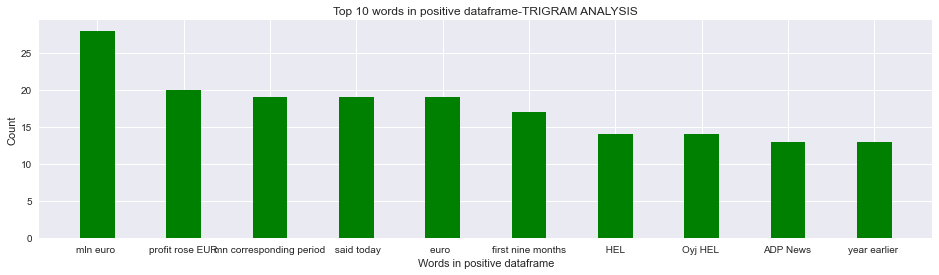

In [162]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")

plt.savefig("positive-trigram.png")
plt.show()



In [80]:
df_positive3.head(10)

,0,1
0,profit rose EUR,20
1,mn corresponding period,19
2,euro ( $,18
3,first nine months,17
4,) said today,16
5,mln euro (,15
6,( HEL :,14
7,Oyj HEL :,14
8,"mn , EUR",13
9,mln euro $,13


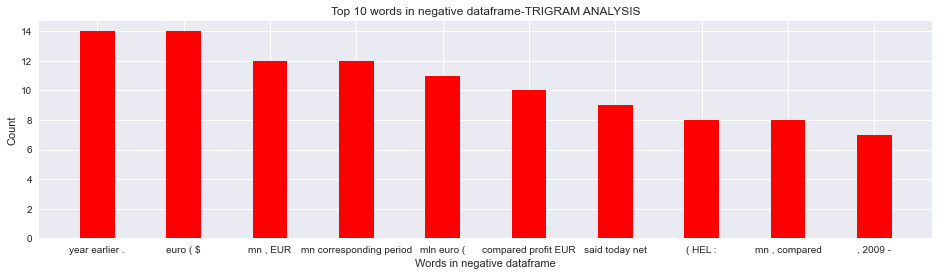

In [83]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")

plt.savefig("negative-trigram.png")
plt.show()

In [182]:
df_negative3.head(10)

,0,1
0,mn EUR,19
1,mln euro,17
2,euro,15
3,mn corresponding period,14
4,year earlier,13
5,said today,10
6,Oyj HEL,9
7,HEL,9
8,Oyj HEL,8
9,period 2007,8


In [ ]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")

plt.savefig("neutral-trigram.png")
plt.show()

In [79]:
df_neutral3.head(10)

,0,1
0,", Finland ,",26
1,", company said",17
2,'s net sales,17
3,( HEL :,16
4,company said .,15
5,mln euro $,15
6,The company 's,13
7,net sales EUR,12
8,voting rights .,12
9,Oyj ( HEL,11


**Using CountVectorizer()**

-can also b used to check the most common bigrams